In [36]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from submission import Controller
from cobar_miniproject.cobar_fly import CobarFly
from cobar_miniproject import levels
from flygym import SingleFlySimulation, Camera
from tqdm import trange




timestep = 1e-4
debug = True
level = 4
seed = 45

fly = CobarFly(
    debug=debug,
    enable_vision=True,
    render_raw_vision=False,
)

if level <= 1:
    arena = levels[level](fly=fly, seed=seed)
else:
    arena = levels[level](fly=fly, timestep=timestep, seed=seed)

cam_params = {"pos": (0, 0, 80)}
timestep = 1e-4

cam = Camera(
    attachment_point=arena.root_element.worldbody,
    camera_name="camera_top_zoomout",
    targeted_fly_names=[fly.name],
    camera_parameters=cam_params,
    play_speed=0.2,
)

sim = SingleFlySimulation(
    fly=fly,
    cameras=[cam],
    timestep=timestep,
    arena=arena,
)

controller = Controller(timestep=timestep)

# run cpg simulation
obs, info = sim.reset()
obs_hist = []
info_hist = []

max_steps = 10000

for i in trange(max_steps):
    # Get observations
    obs, reward, terminated, truncated, info = sim.step(controller.get_actions(obs))
    sim.render()
    if controller.done_level(obs):
        # finish the path integration level
        break

    #if not obs["vision_updated"]:
    #if "vision" in obs:
    #    del obs["vision"]
    #if "raw_vision" in obs:
    #    del obs["raw_vision"]
    obs_hist.append(obs)
    info_hist.append(info)


    if hasattr(controller, "quit") and controller.quit:
        print("Simulation terminated by user.")
        break
    if hasattr(arena, "quit") and arena.quit:
        print("Target reached. Simulation terminated.")
        break

print(f"Available keys in obs: {list(obs.keys())}")


# Save video
save_path = Path("outputs") / f"level{level}_seed{seed}.mp4"
save_path.parent.mkdir(parents=True, exist_ok=True)
cam.save_video(save_path, stabilization_time=0)

  0%|          | 1/10000 [00:00<17:24,  9.57it/s]

Time: 0.0001 s | True pos: [0.01634914 0.00730949] m | Est pos: [0. 0.] m
Time: 0.0002 s | True pos: [0.01644514 0.00730707] m | Est pos: [0. 0.] m
Time: 0.0003 s | True pos: [0.01654977 0.0073048 ] m | Est pos: [0. 0.] m
Time: 0.0004 s | True pos: [0.01681404 0.00730099] m | Est pos: [0. 0.] m
Time: 0.0005 s | True pos: [0.01722859 0.00729457] m | Est pos: [0. 0.] m
Time: 0.0006 s | True pos: [0.01777165 0.00728545] m | Est pos: [0. 0.] m
Time: 0.0007 s | True pos: [0.01841195 0.00727351] m | Est pos: [0. 0.] m
Time: 0.0008 s | True pos: [0.01909476 0.00725704] m | Est pos: [0. 0.] m
Time: 0.0009 s | True pos: [0.01979767 0.00723548] m | Est pos: [0. 0.] m
Time: 0.0010 s | True pos: [0.0205166  0.00720897] m | Est pos: [0. 0.] m
Time: 0.0011 s | True pos: [0.02124417 0.00717795] m | Est pos: [0. 0.] m
Time: 0.0012 s | True pos: [0.02197065 0.00714272] m | Est pos: [0. 0.] m
Time: 0.0013 s | True pos: [0.02268657 0.00710346] m | Est pos: [0. 0.] m
Time: 0.0014 s | True pos: [0.02338402

  1%|          | 84/10000 [00:00<00:37, 264.78it/s]

Time: 0.0051 s | True pos: [0.03799333 0.00531324] m | Est pos: [0. 0.] m
Time: 0.0052 s | True pos: [0.03828415 0.00526163] m | Est pos: [0. 0.] m
Time: 0.0053 s | True pos: [0.03857349 0.00520969] m | Est pos: [0. 0.] m
Time: 0.0054 s | True pos: [0.03886124 0.00515745] m | Est pos: [0. 0.] m
Time: 0.0055 s | True pos: [0.03914732 0.00510492] m | Est pos: [0. 0.] m
Time: 0.0056 s | True pos: [0.03943165 0.00505215] m | Est pos: [0. 0.] m
Time: 0.0057 s | True pos: [0.03971417 0.00499917] m | Est pos: [0. 0.] m
Time: 0.0058 s | True pos: [0.03996565 0.00496947] m | Est pos: [0. 0.] m
Time: 0.0059 s | True pos: [0.04016317 0.00498941] m | Est pos: [0. 0.] m
Time: 0.0060 s | True pos: [0.04028773 0.00508042] m | Est pos: [0. 0.] m
Time: 0.0061 s | True pos: [0.04029298 0.00523442] m | Est pos: [0. 0.] m
Time: 0.0062 s | True pos: [0.04014149 0.00543753] m | Est pos: [0. 0.] m
Time: 0.0063 s | True pos: [0.03980175 0.00567921] m | Est pos: [0. 0.] m
Time: 0.0064 s | True pos: [0.03924684

  1%|▏         | 141/10000 [00:00<00:39, 250.21it/s]

Time: 0.0101 s | True pos: [-0.14556421  0.01394073] m | Est pos: [-0.05597874 -0.00429151] m
Time: 0.0102 s | True pos: [-0.15188757  0.01388385] m | Est pos: [-0.05597874 -0.00429151] m
Time: 0.0103 s | True pos: [-0.15808785  0.01382095] m | Est pos: [-0.05641219 -0.00337029] m
Time: 0.0104 s | True pos: [-0.1641586   0.01374038] m | Est pos: [-0.05987182 -0.00442363] m
Time: 0.0105 s | True pos: [-0.1700765   0.01366415] m | Est pos: [-0.06438974 -0.00292574] m
Time: 0.0106 s | True pos: [-0.17581932  0.01356299] m | Est pos: [-0.06438974 -0.00292574] m
Time: 0.0107 s | True pos: [-0.18137097  0.01343711] m | Est pos: [-0.06447092 -0.00698407] m
Time: 0.0108 s | True pos: [-0.18674421  0.01330486] m | Est pos: [-0.06447092 -0.00698407] m
Time: 0.0109 s | True pos: [-0.19194275  0.01317869] m | Est pos: [-0.06692203 -0.00578745] m
Time: 0.0110 s | True pos: [-0.19696894  0.01304685] m | Est pos: [-0.06692203 -0.00578745] m
Time: 0.0111 s | True pos: [-0.20179887  0.01290326] m | Est

  2%|▏         | 194/10000 [00:00<00:30, 320.84it/s]

Time: 0.0166 s | True pos: [-0.23921782  0.00369524] m | Est pos: [-0.11977602 -0.03044937] m
Time: 0.0167 s | True pos: [-0.23795465  0.00391769] m | Est pos: [-0.11977602 -0.03044937] m
Time: 0.0168 s | True pos: [-0.2366684   0.00411646] m | Est pos: [-0.11977602 -0.03044937] m
Time: 0.0169 s | True pos: [-0.23536496  0.00428432] m | Est pos: [-0.11977602 -0.03044937] m
Time: 0.0170 s | True pos: [-0.23404762  0.00441625] m | Est pos: [-0.11977602 -0.03044937] m
Time: 0.0171 s | True pos: [-0.2327293   0.00451496] m | Est pos: [-0.11977602 -0.03044937] m
Time: 0.0172 s | True pos: [-0.23142178  0.00458313] m | Est pos: [-0.11977602 -0.03044937] m
Time: 0.0173 s | True pos: [-0.23013604  0.0046225 ] m | Est pos: [-0.11397213 -0.03248125] m
Time: 0.0174 s | True pos: [-0.22888187  0.0046342 ] m | Est pos: [-0.11397213 -0.03248125] m
Time: 0.0175 s | True pos: [-0.22766751  0.00461912] m | Est pos: [-0.10747428 -0.02960628] m
Time: 0.0176 s | True pos: [-0.22649969  0.004578  ] m | Est

  3%|▎         | 261/10000 [00:00<00:33, 287.14it/s]

Time: 0.0221 s | True pos: [-0.20316646 -0.00689337] m | Est pos: [-0.10940709 -0.02772418] m
Time: 0.0222 s | True pos: [-0.20324102 -0.00650311] m | Est pos: [-0.10940709 -0.02772418] m
Time: 0.0223 s | True pos: [-0.20331435 -0.0060621 ] m | Est pos: [-0.10940709 -0.02772418] m
Time: 0.0224 s | True pos: [-0.20338137 -0.00556918] m | Est pos: [-0.10940709 -0.02772418] m
Time: 0.0225 s | True pos: [-0.20343716 -0.00502444] m | Est pos: [-0.10940709 -0.02772418] m
Time: 0.0226 s | True pos: [-0.20347703 -0.00442882] m | Est pos: [-0.10940709 -0.02772418] m
Time: 0.0227 s | True pos: [-0.2034954  -0.00378461] m | Est pos: [-0.10940709 -0.02772418] m
Time: 0.0228 s | True pos: [-0.20348802 -0.00309425] m | Est pos: [-0.10940709 -0.02772418] m
Time: 0.0229 s | True pos: [-0.20345387 -0.00235981] m | Est pos: [-0.10940709 -0.02772418] m
Time: 0.0230 s | True pos: [-0.20339382 -0.00158305] m | Est pos: [-0.10940709 -0.02772418] m
Time: 0.0231 s | True pos: [-0.20330933 -0.00076541] m | Est

  3%|▎         | 321/10000 [00:01<00:36, 267.19it/s]

Time: 0.0273 s | True pos: [-0.14834411  0.03181951] m | Est pos: [-0.11020791 -0.0283872 ] m
Time: 0.0274 s | True pos: [-0.14670321  0.03193785] m | Est pos: [-0.11020791 -0.0283872 ] m
Time: 0.0275 s | True pos: [-0.14509381  0.03199713] m | Est pos: [-0.11020791 -0.0283872 ] m
Time: 0.0276 s | True pos: [-0.14351714  0.03199397] m | Est pos: [-0.11020791 -0.0283872 ] m
Time: 0.0277 s | True pos: [-0.14197426  0.03192514] m | Est pos: [-0.11020791 -0.0283872 ] m
Time: 0.0278 s | True pos: [-0.14046605  0.03178759] m | Est pos: [-0.11020791 -0.0283872 ] m
Time: 0.0279 s | True pos: [-0.13899323  0.03157854] m | Est pos: [-0.11020791 -0.0283872 ] m
Time: 0.0280 s | True pos: [-0.13755634  0.03129561] m | Est pos: [-0.11020791 -0.0283872 ] m
Time: 0.0281 s | True pos: [-0.13615568  0.03093681] m | Est pos: [-0.11020791 -0.0283872 ] m
Time: 0.0282 s | True pos: [-0.13479139  0.0305007 ] m | Est pos: [-0.11020791 -0.0283872 ] m
Time: 0.0283 s | True pos: [-0.13346334  0.02998638] m | Est

  4%|▍         | 390/10000 [00:01<00:35, 273.89it/s]

Time: 0.0335 s | True pos: [-0.09181391 -0.04012345] m | Est pos: [-0.06719316 -0.01654314] m
Time: 0.0336 s | True pos: [-0.09038655 -0.04101416] m | Est pos: [-0.06719316 -0.01654314] m
Time: 0.0337 s | True pos: [-0.0889271  -0.04188283] m | Est pos: [-0.06719316 -0.01654314] m
Time: 0.0338 s | True pos: [-0.08744103 -0.0427309 ] m | Est pos: [-0.06719316 -0.01654314] m
Time: 0.0339 s | True pos: [-0.08593479 -0.04356041] m | Est pos: [-0.06719316 -0.01654314] m
Time: 0.0340 s | True pos: [-0.08441507 -0.04437276] m | Est pos: [-0.06719316 -0.01654314] m
Time: 0.0341 s | True pos: [-0.08288882 -0.04516886] m | Est pos: [-0.06719316 -0.01654314] m
Time: 0.0342 s | True pos: [-0.08136304 -0.0459492 ] m | Est pos: [-0.06719316 -0.01654314] m
Time: 0.0343 s | True pos: [-0.07984477 -0.04671395] m | Est pos: [-0.05844289 -0.01642266] m
Time: 0.0344 s | True pos: [-0.07834098 -0.04746299] m | Est pos: [-0.05844289 -0.01642266] m
Time: 0.0345 s | True pos: [-0.07685851 -0.04819598] m | Est

  5%|▍         | 464/10000 [00:01<00:32, 291.12it/s]

Time: 0.0401 s | True pos: [-0.06749801 -0.07256547] m | Est pos: [ 0.01399427 -0.14044157] m
Time: 0.0402 s | True pos: [-0.06713448 -0.07252944] m | Est pos: [ 0.0136043  -0.14766073] m
Time: 0.0403 s | True pos: [-0.06676558 -0.07242988] m | Est pos: [ 0.0136043  -0.14766073] m
Time: 0.0404 s | True pos: [-0.06639535 -0.07226137] m | Est pos: [ 0.0136043  -0.14766073] m
Time: 0.0405 s | True pos: [-0.06602786 -0.07202251] m | Est pos: [ 0.0136043  -0.14766073] m
Time: 0.0406 s | True pos: [-0.06566984 -0.07171244] m | Est pos: [ 0.0136043  -0.14766073] m
Time: 0.0407 s | True pos: [-0.06532747 -0.07133197] m | Est pos: [ 0.0136043  -0.14766073] m
Time: 0.0408 s | True pos: [-0.06500465 -0.07088359] m | Est pos: [ 0.0136043  -0.14766073] m
Time: 0.0409 s | True pos: [-0.0647011  -0.07037204] m | Est pos: [ 0.0136043  -0.14766073] m
Time: 0.0410 s | True pos: [-0.06442192 -0.06979932] m | Est pos: [ 0.0136043  -0.14766073] m
Time: 0.0411 s | True pos: [-0.06416448 -0.06917083] m | Est

  5%|▍         | 496/10000 [00:01<00:34, 278.37it/s]

Time: 0.0468 s | True pos: [-0.04638079  0.01275198] m | Est pos: [-0.0117546  -0.13837706] m
Time: 0.0469 s | True pos: [-0.04606358  0.0139183 ] m | Est pos: [-0.0117546  -0.13837706] m
Time: 0.0470 s | True pos: [-0.04577113  0.01507169] m | Est pos: [-0.0117546  -0.13837706] m
Time: 0.0471 s | True pos: [-0.04550567  0.01620679] m | Est pos: [-0.01548238 -0.12945363] m
Time: 0.0472 s | True pos: [-0.04522853  0.01730453] m | Est pos: [-0.01548238 -0.12945363] m
Time: 0.0473 s | True pos: [-0.04493335  0.01835435] m | Est pos: [-0.01548238 -0.12945363] m
Time: 0.0474 s | True pos: [-0.04462831  0.0193551 ] m | Est pos: [-0.01548238 -0.12945363] m
Time: 0.0475 s | True pos: [-0.04432201  0.02031063] m | Est pos: [-0.01548238 -0.12945363] m
Time: 0.0476 s | True pos: [-0.04402214  0.02122533] m | Est pos: [-0.01548238 -0.12945363] m
Time: 0.0477 s | True pos: [-0.04373432  0.02210349] m | Est pos: [-0.01548238 -0.12945363] m
Time: 0.0478 s | True pos: [-0.04346369  0.02294879] m | Est

  6%|▌         | 580/10000 [00:02<00:30, 304.58it/s]

Time: 0.0535 s | True pos: [0.03134507 0.06635423] m | Est pos: [-0.01935422 -0.12937774] m
Time: 0.0536 s | True pos: [0.0343124  0.06713285] m | Est pos: [-0.0110388  -0.12859975] m
Time: 0.0537 s | True pos: [0.03731687 0.06797215] m | Est pos: [-0.0110388  -0.12859975] m
Time: 0.0538 s | True pos: [0.04035522 0.06886868] m | Est pos: [-0.0110388  -0.12859975] m
Time: 0.0539 s | True pos: [0.04341709 0.06981477] m | Est pos: [-0.0110388  -0.12859975] m
Time: 0.0540 s | True pos: [0.04649265 0.07080072] m | Est pos: [-0.0110388  -0.12859975] m
Time: 0.0541 s | True pos: [0.04957344 0.07181557] m | Est pos: [-0.0110388  -0.12859975] m
Time: 0.0542 s | True pos: [0.05265217 0.07284794] m | Est pos: [-0.0109403  -0.12325502] m
Time: 0.0543 s | True pos: [0.05572473 0.07386658] m | Est pos: [-0.0109403  -0.12325502] m
Time: 0.0544 s | True pos: [0.05878752 0.07485614] m | Est pos: [-0.0109403  -0.12325502] m
Time: 0.0545 s | True pos: [0.06183606 0.07581492] m | Est pos: [-0.0109403  -0.

  6%|▌         | 613/10000 [00:02<00:33, 278.14it/s]

Time: 0.0601 s | True pos: [0.14409335 0.01239565] m | Est pos: [ 0.09756555 -0.14479086] m
Time: 0.0602 s | True pos: [0.14530104 0.0098669 ] m | Est pos: [ 0.09756555 -0.14479086] m
Time: 0.0603 s | True pos: [0.14656535 0.00735683] m | Est pos: [ 0.09756555 -0.14479086] m
Time: 0.0604 s | True pos: [0.14788759 0.00487252] m | Est pos: [ 0.09756555 -0.14479086] m
Time: 0.0605 s | True pos: [0.14926662 0.00242063] m | Est pos: [ 0.09756555 -0.14479086] m
Time: 0.0606 s | True pos: [1.5069944e-01 7.2693338e-06] m | Est pos: [ 0.09756555 -0.14479086] m
Time: 0.0607 s | True pos: [ 0.15218198 -0.00236193] m | Est pos: [ 0.09756555 -0.14479086] m
Time: 0.0608 s | True pos: [ 0.15370965 -0.00468144] m | Est pos: [ 0.09756555 -0.14479086] m
Time: 0.0609 s | True pos: [ 0.15527727 -0.00694578] m | Est pos: [ 0.09756555 -0.14479086] m
Time: 0.0610 s | True pos: [ 0.15686838 -0.00915096] m | Est pos: [ 0.09756555 -0.14479086] m
Time: 0.0611 s | True pos: [ 0.15848227 -0.01129356] m | Est pos: 

  7%|▋         | 701/10000 [00:02<00:31, 297.52it/s]

Time: 0.0668 s | True pos: [ 0.19282377 -0.0457039 ] m | Est pos: [ 0.17251145 -0.18450521] m
Time: 0.0669 s | True pos: [ 0.1931788  -0.04603216] m | Est pos: [ 0.17251145 -0.18450521] m
Time: 0.0670 s | True pos: [ 0.19358693 -0.04633845] m | Est pos: [ 0.17251145 -0.18450521] m
Time: 0.0671 s | True pos: [ 0.19400385 -0.04659534] m | Est pos: [ 0.17612335 -0.19251055] m
Time: 0.0672 s | True pos: [ 0.19441575 -0.04678954] m | Est pos: [ 0.17612335 -0.19251055] m
Time: 0.0673 s | True pos: [ 0.19481325 -0.04691296] m | Est pos: [ 0.17612335 -0.19251055] m
Time: 0.0674 s | True pos: [ 0.19519435 -0.04696061] m | Est pos: [ 0.17612335 -0.19251055] m
Time: 0.0675 s | True pos: [ 0.19555795 -0.0469286 ] m | Est pos: [ 0.17612335 -0.19251055] m
Time: 0.0676 s | True pos: [ 0.19590437 -0.04681801] m | Est pos: [ 0.17612335 -0.19251055] m
Time: 0.0677 s | True pos: [ 0.19623391 -0.04662962] m | Est pos: [ 0.14117872 -0.19412274] m
Time: 0.0678 s | True pos: [ 0.19653991 -0.04634814] m | Est

  8%|▊         | 782/10000 [00:02<00:27, 340.74it/s]

Time: 0.0735 s | True pos: [0.2103898  0.07153022] m | Est pos: [ 0.10306075 -0.19826486] m
Time: 0.0736 s | True pos: [0.21103661 0.07405065] m | Est pos: [ 0.10306075 -0.19826486] m
Time: 0.0737 s | True pos: [0.21172047 0.07655429] m | Est pos: [ 0.10306075 -0.19826486] m
Time: 0.0738 s | True pos: [0.21243984 0.0790339 ] m | Est pos: [ 0.10306075 -0.19826486] m
Time: 0.0739 s | True pos: [0.21319385 0.08148335] m | Est pos: [ 0.10306075 -0.19826486] m
Time: 0.0740 s | True pos: [0.21396899 0.08389884] m | Est pos: [ 0.10306075 -0.19826486] m
Time: 0.0741 s | True pos: [0.2147549 0.0862802] m | Est pos: [ 0.10216603 -0.19861953] m
Time: 0.0742 s | True pos: [0.2155663  0.08864945] m | Est pos: [ 0.10216603 -0.19861953] m
Time: 0.0743 s | True pos: [0.21639545 0.09101278] m | Est pos: [ 0.10216603 -0.19861953] m
Time: 0.0744 s | True pos: [0.21723585 0.09337153] m | Est pos: [ 0.10216603 -0.19861953] m
Time: 0.0745 s | True pos: [0.2180848  0.09572478] m | Est pos: [ 0.10216603 -0.19

  9%|▊         | 864/10000 [00:03<00:26, 338.74it/s]

Time: 0.0801 s | True pos: [0.3302394  0.21991853] m | Est pos: [ 0.18477436 -0.12817894] m
Time: 0.0802 s | True pos: [0.33357364 0.22232825] m | Est pos: [ 0.18477436 -0.12817894] m
Time: 0.0803 s | True pos: [0.33690625 0.22476766] m | Est pos: [ 0.18477436 -0.12817894] m
Time: 0.0804 s | True pos: [0.34023216 0.2272297 ] m | Est pos: [ 0.18403793 -0.12791515] m
Time: 0.0805 s | True pos: [0.34357035 0.22973472] m | Est pos: [ 0.18403793 -0.12791515] m
Time: 0.0806 s | True pos: [0.3469174  0.23227799] m | Est pos: [ 0.18403793 -0.12791515] m
Time: 0.0807 s | True pos: [0.35026762 0.23485093] m | Est pos: [ 0.18403793 -0.12791515] m
Time: 0.0808 s | True pos: [0.3536159  0.23744492] m | Est pos: [ 0.18403793 -0.12791515] m
Time: 0.0809 s | True pos: [0.35695803 0.24005179] m | Est pos: [ 0.20392194 -0.13066086] m
Time: 0.0810 s | True pos: [0.36029053 0.2426638 ] m | Est pos: [ 0.20392194 -0.13066086] m
Time: 0.0811 s | True pos: [0.3636107 0.2452738] m | Est pos: [ 0.20283829 -0.12

  9%|▉         | 900/10000 [00:03<00:32, 283.66it/s]

Time: 0.0871 s | True pos: [0.5048413 0.2815469] m | Est pos: [ 0.25148814 -0.10373547] m
Time: 0.0872 s | True pos: [0.5076403 0.2794404] m | Est pos: [ 0.25148814 -0.10373547] m
Time: 0.0873 s | True pos: [0.5105166  0.27729997] m | Est pos: [ 0.25148814 -0.10373547] m
Time: 0.0874 s | True pos: [0.5134651  0.27513042] m | Est pos: [ 0.25148814 -0.10373547] m
Time: 0.0875 s | True pos: [0.5164799 0.2729369] m | Est pos: [ 0.25384838 -0.12245801] m
Time: 0.0876 s | True pos: [0.519554  0.2707249] m | Est pos: [ 0.25384838 -0.12245801] m
Time: 0.0877 s | True pos: [0.5226795 0.2685001] m | Est pos: [ 0.25384838 -0.12245801] m
Time: 0.0878 s | True pos: [0.52584773 0.26626977] m | Est pos: [ 0.29822639 -0.10974571] m
Time: 0.0879 s | True pos: [0.5290497 0.2640439] m | Est pos: [ 0.29822639 -0.10974571] m
Time: 0.0880 s | True pos: [0.53227544 0.26183066] m | Est pos: [ 0.29822639 -0.10974571] m
Time: 0.0881 s | True pos: [0.535514   0.25963634] m | Est pos: [ 0.29822639 -0.10974571] m


 10%|▉         | 981/10000 [00:03<00:30, 293.45it/s]

Time: 0.0935 s | True pos: [0.6090042 0.2598558] m | Est pos: [ 0.37311954 -0.08032567] m
Time: 0.0936 s | True pos: [0.6098179 0.2616949] m | Est pos: [ 0.37311954 -0.08032567] m
Time: 0.0937 s | True pos: [0.61065596 0.26349875] m | Est pos: [ 0.3557175  -0.08487587] m
Time: 0.0938 s | True pos: [0.6115099  0.26526856] m | Est pos: [ 0.3557175  -0.08487587] m
Time: 0.0939 s | True pos: [0.61238056 0.26701224] m | Est pos: [ 0.38868741 -0.07224232] m
Time: 0.0940 s | True pos: [0.6133384  0.26869562] m | Est pos: [ 0.38868741 -0.07224232] m
Time: 0.0941 s | True pos: [0.6144026  0.27029523] m | Est pos: [ 0.38868741 -0.07224232] m
Time: 0.0942 s | True pos: [0.6155671  0.27179986] m | Est pos: [ 0.36706188 -0.04836355] m
Time: 0.0943 s | True pos: [0.6168138  0.27322504] m | Est pos: [ 0.36706188 -0.04836355] m
Time: 0.0944 s | True pos: [0.6181334  0.27456197] m | Est pos: [ 0.36706188 -0.04836355] m
Time: 0.0945 s | True pos: [0.6195189 0.2758013] m | Est pos: [ 0.36706188 -0.048363

 10%|█         | 1049/10000 [00:03<00:32, 273.75it/s]

Time: 0.1001 s | True pos: [0.71617156 0.27582604] m | Est pos: [ 0.39336022 -0.05964024] m
Time: 0.1002 s | True pos: [0.7177978 0.2769722] m | Est pos: [ 0.39336022 -0.05964024] m
Time: 0.1003 s | True pos: [0.7193858  0.27821368] m | Est pos: [ 0.39336022 -0.05964024] m
Time: 0.1004 s | True pos: [0.72092634 0.27955383] m | Est pos: [ 0.39336022 -0.05964024] m
Time: 0.1005 s | True pos: [0.72240883 0.28099507] m | Est pos: [ 0.38823933 -0.05139051] m
Time: 0.1006 s | True pos: [0.72386897 0.2825346 ] m | Est pos: [ 0.38823933 -0.05139051] m
Time: 0.1007 s | True pos: [0.7253076 0.2841699] m | Est pos: [ 0.38823933 -0.05139051] m
Time: 0.1008 s | True pos: [0.7267176  0.28589928] m | Est pos: [ 0.38823933 -0.05139051] m
Time: 0.1009 s | True pos: [0.72809124 0.28772205] m | Est pos: [ 0.38823933 -0.05139051] m
Time: 0.1010 s | True pos: [0.7294211  0.28963777] m | Est pos: [ 0.38823933 -0.05139051] m
Time: 0.1011 s | True pos: [0.73069453 0.29164642] m | Est pos: [ 0.38823933 -0.0513

 11%|█         | 1106/10000 [00:04<00:35, 253.44it/s]

Time: 0.1068 s | True pos: [0.8230043 0.4587396] m | Est pos: [ 0.43281076 -0.02782811] m
Time: 0.1069 s | True pos: [0.8260283 0.4618611] m | Est pos: [ 0.43281076 -0.02782811] m
Time: 0.1070 s | True pos: [0.8290684  0.46500698] m | Est pos: [ 0.43281076 -0.02782811] m
Time: 0.1071 s | True pos: [0.832124   0.46817726] m | Est pos: [ 0.43281076 -0.02782811] m
Time: 0.1072 s | True pos: [0.8351835  0.47136056] m | Est pos: [ 0.43281076 -0.02782811] m
Time: 0.1073 s | True pos: [0.8382333  0.47454426] m | Est pos: [0.45388147 0.0030675 ] m
Time: 0.1074 s | True pos: [0.84126735 0.4777198 ] m | Est pos: [0.45388147 0.0030675 ] m
Time: 0.1075 s | True pos: [0.8442801 0.4808783] m | Est pos: [0.45388147 0.0030675 ] m
Time: 0.1076 s | True pos: [0.84726655 0.48401064] m | Est pos: [0.45388147 0.0030675 ] m
Time: 0.1077 s | True pos: [0.85022193 0.48710784] m | Est pos: [4.64065475e-01 4.18842007e-05] m
Time: 0.1078 s | True pos: [0.8531738  0.49019614] m | Est pos: [4.64065475e-01 4.188420

 11%|█▏        | 1134/10000 [00:04<00:39, 226.72it/s]

Time: 0.1128 s | True pos: [0.96292925 0.5626121 ] m | Est pos: [0.48651491 0.00732457] m
Time: 0.1129 s | True pos: [0.9646409 0.5625141] m | Est pos: [0.48651491 0.00732457] m
Time: 0.1130 s | True pos: [0.96637917 0.5623518 ] m | Est pos: [0.48651491 0.00732457] m
Time: 0.1131 s | True pos: [0.968145  0.5621243] m | Est pos: [0.48651491 0.00732457] m
Time: 0.1132 s | True pos: [0.96993923 0.5618315 ] m | Est pos: [0.48651491 0.00732457] m
Time: 0.1133 s | True pos: [0.971757  0.5614708] m | Est pos: [0.48651491 0.00732457] m
Time: 0.1134 s | True pos: [0.9736024  0.56104463] m | Est pos: [0.48651491 0.00732457] m
Time: 0.1135 s | True pos: [0.9754771  0.56055474] m | Est pos: [0.48651491 0.00732457] m
Time: 0.1136 s | True pos: [0.97738135 0.56000334] m | Est pos: [0.48651491 0.00732457] m
Time: 0.1137 s | True pos: [0.9793128 0.5593928] m | Est pos: [0.48651491 0.00732457] m
Time: 0.1138 s | True pos: [0.98127556 0.55873024] m | Est pos: [0.48651491 0.00732457] m
Time: 0.1139 s | T

 12%|█▏        | 1200/10000 [00:04<00:40, 217.34it/s]

Time: 0.1173 s | True pos: [1.0531775 0.5430852] m | Est pos: [0.59240249 0.07085463] m
Time: 0.1174 s | True pos: [1.0551295 0.5440402] m | Est pos: [0.59240249 0.07085463] m
Time: 0.1175 s | True pos: [1.0571282 0.5451193] m | Est pos: [0.59240249 0.07085463] m
Time: 0.1176 s | True pos: [1.0591704  0.54631317] m | Est pos: [0.59240249 0.07085463] m
Time: 0.1177 s | True pos: [1.0613084 0.5476152] m | Est pos: [0.59240249 0.07085463] m
Time: 0.1178 s | True pos: [1.0635332 0.5490196] m | Est pos: [0.59240249 0.07085463] m
Time: 0.1179 s | True pos: [1.0658296 0.5505197] m | Est pos: [0.59240249 0.07085463] m
Time: 0.1180 s | True pos: [1.0681901 0.5521145] m | Est pos: [0.59240249 0.07085463] m
Time: 0.1181 s | True pos: [1.0706064  0.55379885] m | Est pos: [0.59240249 0.07085463] m
Time: 0.1182 s | True pos: [1.0730678 0.5555638] m | Est pos: [0.59240249 0.07085463] m
Time: 0.1183 s | True pos: [1.075563   0.55739826] m | Est pos: [0.59240249 0.07085463] m
Time: 0.1184 s | True pos:

 13%|█▎        | 1264/10000 [00:04<00:33, 261.28it/s]

Time: 0.1210 s | True pos: [1.1510857 0.6039616] m | Est pos: [0.61943618 0.07298913] m
Time: 0.1211 s | True pos: [1.1547295 0.604795 ] m | Est pos: [0.61943618 0.07298913] m
Time: 0.1212 s | True pos: [1.1584048  0.60555375] m | Est pos: [0.61943618 0.07298913] m
Time: 0.1213 s | True pos: [1.1621028 0.6062419] m | Est pos: [0.61943618 0.07298913] m
Time: 0.1214 s | True pos: [1.1658179  0.60687006] m | Est pos: [0.61291865 0.07187886] m
Time: 0.1215 s | True pos: [1.1695973 0.6074252] m | Est pos: [0.64200413 0.09716084] m
Time: 0.1216 s | True pos: [1.1734496 0.6078965] m | Est pos: [0.64200413 0.09716084] m
Time: 0.1217 s | True pos: [1.177371   0.60827607] m | Est pos: [0.64200413 0.09716084] m
Time: 0.1218 s | True pos: [1.1813465  0.60855436] m | Est pos: [0.64200413 0.09716084] m
Time: 0.1219 s | True pos: [1.1853651 0.608723 ] m | Est pos: [0.64200413 0.09716084] m
Time: 0.1220 s | True pos: [1.1893997 0.6087904] m | Est pos: [0.64200413 0.09716084] m
Time: 0.1221 s | True po

 13%|█▎        | 1318/10000 [00:04<00:37, 233.40it/s]

Time: 0.1268 s | True pos: [1.346063   0.54650635] m | Est pos: [0.62829927 0.06057936] m
Time: 0.1269 s | True pos: [1.3477864  0.54612523] m | Est pos: [0.62829927 0.06057936] m
Time: 0.1270 s | True pos: [1.349478 0.545874] m | Est pos: [0.62829927 0.06057936] m
Time: 0.1271 s | True pos: [1.3511306 0.5457604] m | Est pos: [0.62829927 0.06057936] m
Time: 0.1272 s | True pos: [1.3527387  0.54579276] m | Est pos: [0.62829927 0.06057936] m
Time: 0.1273 s | True pos: [1.3542992 0.5459784] m | Est pos: [0.62829927 0.06057936] m
Time: 0.1274 s | True pos: [1.35581    0.54632354] m | Est pos: [0.62829927 0.06057936] m
Time: 0.1275 s | True pos: [1.3572698 0.5468323] m | Est pos: [0.62829927 0.06057936] m
Time: 0.1276 s | True pos: [1.3586773 0.5475074] m | Est pos: [0.62829927 0.06057936] m
Time: 0.1277 s | True pos: [1.3600374 0.5483485] m | Est pos: [0.62829927 0.06057936] m
Time: 0.1278 s | True pos: [1.3613535 0.5493552] m | Est pos: [0.62829927 0.06057936] m
Time: 0.1279 s | True pos:

 14%|█▍        | 1375/10000 [00:05<00:34, 250.05it/s]

Time: 0.1331 s | True pos: [1.3791381  0.69272465] m | Est pos: [0.85849279 0.16089036] m
Time: 0.1332 s | True pos: [1.3803606  0.69617516] m | Est pos: [0.85849279 0.16089036] m
Time: 0.1333 s | True pos: [1.3816961  0.69964355] m | Est pos: [0.85849279 0.16089036] m
Time: 0.1334 s | True pos: [1.3831418 0.703133 ] m | Est pos: [0.83191294 0.17960867] m
Time: 0.1335 s | True pos: [1.3847098 0.7066388] m | Est pos: [0.83191294 0.17960867] m
Time: 0.1336 s | True pos: [1.3864108 0.7101663] m | Est pos: [0.83191294 0.17960867] m
Time: 0.1337 s | True pos: [1.3882393  0.71371263] m | Est pos: [0.83191294 0.17960867] m
Time: 0.1338 s | True pos: [1.3901751 0.7172674] m | Est pos: [0.83191294 0.17960867] m
Time: 0.1339 s | True pos: [1.3921983  0.72081983] m | Est pos: [0.83022507 0.17838374] m
Time: 0.1340 s | True pos: [1.3943256 0.7243819] m | Est pos: [0.83022507 0.17838374] m
Time: 0.1341 s | True pos: [1.3965443 0.7279458] m | Est pos: [0.83022507 0.17838374] m
Time: 0.1342 s | True 

 14%|█▍        | 1401/10000 [00:05<00:42, 204.66it/s]

Time: 0.1376 s | True pos: [1.5010163  0.81828225] m | Est pos: [0.84602019 0.19652776] m
Time: 0.1377 s | True pos: [1.5037155  0.81898564] m | Est pos: [0.84602019 0.19652776] m
Time: 0.1378 s | True pos: [1.5063915 0.8196147] m | Est pos: [0.84602019 0.19652776] m
Time: 0.1379 s | True pos: [1.5090401  0.82017326] m | Est pos: [0.84602019 0.19652776] m
Time: 0.1380 s | True pos: [1.5116538 0.8206594] m | Est pos: [0.84602019 0.19652776] m
Time: 0.1381 s | True pos: [1.5142231 0.821069 ] m | Est pos: [0.84602019 0.19652776] m
Time: 0.1382 s | True pos: [1.5167409 0.8213945] m | Est pos: [0.84602019 0.19652776] m
Time: 0.1383 s | True pos: [1.5191982  0.82163554] m | Est pos: [0.84602019 0.19652776] m
Time: 0.1384 s | True pos: [1.5215884 0.8217955] m | Est pos: [0.84602019 0.19652776] m
Time: 0.1385 s | True pos: [1.5239093 0.821879 ] m | Est pos: [0.84602019 0.19652776] m
Time: 0.1386 s | True pos: [1.5261618 0.8218905] m | Est pos: [0.84602019 0.19652776] m
Time: 0.1387 s | True po

 14%|█▍        | 1437/10000 [00:05<00:36, 235.22it/s]

Time: 0.1402 s | True pos: [1.5532337 0.8146684] m | Est pos: [0.88938128 0.22886278] m
Time: 0.1403 s | True pos: [1.5543958 0.8138863] m | Est pos: [0.88938128 0.22886278] m
Time: 0.1404 s | True pos: [1.5555063 0.8130689] m | Est pos: [0.88938128 0.22886278] m
Time: 0.1405 s | True pos: [1.5565683 0.8122157] m | Est pos: [0.88938128 0.22886278] m
Time: 0.1406 s | True pos: [1.5575747 0.8113149] m | Est pos: [0.88938128 0.22886278] m
Time: 0.1407 s | True pos: [1.5585402 0.8103767] m | Est pos: [0.88938128 0.22886278] m
Time: 0.1408 s | True pos: [1.5594724 0.8094085] m | Est pos: [0.88938128 0.22886278] m
Time: 0.1409 s | True pos: [1.5603752 0.8084134] m | Est pos: [0.88938128 0.22886278] m
Time: 0.1410 s | True pos: [1.5612516 0.8073918] m | Est pos: [0.88938128 0.22886278] m
Time: 0.1411 s | True pos: [1.5621047  0.80634314] m | Est pos: [0.88938128 0.22886278] m
Time: 0.1412 s | True pos: [1.5629381 0.8052668] m | Est pos: [0.88938128 0.22886278] m
Time: 0.1413 s | True pos: [1.

 15%|█▌        | 1500/10000 [00:05<00:36, 233.46it/s]

Time: 0.1468 s | True pos: [1.7179797 0.8027607] m | Est pos: [1.025442   0.35089866] m
Time: 0.1469 s | True pos: [1.723381  0.8041871] m | Est pos: [1.025442   0.35089866] m
Time: 0.1470 s | True pos: [1.7287683 0.8055581] m | Est pos: [1.02109811 0.35222302] m
Time: 0.1471 s | True pos: [1.7341487 0.8068781] m | Est pos: [1.02109811 0.35222302] m
Time: 0.1472 s | True pos: [1.7395211  0.80814946] m | Est pos: [1.01858511 0.3572838 ] m
Time: 0.1473 s | True pos: [1.7449381  0.80934733] m | Est pos: [1.01858511 0.3572838 ] m
Time: 0.1474 s | True pos: [1.7503997 0.8104592] m | Est pos: [1.01588177 0.3552228 ] m
Time: 0.1475 s | True pos: [1.7558923  0.81147534] m | Est pos: [1.01588177 0.3552228 ] m
Time: 0.1476 s | True pos: [1.7614102  0.81239134] m | Est pos: [1.01588177 0.3552228 ] m
Time: 0.1477 s | True pos: [1.7669469 0.8132058] m | Est pos: [1.01588177 0.3552228 ] m
Time: 0.1478 s | True pos: [1.7724952 0.8139193] m | Est pos: [1.01588177 0.3552228 ] m
Time: 0.1479 s | True po

 16%|█▌        | 1557/10000 [00:06<00:38, 218.12it/s]

Time: 0.1531 s | True pos: [1.9762939 0.7501886] m | Est pos: [1.04999122 0.31093236] m
Time: 0.1532 s | True pos: [1.9775084 0.7489195] m | Est pos: [1.04999122 0.31093236] m
Time: 0.1533 s | True pos: [1.9786581 0.7477408] m | Est pos: [1.04999122 0.31093236] m
Time: 0.1534 s | True pos: [1.9797469 0.7466556] m | Est pos: [1.04715031 0.31513656] m
Time: 0.1535 s | True pos: [1.980825  0.7456524] m | Est pos: [1.04715031 0.31513656] m
Time: 0.1536 s | True pos: [1.9819087  0.74472755] m | Est pos: [1.04715031 0.31513656] m
Time: 0.1537 s | True pos: [1.9829977  0.74388397] m | Est pos: [1.04715031 0.31513656] m
Time: 0.1538 s | True pos: [1.9840838 0.7431278] m | Est pos: [1.04715031 0.31513656] m
Time: 0.1539 s | True pos: [1.9851568 0.7424666] m | Est pos: [1.04715031 0.31513656] m
Time: 0.1540 s | True pos: [1.9862063 0.7419081] m | Est pos: [1.04715031 0.31513656] m
Time: 0.1541 s | True pos: [1.9872242 0.7414594] m | Est pos: [1.04715031 0.31513656] m
Time: 0.1542 s | True pos: [

 16%|█▌        | 1589/10000 [00:06<00:34, 242.35it/s]

Time: 0.1572 s | True pos: [1.9980792 0.7982179] m | Est pos: [1.04778224 0.29863708] m
Time: 0.1573 s | True pos: [1.9981353 0.8016091] m | Est pos: [1.14945482 0.32418564] m
Time: 0.1574 s | True pos: [1.9981518 0.8049426] m | Est pos: [1.14945482 0.32418564] m
Time: 0.1575 s | True pos: [1.9981358 0.8082211] m | Est pos: [1.14945482 0.32418564] m
Time: 0.1576 s | True pos: [1.9980923 0.8114441] m | Est pos: [1.14945482 0.32418564] m
Time: 0.1577 s | True pos: [1.998025   0.81461114] m | Est pos: [1.14945482 0.32418564] m
Time: 0.1578 s | True pos: [1.9979435  0.81772095] m | Est pos: [1.14945482 0.32418564] m
Time: 0.1579 s | True pos: [1.9978535 0.820774 ] m | Est pos: [1.14945482 0.32418564] m
Time: 0.1580 s | True pos: [1.9977535  0.82377315] m | Est pos: [1.14945482 0.32418564] m
Time: 0.1581 s | True pos: [1.9976438 0.8267224] m | Est pos: [1.14945482 0.32418564] m
Time: 0.1582 s | True pos: [1.9975214 0.8296186] m | Est pos: [1.14945482 0.32418564] m
Time: 0.1583 s | True pos:

 17%|█▋        | 1653/10000 [00:06<00:32, 257.57it/s]

Time: 0.1610 s | True pos: [2.0135612  0.92080873] m | Est pos: [1.24613576 0.35308531] m
Time: 0.1611 s | True pos: [2.0154982 0.92421  ] m | Est pos: [1.24613576 0.35308531] m
Time: 0.1612 s | True pos: [2.0175319  0.92756486] m | Est pos: [1.24613576 0.35308531] m
Time: 0.1613 s | True pos: [2.0196803  0.93089837] m | Est pos: [1.24613576 0.35308531] m
Time: 0.1614 s | True pos: [2.0219383  0.93421847] m | Est pos: [1.24613576 0.35308531] m
Time: 0.1615 s | True pos: [2.0242999 0.9375246] m | Est pos: [1.24613576 0.35308531] m
Time: 0.1616 s | True pos: [2.0267513  0.94080764] m | Est pos: [1.24613576 0.35308531] m
Time: 0.1617 s | True pos: [2.02928    0.94405705] m | Est pos: [1.24613576 0.35308531] m
Time: 0.1618 s | True pos: [2.0318754  0.94726336] m | Est pos: [1.24613576 0.35308531] m
Time: 0.1619 s | True pos: [2.0345247 0.9504198] m | Est pos: [1.2436129  0.35526323] m
Time: 0.1620 s | True pos: [2.0372763 0.9535401] m | Est pos: [1.2436129  0.35526323] m
Time: 0.1621 s | T

 17%|█▋        | 1715/10000 [00:06<00:33, 243.73it/s]

Time: 0.1668 s | True pos: [2.1831105 1.0098732] m | Est pos: [1.27578626 0.3962782 ] m
Time: 0.1669 s | True pos: [2.184827  1.0094072] m | Est pos: [1.27578626 0.3962782 ] m
Time: 0.1670 s | True pos: [2.186457  1.0089115] m | Est pos: [1.27578626 0.3962782 ] m
Time: 0.1671 s | True pos: [2.1880023 1.0083858] m | Est pos: [1.29705754 0.42525057] m
Time: 0.1672 s | True pos: [2.1894677 1.0078313] m | Est pos: [1.29705754 0.42525057] m
Time: 0.1673 s | True pos: [2.1908562 1.0072491] m | Est pos: [1.29705754 0.42525057] m
Time: 0.1674 s | True pos: [2.192171  1.0066404] m | Est pos: [1.29705754 0.42525057] m
Time: 0.1675 s | True pos: [2.1934147 1.006006 ] m | Est pos: [1.29705754 0.42525057] m
Time: 0.1676 s | True pos: [2.1945908 1.0053462] m | Est pos: [1.29705754 0.42525057] m
Time: 0.1677 s | True pos: [2.1957023 1.0046614] m | Est pos: [1.29705754 0.42525057] m
Time: 0.1678 s | True pos: [2.196754  1.0039508] m | Est pos: [1.29705754 0.42525057] m
Time: 0.1679 s | True pos: [2.19

 18%|█▊        | 1786/10000 [00:06<00:28, 286.36it/s]

Time: 0.1734 s | True pos: [2.3131533  0.94138974] m | Est pos: [1.46429963 0.50403233] m
Time: 0.1735 s | True pos: [2.3186688 0.9416005] m | Est pos: [1.46429963 0.50403233] m
Time: 0.1736 s | True pos: [2.3242662 0.9418605] m | Est pos: [1.46429963 0.50403233] m
Time: 0.1737 s | True pos: [2.329924   0.94216734] m | Est pos: [1.45817822 0.50033197] m
Time: 0.1738 s | True pos: [2.3356206 0.9425137] m | Est pos: [1.45817822 0.50033197] m
Time: 0.1739 s | True pos: [2.3413548  0.94290066] m | Est pos: [1.45650347 0.49995442] m
Time: 0.1740 s | True pos: [2.3471637 0.9433054] m | Est pos: [1.45650347 0.49995442] m
Time: 0.1741 s | True pos: [2.3530488 0.9437149] m | Est pos: [1.45650347 0.49995442] m
Time: 0.1742 s | True pos: [2.3590026 0.9441205] m | Est pos: [1.45650347 0.49995442] m
Time: 0.1743 s | True pos: [2.3650148 0.9445172] m | Est pos: [1.50721454 0.49698333] m
Time: 0.1744 s | True pos: [2.3710701 0.9449003] m | Est pos: [1.50721454 0.49698333] m
Time: 0.1745 s | True pos:

 18%|█▊        | 1816/10000 [00:07<00:34, 238.67it/s]

Time: 0.1787 s | True pos: [2.6103384 0.9006785] m | Est pos: [1.48781078 0.49404681] m
Time: 0.1788 s | True pos: [2.6141362  0.89858294] m | Est pos: [1.48781078 0.49404681] m
Time: 0.1789 s | True pos: [2.6177769  0.89649343] m | Est pos: [1.48781078 0.49404681] m
Time: 0.1790 s | True pos: [2.6212556 0.8944172] m | Est pos: [1.48781078 0.49404681] m
Time: 0.1791 s | True pos: [2.6245708 0.8923611] m | Est pos: [1.48781078 0.49404681] m
Time: 0.1792 s | True pos: [2.6277232 0.8903315] m | Est pos: [1.48781078 0.49404681] m
Time: 0.1793 s | True pos: [2.6307292  0.88832825] m | Est pos: [1.4852623  0.49986065] m
Time: 0.1794 s | True pos: [2.633635  0.8863365] m | Est pos: [1.4852623  0.49986065] m
Time: 0.1795 s | True pos: [2.6364422 0.8843666] m | Est pos: [1.48679732 0.48555084] m
Time: 0.1796 s | True pos: [2.6391459 0.8824529] m | Est pos: [1.48679732 0.48555084] m
Time: 0.1797 s | True pos: [2.6417365 0.8806113] m | Est pos: [1.48679732 0.48555084] m
Time: 0.1798 s | True pos:

 18%|█▊        | 1847/10000 [00:07<00:32, 253.77it/s]

Time: 0.1817 s | True pos: [2.6663537  0.86071336] m | Est pos: [1.6480949  0.45278852] m
Time: 0.1818 s | True pos: [2.6668892 0.8606164] m | Est pos: [1.6480949  0.45278852] m
Time: 0.1819 s | True pos: [2.6674452 0.8606096] m | Est pos: [1.6480949  0.45278852] m
Time: 0.1820 s | True pos: [2.668021   0.86069685] m | Est pos: [1.6480949  0.45278852] m
Time: 0.1821 s | True pos: [2.6686144 0.8608835] m | Est pos: [1.6480949  0.45278852] m
Time: 0.1822 s | True pos: [2.669223  0.8611756] m | Est pos: [1.6480949  0.45278852] m
Time: 0.1823 s | True pos: [2.6698449 0.8615801] m | Est pos: [1.6480949  0.45278852] m
Time: 0.1824 s | True pos: [2.6704733 0.8621073] m | Est pos: [1.6480949  0.45278852] m
Time: 0.1825 s | True pos: [2.6711106 0.8627579] m | Est pos: [1.6480949  0.45278852] m
Time: 0.1826 s | True pos: [2.671758   0.86353445] m | Est pos: [1.6480949  0.45278852] m
Time: 0.1827 s | True pos: [2.6724124  0.86444193] m | Est pos: [1.6480949  0.45278852] m
Time: 0.1828 s | True po

 19%|█▉        | 1905/10000 [00:07<00:33, 241.85it/s]

Time: 0.1868 s | True pos: [2.7062888  0.97930545] m | Est pos: [1.78202024 0.40446334] m
Time: 0.1869 s | True pos: [2.7081244  0.98251164] m | Est pos: [1.78202024 0.40446334] m
Time: 0.1870 s | True pos: [2.7100666 0.9857328] m | Est pos: [1.78202024 0.40446334] m
Time: 0.1871 s | True pos: [2.7121067 0.9889632] m | Est pos: [1.77718025 0.40567037] m
Time: 0.1872 s | True pos: [2.7142482  0.99219865] m | Est pos: [1.77718025 0.40567037] m
Time: 0.1873 s | True pos: [2.7165005 0.9954366] m | Est pos: [1.77718025 0.40567037] m
Time: 0.1874 s | True pos: [2.7188632 0.9986749] m | Est pos: [1.7659022 0.4041972] m
Time: 0.1875 s | True pos: [2.7213366 1.0018997] m | Est pos: [1.7659022 0.4041972] m
Time: 0.1876 s | True pos: [2.7239246 1.0051175] m | Est pos: [1.7659022 0.4041972] m
Time: 0.1877 s | True pos: [2.7266202 1.0083379] m | Est pos: [1.7659022 0.4041972] m
Time: 0.1878 s | True pos: [2.7294297 1.0115693] m | Est pos: [1.7659022 0.4041972] m
Time: 0.1879 s | True pos: [2.732347

 20%|█▉        | 1959/10000 [00:07<00:35, 229.02it/s]

Time: 0.1929 s | True pos: [2.9263256 1.1316395] m | Est pos: [1.71362771 0.40018274] m
Time: 0.1930 s | True pos: [2.9299948 1.1320622] m | Est pos: [1.71362771 0.40018274] m
Time: 0.1931 s | True pos: [2.9335697 1.1324096] m | Est pos: [1.71362771 0.40018274] m
Time: 0.1932 s | True pos: [2.9370387 1.1326832] m | Est pos: [1.71362771 0.40018274] m
Time: 0.1933 s | True pos: [2.9403942 1.1328868] m | Est pos: [1.71362771 0.40018274] m
Time: 0.1934 s | True pos: [2.9436314 1.1330081] m | Est pos: [1.71362771 0.40018274] m
Time: 0.1935 s | True pos: [2.9467473 1.1330538] m | Est pos: [1.71362771 0.40018274] m
Time: 0.1936 s | True pos: [2.9497402 1.1330342] m | Est pos: [1.71362771 0.40018274] m
Time: 0.1937 s | True pos: [2.9526088 1.1329608] m | Est pos: [1.71362771 0.40018274] m
Time: 0.1938 s | True pos: [2.9553535 1.1328417] m | Est pos: [1.71362771 0.40018274] m
Time: 0.1939 s | True pos: [2.9579728 1.1326872] m | Est pos: [1.71362771 0.40018274] m
Time: 0.1940 s | True pos: [2.96

 20%|██        | 2000/10000 [00:07<00:30, 264.24it/s]

Time: 0.1960 s | True pos: [2.9915168 1.128466 ] m | Est pos: [1.74553314 0.41191593] m
Time: 0.1961 s | True pos: [2.9923732 1.1280602] m | Est pos: [1.74553314 0.41191593] m
Time: 0.1962 s | True pos: [2.9932015 1.1276071] m | Est pos: [1.74553314 0.41191593] m
Time: 0.1963 s | True pos: [2.9940088 1.127103 ] m | Est pos: [1.74553314 0.41191593] m
Time: 0.1964 s | True pos: [2.994801  1.1265439] m | Est pos: [1.74553314 0.41191593] m
Time: 0.1965 s | True pos: [2.9955828 1.125929 ] m | Est pos: [1.74553314 0.41191593] m
Time: 0.1966 s | True pos: [2.99636   1.1252528] m | Est pos: [1.74553314 0.41191593] m
Time: 0.1967 s | True pos: [2.9971378 1.1245115] m | Est pos: [1.74553314 0.41191593] m
Time: 0.1968 s | True pos: [2.9979203 1.1237019] m | Est pos: [1.74553314 0.41191593] m
Time: 0.1969 s | True pos: [2.9987106 1.1228211] m | Est pos: [1.74553314 0.41191593] m
Time: 0.1970 s | True pos: [2.999513  1.1218688] m | Est pos: [1.74553314 0.41191593] m
Time: 0.1971 s | True pos: [3.00

 20%|██        | 2028/10000 [00:07<00:37, 212.53it/s]

Time: 0.2003 s | True pos: [3.0645373 1.0624285] m | Est pos: [1.93807383 0.54591216] m
Time: 0.2004 s | True pos: [3.0681653 1.060551 ] m | Est pos: [1.93411316 0.53956148] m
Time: 0.2005 s | True pos: [3.071903  1.0587226] m | Est pos: [1.93411316 0.53956148] m
Time: 0.2006 s | True pos: [3.0757468 1.0569537] m | Est pos: [1.93411316 0.53956148] m
Time: 0.2007 s | True pos: [3.0796893 1.0552546] m | Est pos: [1.93411316 0.53956148] m
Time: 0.2008 s | True pos: [3.083725  1.0536354] m | Est pos: [1.93411316 0.53956148] m
Time: 0.2009 s | True pos: [3.087848 1.0521  ] m | Est pos: [1.93342652 0.53757543] m
Time: 0.2010 s | True pos: [3.0920925 1.050622 ] m | Est pos: [1.93342652 0.53757543] m
Time: 0.2011 s | True pos: [3.0964546 1.0491929] m | Est pos: [1.93342652 0.53757543] m
Time: 0.2012 s | True pos: [3.100926  1.0478054] m | Est pos: [1.92891772 0.53499461] m
Time: 0.2013 s | True pos: [3.1054864 1.0464479] m | Est pos: [1.92891772 0.53499461] m
Time: 0.2014 s | True pos: [3.1101

 21%|██        | 2052/10000 [00:08<00:40, 194.50it/s]

Time: 0.2042 s | True pos: [3.2703009 1.0059435] m | Est pos: [1.89409434 0.52369841] m
Time: 0.2043 s | True pos: [3.2763152 1.0040509] m | Est pos: [1.89409434 0.52369841] m
Time: 0.2044 s | True pos: [3.2822814 1.0021288] m | Est pos: [1.89359958 0.52329418] m
Time: 0.2045 s | True pos: [3.2882013 1.00019  ] m | Est pos: [1.89086127 0.52496702] m
Time: 0.2046 s | True pos: [3.2941148 0.9982321] m | Est pos: [1.89086127 0.52496702] m
Time: 0.2047 s | True pos: [3.3000252 0.9962533] m | Est pos: [1.89086127 0.52496702] m
Time: 0.2048 s | True pos: [3.305915   0.99425405] m | Est pos: [1.89086127 0.52496702] m
Time: 0.2049 s | True pos: [3.3117645 0.9922332] m | Est pos: [1.89086127 0.52496702] m
Time: 0.2050 s | True pos: [3.3175433 0.9901991] m | Est pos: [1.89086127 0.52496702] m
Time: 0.2051 s | True pos: [3.3232307  0.98816234] m | Est pos: [1.89086127 0.52496702] m
Time: 0.2052 s | True pos: [3.3288162 0.9861329] m | Est pos: [1.89233762 0.52222533] m
Time: 0.2053 s | True pos: [

 21%|██        | 2092/10000 [00:08<00:51, 153.61it/s]

Time: 0.2068 s | True pos: [3.4076324  0.95693785] m | Est pos: [1.89634382 0.51783859] m
Time: 0.2069 s | True pos: [3.4116666  0.95548135] m | Est pos: [1.89634382 0.51783859] m
Time: 0.2070 s | True pos: [3.415546   0.95408076] m | Est pos: [1.89634382 0.51783859] m
Time: 0.2071 s | True pos: [3.4192734 0.952737 ] m | Est pos: [1.89634382 0.51783859] m
Time: 0.2072 s | True pos: [3.4228508 0.9514516] m | Est pos: [1.89929633 0.51524518] m
Time: 0.2073 s | True pos: [3.426331  0.9502118] m | Est pos: [1.89929633 0.51524518] m
Time: 0.2074 s | True pos: [3.4297209  0.94901717] m | Est pos: [1.89929633 0.51524518] m
Time: 0.2075 s | True pos: [3.4330013  0.94787216] m | Est pos: [1.89929633 0.51524518] m
Time: 0.2076 s | True pos: [3.4361522  0.94677633] m | Est pos: [1.89929633 0.51524518] m
Time: 0.2077 s | True pos: [3.439156  0.9457295] m | Est pos: [1.89929633 0.51524518] m
Time: 0.2078 s | True pos: [3.4419978 0.9447321] m | Est pos: [1.89929633 0.51524518] m
Time: 0.2079 s | Tru

 21%|██▏       | 2127/10000 [00:08<00:54, 145.01it/s]

Time: 0.2101 s | True pos: [3.4692376 0.9375567] m | Est pos: [2.07391913 0.43830362] m
Time: 0.2102 s | True pos: [3.4693887  0.93825686] m | Est pos: [2.07391913 0.43830362] m
Time: 0.2103 s | True pos: [3.4694946  0.93908554] m | Est pos: [2.07391913 0.43830362] m
Time: 0.2104 s | True pos: [3.4695582 0.9400494] m | Est pos: [2.08984755 0.47152109] m
Time: 0.2105 s | True pos: [3.4695923 0.9411539] m | Est pos: [2.08984755 0.47152109] m
Time: 0.2106 s | True pos: [3.4696243 0.9423949] m | Est pos: [2.08984755 0.47152109] m
Time: 0.2107 s | True pos: [3.4696627 0.9437702] m | Est pos: [2.08984755 0.47152109] m
Time: 0.2108 s | True pos: [3.4697063  0.94527966] m | Est pos: [2.08984755 0.47152109] m
Time: 0.2109 s | True pos: [3.4697528 0.9469256] m | Est pos: [2.08984755 0.47152109] m
Time: 0.2110 s | True pos: [3.4698007  0.94871086] m | Est pos: [2.08984755 0.47152109] m
Time: 0.2111 s | True pos: [3.4698496 0.9506378] m | Est pos: [2.08984755 0.47152109] m
Time: 0.2112 s | True po

 21%|██▏       | 2143/10000 [00:09<01:13, 106.72it/s]

Time: 0.2135 s | True pos: [3.478743  1.0261006] m | Est pos: [2.24893284 0.41329911] m
Time: 0.2136 s | True pos: [3.4801273 1.0296689] m | Est pos: [2.24893284 0.41329911] m
Time: 0.2137 s | True pos: [3.4816048 1.0332206] m | Est pos: [2.24198747 0.41430211] m
Time: 0.2138 s | True pos: [3.4831822 1.0367254] m | Est pos: [2.24198747 0.41430211] m
Time: 0.2139 s | True pos: [3.4848673 1.0401616] m | Est pos: [2.24198747 0.41430211] m
Time: 0.2140 s | True pos: [3.4866657 1.0435151] m | Est pos: [2.24015009 0.41753452] m
Time: 0.2141 s | True pos: [3.4886177 1.046822 ] m | Est pos: [2.23858801 0.41868383] m
Time: 0.2142 s | True pos: [3.4907336 1.0501056] m | Est pos: [2.23858801 0.41868383] m
Time: 0.2143 s | True pos: [3.4930131 1.0533696] m | Est pos: [2.23858801 0.41868383] m
Time: 0.2144 s | True pos: [3.4954486 1.0566097] m | Est pos: [2.23858801 0.41868383] m
Time: 0.2145 s | True pos: [3.498031  1.0598209] m | Est pos: [2.23858801 0.41868383] m
Time: 0.2146 s | True pos: [3.50

 22%|██▏       | 2182/10000 [00:09<00:56, 138.77it/s]

Time: 0.2162 s | True pos: [3.5619867 1.108515 ] m | Est pos: [2.22053351 0.41853742] m
Time: 0.2163 s | True pos: [3.5666618 1.1111406] m | Est pos: [2.21714847 0.42050347] m
Time: 0.2164 s | True pos: [3.571405 1.113755] m | Est pos: [2.19364813 0.42132618] m
Time: 0.2165 s | True pos: [3.576222  1.1163535] m | Est pos: [2.19364813 0.42132618] m
Time: 0.2166 s | True pos: [3.5811079 1.1189306] m | Est pos: [2.19364813 0.42132618] m
Time: 0.2167 s | True pos: [3.586052  1.1214912] m | Est pos: [2.19364813 0.42132618] m
Time: 0.2168 s | True pos: [3.5910654 1.1240562] m | Est pos: [2.18908015 0.42266532] m
Time: 0.2169 s | True pos: [3.5961223 1.1266369] m | Est pos: [2.18908015 0.42266532] m
Time: 0.2170 s | True pos: [3.6011927 1.1292325] m | Est pos: [2.18908015 0.42266532] m
Time: 0.2171 s | True pos: [3.6062555 1.1318367] m | Est pos: [2.18908015 0.42266532] m
Time: 0.2172 s | True pos: [3.6113288 1.1344562] m | Est pos: [2.18908015 0.42266532] m
Time: 0.2173 s | True pos: [3.6164

 22%|██▏       | 2215/10000 [00:09<01:10, 111.10it/s]

Time: 0.2201 s | True pos: [3.7540123 1.1986525] m | Est pos: [2.17890587 0.41017347] m
Time: 0.2202 s | True pos: [3.7585022 1.1998903] m | Est pos: [2.17890587 0.41017347] m
Time: 0.2203 s | True pos: [3.7629538 1.2010609] m | Est pos: [2.17890587 0.41017347] m
Time: 0.2204 s | True pos: [3.767346  1.2021595] m | Est pos: [2.17890587 0.41017347] m
Time: 0.2205 s | True pos: [3.7716599 1.2031844] m | Est pos: [2.18341449 0.41696211] m
Time: 0.2206 s | True pos: [3.7759051 1.2041327] m | Est pos: [2.18341449 0.41696211] m
Time: 0.2207 s | True pos: [3.7800658 1.2050048] m | Est pos: [2.18341449 0.41696211] m
Time: 0.2208 s | True pos: [3.784128  1.2058039] m | Est pos: [2.18089475 0.42220647] m
Time: 0.2209 s | True pos: [3.7880838 1.2065251] m | Est pos: [2.18089475 0.42220647] m
Time: 0.2210 s | True pos: [3.791921  1.2071685] m | Est pos: [2.18089475 0.42220647] m
Time: 0.2211 s | True pos: [3.795631  1.2077395] m | Est pos: [2.18089475 0.42220647] m
Time: 0.2212 s | True pos: [3.79

 22%|██▏       | 2230/10000 [00:09<01:05, 118.87it/s]

Time: 0.2216 s | True pos: [3.8121169 1.20976  ] m | Est pos: [2.18569168 0.41316488] m
Time: 0.2217 s | True pos: [3.815021  1.2100364] m | Est pos: [2.18569168 0.41316488] m
Time: 0.2218 s | True pos: [3.8178332 1.2103018] m | Est pos: [2.18569168 0.41316488] m
Time: 0.2219 s | True pos: [3.8205557 1.2105627] m | Est pos: [2.18569168 0.41316488] m
Time: 0.2220 s | True pos: [3.823182  1.2108252] m | Est pos: [2.18569168 0.41316488] m
Time: 0.2221 s | True pos: [3.8257005 1.2110914] m | Est pos: [2.18569168 0.41316488] m
Time: 0.2222 s | True pos: [3.8281007 1.2113603] m | Est pos: [2.18412693 0.41412691] m
Time: 0.2223 s | True pos: [3.830376  1.2116289] m | Est pos: [2.18412693 0.41412691] m
Time: 0.2224 s | True pos: [3.832522  1.2118931] m | Est pos: [2.18412693 0.41412691] m
Time: 0.2225 s | True pos: [3.8345373 1.2121485] m | Est pos: [2.18412693 0.41412691] m
Time: 0.2226 s | True pos: [3.8364222 1.2123915] m | Est pos: [2.18412693 0.41412691] m
Time: 0.2227 s | True pos: [3.83

 23%|██▎       | 2263/10000 [00:09<00:59, 130.79it/s]

Time: 0.2247 s | True pos: [3.8553064 1.2078147] m | Est pos: [2.38607756 0.51613157] m
Time: 0.2248 s | True pos: [3.8557858 1.2067097] m | Est pos: [2.38607756 0.51613157] m
Time: 0.2249 s | True pos: [3.856273  1.2054875] m | Est pos: [2.38607756 0.51613157] m
Time: 0.2250 s | True pos: [3.8567705 1.2041435] m | Est pos: [2.38607756 0.51613157] m
Time: 0.2251 s | True pos: [3.8572795 1.2026724] m | Est pos: [2.38607756 0.51613157] m
Time: 0.2252 s | True pos: [3.8578024 1.20107  ] m | Est pos: [2.38607756 0.51613157] m
Time: 0.2253 s | True pos: [3.8583398 1.1993334] m | Est pos: [2.38607756 0.51613157] m
Time: 0.2254 s | True pos: [3.8588912 1.1974611] m | Est pos: [2.38607756 0.51613157] m
Time: 0.2255 s | True pos: [3.859456 1.195453] m | Est pos: [2.38607756 0.51613157] m
Time: 0.2256 s | True pos: [3.8600357 1.1933107] m | Est pos: [2.38607756 0.51613157] m
Time: 0.2257 s | True pos: [3.8606303 1.1910373] m | Est pos: [2.38607756 0.51613157] m
Time: 0.2258 s | True pos: [3.8612

 23%|██▎       | 2293/10000 [00:10<01:04, 119.20it/s]

Time: 0.2268 s | True pos: [3.8700264 1.1592278] m | Est pos: [2.39920202 0.55697257] m
Time: 0.2269 s | True pos: [3.8717854 1.1559978] m | Est pos: [2.40095269 0.55913436] m
Time: 0.2270 s | True pos: [3.8736246 1.1528286] m | Est pos: [2.40095269 0.55913436] m
Time: 0.2271 s | True pos: [3.875502  1.1497566] m | Est pos: [2.47962655 0.55706253] m
Time: 0.2272 s | True pos: [3.8774962 1.1467373] m | Est pos: [2.47962655 0.55706253] m
Time: 0.2273 s | True pos: [3.8796277 1.1437628] m | Est pos: [2.47962655 0.55706253] m
Time: 0.2274 s | True pos: [3.881903  1.1408352] m | Est pos: [2.47962655 0.55706253] m
Time: 0.2275 s | True pos: [3.884325  1.1379584] m | Est pos: [2.47962655 0.55706253] m
Time: 0.2276 s | True pos: [3.886894  1.1351336] m | Est pos: [2.47962655 0.55706253] m
Time: 0.2277 s | True pos: [3.8896077 1.1323602] m | Est pos: [2.47962655 0.55706253] m
Time: 0.2278 s | True pos: [3.8924592 1.1296289] m | Est pos: [2.47962655 0.55706253] m
Time: 0.2279 s | True pos: [3.89

 23%|██▎       | 2325/10000 [00:10<00:59, 129.20it/s]

Time: 0.2301 s | True pos: [3.9879558 1.0834825] m | Est pos: [2.4584253  0.55087467] m
Time: 0.2302 s | True pos: [3.9932384 1.0819308] m | Est pos: [2.4584253  0.55087467] m
Time: 0.2303 s | True pos: [3.9985788 1.0803782] m | Est pos: [2.4584253  0.55087467] m
Time: 0.2304 s | True pos: [4.0039682 1.0788194] m | Est pos: [2.4584253  0.55087467] m
Time: 0.2305 s | True pos: [4.009387  1.0772558] m | Est pos: [2.4584253  0.55087467] m
Time: 0.2306 s | True pos: [4.014814  1.0756905] m | Est pos: [2.4584253  0.55087467] m
Time: 0.2307 s | True pos: [4.0202622 1.0741153] m | Est pos: [2.4584253  0.55087467] m
Time: 0.2308 s | True pos: [4.0257225 1.0725228] m | Est pos: [2.4584253  0.55087467] m
Time: 0.2309 s | True pos: [4.031193  1.0709087] m | Est pos: [2.4584253  0.55087467] m
Time: 0.2310 s | True pos: [4.0366716 1.0692719] m | Est pos: [2.44082461 0.54427108] m
Time: 0.2311 s | True pos: [4.0421457 1.0676295] m | Est pos: [2.44082461 0.54427108] m
Time: 0.2312 s | True pos: [4.04

 24%|██▎       | 2356/10000 [00:10<01:05, 115.90it/s]

Time: 0.2335 s | True pos: [4.1639485 1.0267675] m | Est pos: [2.42337973 0.55214797] m
Time: 0.2336 s | True pos: [4.168279  1.0253613] m | Est pos: [2.42337973 0.55214797] m
Time: 0.2337 s | True pos: [4.172511  1.0240142] m | Est pos: [2.42839536 0.54233582] m
Time: 0.2338 s | True pos: [4.176651 1.02274 ] m | Est pos: [2.42617145 0.55073768] m
Time: 0.2339 s | True pos: [4.180764  1.0215199] m | Est pos: [2.53608006 0.50156869] m
Time: 0.2340 s | True pos: [4.1848254 1.02035  ] m | Est pos: [2.53608006 0.50156869] m
Time: 0.2341 s | True pos: [4.1888046 1.019235 ] m | Est pos: [2.53608006 0.50156869] m
Time: 0.2342 s | True pos: [4.192677  1.0181841] m | Est pos: [2.53608006 0.50156869] m
Time: 0.2343 s | True pos: [4.1964283 1.0172037] m | Est pos: [2.53608006 0.50156869] m
Time: 0.2344 s | True pos: [4.2000504 1.016298 ] m | Est pos: [2.53608006 0.50156869] m
Time: 0.2345 s | True pos: [4.203542  1.0154701] m | Est pos: [2.53608006 0.50156869] m
Time: 0.2346 s | True pos: [4.2069

 24%|██▍       | 2385/10000 [00:11<01:03, 120.14it/s]

Time: 0.2370 s | True pos: [4.253832  1.0142665] m | Est pos: [2.5560313 0.4776188] m
Time: 0.2371 s | True pos: [4.254382  1.0148276] m | Est pos: [2.5560313 0.4776188] m
Time: 0.2372 s | True pos: [4.2548575 1.0154365] m | Est pos: [2.5560313 0.4776188] m
Time: 0.2373 s | True pos: [4.255267  1.0160946] m | Est pos: [2.5560313 0.4776188] m
Time: 0.2374 s | True pos: [4.255616  1.0168031] m | Est pos: [2.5560313 0.4776188] m
Time: 0.2375 s | True pos: [4.2559085 1.0175648] m | Est pos: [2.5560313 0.4776188] m
Time: 0.2376 s | True pos: [4.256149 1.018385] m | Est pos: [2.5560313 0.4776188] m
Time: 0.2377 s | True pos: [4.2563443 1.0192733] m | Est pos: [2.5560313 0.4776188] m
Time: 0.2378 s | True pos: [4.2565002 1.0202376] m | Est pos: [2.5560313 0.4776188] m
Time: 0.2379 s | True pos: [4.2566214 1.0212847] m | Est pos: [2.5560313 0.4776188] m
Time: 0.2380 s | True pos: [4.2567124 1.0224217] m | Est pos: [2.5560313 0.4776188] m
Time: 0.2381 s | True pos: [4.256777  1.0236555] m | Est

 24%|██▍       | 2400/10000 [00:11<01:06, 114.37it/s]

Time: 0.2399 s | True pos: [4.2566333 1.0654953] m | Est pos: [2.5669605  0.51251972] m
Time: 0.2400 s | True pos: [4.2566257 1.0688199] m | Est pos: [2.5669605  0.51251972] m
Time: 0.2401 s | True pos: [4.25661   1.0722141] m | Est pos: [2.5669605  0.51251972] m
Time: 0.2402 s | True pos: [4.25658 1.07567] m | Est pos: [2.5669605  0.51251972] m
Time: 0.2403 s | True pos: [4.256638  1.0791595] m | Est pos: [2.5669605  0.51251972] m
Time: 0.2404 s | True pos: [4.256814  1.0826668] m | Est pos: [2.58518696 0.45123934] m


 24%|██▍       | 2432/10000 [00:11<01:05, 116.11it/s]

Time: 0.2405 s | True pos: [4.2571344 1.0861698] m | Est pos: [2.58518696 0.45123934] m
Time: 0.2406 s | True pos: [4.2575626 1.0896081] m | Est pos: [2.58518696 0.45123934] m
Time: 0.2407 s | True pos: [4.258077  1.0929382] m | Est pos: [2.65789886 0.46825551] m
Time: 0.2408 s | True pos: [4.258734  1.0962293] m | Est pos: [2.73241474 0.47436272] m
Time: 0.2409 s | True pos: [4.2595453 1.0994973] m | Est pos: [2.73241474 0.47436272] m
Time: 0.2410 s | True pos: [4.260516  1.1027485] m | Est pos: [2.73241474 0.47436272] m
Time: 0.2411 s | True pos: [4.2616506 1.1059823] m | Est pos: [2.73241474 0.47436272] m
Time: 0.2412 s | True pos: [4.262957  1.1092025] m | Est pos: [2.73241474 0.47436272] m
Time: 0.2413 s | True pos: [4.2644415 1.1124034] m | Est pos: [2.73241474 0.47436272] m
Time: 0.2414 s | True pos: [4.266121  1.1155708] m | Est pos: [2.73241474 0.47436272] m
Time: 0.2415 s | True pos: [4.268003 1.118694] m | Est pos: [2.73241474 0.47436272] m
Time: 0.2416 s | True pos: [4.2700

 25%|██▍       | 2452/10000 [00:11<00:56, 134.26it/s]

Time: 0.2444 s | True pos: [4.3931108 1.1862433] m | Est pos: [2.72603847 0.49606221] m
Time: 0.2445 s | True pos: [4.399081  1.1884354] m | Est pos: [2.72603847 0.49606221] m
Time: 0.2446 s | True pos: [4.405085  1.1906711] m | Est pos: [2.72603847 0.49606221] m
Time: 0.2447 s | True pos: [4.411099  1.1929429] m | Est pos: [2.71750509 0.49463257] m
Time: 0.2448 s | True pos: [4.4171066 1.1952329] m | Est pos: [2.71563571 0.49429372] m
Time: 0.2449 s | True pos: [4.42313   1.1975591] m | Est pos: [2.71563571 0.49429372] m
Time: 0.2450 s | True pos: [4.4291725 1.1999359] m | Est pos: [2.71563571 0.49429372] m
Time: 0.2451 s | True pos: [4.4352036 1.2023607] m | Est pos: [2.71563571 0.49429372] m
Time: 0.2452 s | True pos: [4.441197  1.2048265] m | Est pos: [2.71410893 0.49330169] m
Time: 0.2453 s | True pos: [4.4471693 1.2073418] m | Est pos: [2.71410893 0.49330169] m
Time: 0.2454 s | True pos: [4.453123  1.2099059] m | Est pos: [2.71162646 0.49262226] m
Time: 0.2455 s | True pos: [4.45

 25%|██▍       | 2484/10000 [00:11<01:00, 124.74it/s]

Time: 0.2468 s | True pos: [4.533242  1.2467237] m | Est pos: [2.70728189 0.48112621] m
Time: 0.2469 s | True pos: [4.5386953 1.2492281] m | Est pos: [2.70728189 0.48112621] m
Time: 0.2470 s | True pos: [4.5440817 1.2516748] m | Est pos: [2.70728189 0.48112621] m
Time: 0.2471 s | True pos: [4.5493917 1.2540586] m | Est pos: [2.70728189 0.48112621] m
Time: 0.2472 s | True pos: [4.554621  1.2563761] m | Est pos: [2.70728189 0.48112621] m
Time: 0.2473 s | True pos: [4.55977   1.2586255] m | Est pos: [2.7099233 0.4842372] m
Time: 0.2474 s | True pos: [4.5648685 1.2608117] m | Est pos: [2.71009524 0.47383296] m
Time: 0.2475 s | True pos: [4.5699663 1.2629627] m | Est pos: [2.71009524 0.47383296] m
Time: 0.2476 s | True pos: [4.5750537 1.2650815] m | Est pos: [2.71009524 0.47383296] m
Time: 0.2477 s | True pos: [4.580094  1.2671599] m | Est pos: [2.71009524 0.47383296] m
Time: 0.2478 s | True pos: [4.5850554 1.2691915] m | Est pos: [2.71009524 0.47383296] m
Time: 0.2479 s | True pos: [4.5899

 25%|██▌       | 2515/10000 [00:12<01:00, 123.86it/s]

Time: 0.2501 s | True pos: [4.6666756 1.2996933] m | Est pos: [2.71621111 0.48957678] m
Time: 0.2502 s | True pos: [4.6684184 1.3003795] m | Est pos: [2.71621111 0.48957678] m
Time: 0.2503 s | True pos: [4.6700063 1.3010178] m | Est pos: [2.71621111 0.48957678] m
Time: 0.2504 s | True pos: [4.6714435 1.3016058] m | Est pos: [2.71621111 0.48957678] m
Time: 0.2505 s | True pos: [4.672735  1.3021417] m | Est pos: [2.71621111 0.48957678] m
Time: 0.2506 s | True pos: [4.6738873 1.3026232] m | Est pos: [2.71621111 0.48957678] m
Time: 0.2507 s | True pos: [4.6749067 1.3030478] m | Est pos: [2.72985587 0.47597736] m
Time: 0.2508 s | True pos: [4.6758265 1.3034315] m | Est pos: [2.72985587 0.47597736] m
Time: 0.2509 s | True pos: [4.6766763 1.303785 ] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2510 s | True pos: [4.677469  1.3041058] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2511 s | True pos: [4.678211  1.3043933] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2512 s | True pos: [4.67

 25%|██▌       | 2531/10000 [00:12<00:57, 130.31it/s]

Time: 0.2531 s | True pos: [4.6918497 1.2930727] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2532 s | True pos: [4.692902  1.2912596] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2533 s | True pos: [4.693997  1.2893096] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2534 s | True pos: [4.695132  1.2872244] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2535 s | True pos: [4.696305  1.2850072] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2536 s | True pos: [4.6975126 1.282663 ] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2537 s | True pos: [4.6987534 1.2801979] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2538 s | True pos: [4.7000256 1.2776198] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2539 s | True pos: [4.7013264 1.2749385] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2540 s | True pos: [4.7026525 1.272164 ] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2541 s | True pos: [4.703997  1.2693075] m | Est pos: [2.74662496 0.50303467] m
Time: 0.2542 s | True pos: [4.70

 26%|██▌       | 2565/10000 [00:12<00:58, 126.88it/s]

Time: 0.2546 s | True pos: [4.7115436 1.2540634] m | Est pos: [2.84294218 0.57503768] m
Time: 0.2547 s | True pos: [4.713395  1.2509471] m | Est pos: [2.94507991 0.58462412] m
Time: 0.2548 s | True pos: [4.715373  1.2478575] m | Est pos: [2.94490715 0.5853066 ] m
Time: 0.2549 s | True pos: [4.7174845 1.244794 ] m | Est pos: [2.94490715 0.5853066 ] m
Time: 0.2550 s | True pos: [4.7197313 1.2417601] m | Est pos: [2.94490715 0.5853066 ] m
Time: 0.2551 s | True pos: [4.722114  1.2387608] m | Est pos: [2.94490715 0.5853066 ] m
Time: 0.2552 s | True pos: [4.7246337 1.2358011] m | Est pos: [2.94490715 0.5853066 ] m
Time: 0.2553 s | True pos: [4.727285  1.2328854] m | Est pos: [2.94490715 0.5853066 ] m
Time: 0.2554 s | True pos: [4.7300625 1.2300067] m | Est pos: [2.94490715 0.5853066 ] m
Time: 0.2555 s | True pos: [4.7329664 1.2271811] m | Est pos: [2.94490715 0.5853066 ] m
Time: 0.2556 s | True pos: [4.73599  1.224427] m | Est pos: [2.94490715 0.5853066 ] m
Time: 0.2557 s | True pos: [4.7391

 26%|██▌       | 2600/10000 [00:12<00:55, 133.58it/s]

Time: 0.2585 s | True pos: [4.867354  1.1681942] m | Est pos: [2.90472948 0.56632215] m
Time: 0.2586 s | True pos: [4.872811 1.166385] m | Est pos: [2.90472948 0.56632215] m
Time: 0.2587 s | True pos: [4.878239  1.1645411] m | Est pos: [2.90472948 0.56632215] m
Time: 0.2588 s | True pos: [4.8836737 1.1626649] m | Est pos: [2.90472948 0.56632215] m
Time: 0.2589 s | True pos: [4.8891172 1.1607598] m | Est pos: [2.90472948 0.56632215] m
Time: 0.2590 s | True pos: [4.8945665 1.158827 ] m | Est pos: [2.90472948 0.56632215] m
Time: 0.2591 s | True pos: [4.9000134 1.1568637] m | Est pos: [2.90472948 0.56632215] m
Time: 0.2592 s | True pos: [4.9054418 1.1548711] m | Est pos: [2.90472948 0.56632215] m
Time: 0.2593 s | True pos: [4.910837  1.1528541] m | Est pos: [2.90472948 0.56632215] m
Time: 0.2594 s | True pos: [4.9161854 1.1508199] m | Est pos: [2.90260712 0.56681801] m
Time: 0.2595 s | True pos: [4.921519  1.1487691] m | Est pos: [2.90260712 0.56681801] m
Time: 0.2596 s | True pos: [4.9268

 26%|██▌       | 2615/10000 [00:12<01:07, 108.85it/s]

Time: 0.2602 s | True pos: [4.9578786 1.1343572] m | Est pos: [2.87918571 0.55589019] m
Time: 0.2603 s | True pos: [4.962916  1.1323318] m | Est pos: [2.87918571 0.55589019] m
Time: 0.2604 s | True pos: [4.967911  1.1303204] m | Est pos: [2.87918571 0.55589019] m
Time: 0.2605 s | True pos: [4.972833  1.1283389] m | Est pos: [2.87961831 0.55482742] m
Time: 0.2606 s | True pos: [4.9776626 1.1264006] m | Est pos: [2.87961831 0.55482742] m
Time: 0.2607 s | True pos: [4.9823914 1.124513 ] m | Est pos: [2.8809674  0.54918208] m
Time: 0.2608 s | True pos: [4.987037  1.1226959] m | Est pos: [2.87759285 0.55704338] m
Time: 0.2609 s | True pos: [4.9916563 1.1209354] m | Est pos: [2.87759285 0.55704338] m
Time: 0.2610 s | True pos: [4.9962354 1.1192284] m | Est pos: [2.87759285 0.55704338] m
Time: 0.2611 s | True pos: [5.00075   1.1175836] m | Est pos: [2.87759285 0.55704338] m
Time: 0.2612 s | True pos: [5.005182  1.1160092] m | Est pos: [2.87759285 0.55704338] m
Time: 0.2613 s | True pos: [5.00

 27%|██▋       | 2665/10000 [00:13<00:53, 137.18it/s]

Time: 0.2633 s | True pos: [5.07698   1.1006339] m | Est pos: [3.01862375 0.50882007] m
Time: 0.2634 s | True pos: [5.079229  1.1006155] m | Est pos: [3.01862375 0.50882007] m
Time: 0.2635 s | True pos: [5.0813913 1.100646 ] m | Est pos: [3.01862375 0.50882007] m
Time: 0.2636 s | True pos: [5.083459  1.1007199] m | Est pos: [3.01862375 0.50882007] m
Time: 0.2637 s | True pos: [5.085423  1.1008333] m | Est pos: [3.01862375 0.50882007] m
Time: 0.2638 s | True pos: [5.0872803 1.1009841] m | Est pos: [3.01862375 0.50882007] m
Time: 0.2639 s | True pos: [5.089029  1.1011717] m | Est pos: [3.01862375 0.50882007] m
Time: 0.2640 s | True pos: [5.0906663 1.1013963] m | Est pos: [3.01862375 0.50882007] m
Time: 0.2641 s | True pos: [5.092191  1.1016587] m | Est pos: [3.01862375 0.50882007] m
Time: 0.2642 s | True pos: [5.0936036 1.1019602] m | Est pos: [3.01862375 0.50882007] m
Time: 0.2643 s | True pos: [5.094907  1.1023037] m | Est pos: [3.01862375 0.50882007] m
Time: 0.2644 s | True pos: [5.09

 27%|██▋       | 2697/10000 [00:13<00:59, 122.48it/s]

Time: 0.2676 s | True pos: [5.1058006 1.158698 ] m | Est pos: [3.04744032 0.47881758] m
Time: 0.2677 s | True pos: [5.105795  1.1621776] m | Est pos: [3.04744032 0.47881758] m
Time: 0.2678 s | True pos: [5.105791  1.1657245] m | Est pos: [3.04744032 0.47881758] m
Time: 0.2679 s | True pos: [5.10579   1.1693287] m | Est pos: [3.04744032 0.47881758] m
Time: 0.2680 s | True pos: [5.105791  1.1729797] m | Est pos: [3.04744032 0.47881758] m
Time: 0.2681 s | True pos: [5.1057916 1.1766666] m | Est pos: [3.05343295 0.48758846] m
Time: 0.2682 s | True pos: [5.1059375 1.1803432] m | Est pos: [3.05343295 0.48758846] m
Time: 0.2683 s | True pos: [5.1062593 1.1839883] m | Est pos: [3.10081446 0.40847113] m
Time: 0.2684 s | True pos: [5.1067195 1.1875226] m | Est pos: [3.10081446 0.40847113] m
Time: 0.2685 s | True pos: [5.10733   1.1910459] m | Est pos: [3.17031048 0.41793514] m
Time: 0.2686 s | True pos: [5.108081  1.1945462] m | Est pos: [3.24450187 0.43159045] m
Time: 0.2687 s | True pos: [5.10

 27%|██▋       | 2731/10000 [00:13<00:52, 138.70it/s]

Time: 0.2705 s | True pos: [5.158858  1.2536492] m | Est pos: [3.23597162 0.43977008] m
Time: 0.2706 s | True pos: [5.1634235 1.2561524] m | Est pos: [3.23597162 0.43977008] m
Time: 0.2707 s | True pos: [5.168147 1.258601] m | Est pos: [3.23597162 0.43977008] m
Time: 0.2708 s | True pos: [5.173017  1.2610043] m | Est pos: [3.23597162 0.43977008] m
Time: 0.2709 s | True pos: [5.178018 1.263365] m | Est pos: [3.23597162 0.43977008] m
Time: 0.2710 s | True pos: [5.183124  1.2656819] m | Est pos: [3.23000862 0.44145307] m
Time: 0.2711 s | True pos: [5.188342  1.2679785] m | Est pos: [3.22550545 0.44063768] m
Time: 0.2712 s | True pos: [5.19368   1.2702649] m | Est pos: [3.22550545 0.44063768] m
Time: 0.2713 s | True pos: [5.19913   1.2725427] m | Est pos: [3.22550545 0.44063768] m
Time: 0.2714 s | True pos: [5.2046814 1.2748158] m | Est pos: [3.22087746 0.44181231] m
Time: 0.2715 s | True pos: [5.2103124 1.2770914] m | Est pos: [3.22087746 0.44181231] m
Time: 0.2716 s | True pos: [5.216013

 28%|██▊       | 2760/10000 [00:14<01:00, 120.30it/s]

Time: 0.2735 s | True pos: [5.3265524 1.3290931] m | Est pos: [3.20255746 0.43767991] m
Time: 0.2736 s | True pos: [5.3320174 1.3320267] m | Est pos: [3.20255746 0.43767991] m
Time: 0.2737 s | True pos: [5.3374395 1.3349699] m | Est pos: [3.20255746 0.43767991] m
Time: 0.2738 s | True pos: [5.3427925 1.3379126] m | Est pos: [3.20187713 0.43580242] m
Time: 0.2739 s | True pos: [5.3480916 1.340871 ] m | Est pos: [3.20187713 0.43580242] m
Time: 0.2740 s | True pos: [5.3533263 1.3438418] m | Est pos: [3.20187713 0.43580242] m
Time: 0.2741 s | True pos: [5.3584895 1.3468136] m | Est pos: [3.20187713 0.43580242] m
Time: 0.2742 s | True pos: [5.3635783 1.3497727] m | Est pos: [3.20187713 0.43580242] m
Time: 0.2743 s | True pos: [5.3685822 1.3526994] m | Est pos: [3.20241815 0.43713091] m
Time: 0.2744 s | True pos: [5.373509 1.355578] m | Est pos: [3.20241815 0.43713091] m
Time: 0.2745 s | True pos: [5.3783684 1.3584032] m | Est pos: [3.20241815 0.43713091] m
Time: 0.2746 s | True pos: [5.3831

 28%|██▊       | 2795/10000 [00:14<00:51, 138.58it/s]

Time: 0.2772 s | True pos: [5.4800897 1.4133059] m | Est pos: [3.20700934 0.44505568] m
Time: 0.2773 s | True pos: [5.4823937 1.4144627] m | Est pos: [3.20700934 0.44505568] m
Time: 0.2774 s | True pos: [5.4845624 1.4155536] m | Est pos: [3.20700934 0.44505568] m
Time: 0.2775 s | True pos: [5.4865894 1.4165795] m | Est pos: [3.20700934 0.44505568] m
Time: 0.2776 s | True pos: [5.4884725 1.4175433] m | Est pos: [3.20700934 0.44505568] m
Time: 0.2777 s | True pos: [5.4902105 1.4184479] m | Est pos: [3.20700934 0.44505568] m
Time: 0.2778 s | True pos: [5.4918056 1.4192948] m | Est pos: [3.20700934 0.44505568] m
Time: 0.2779 s | True pos: [5.4932575 1.4200852] m | Est pos: [3.20700934 0.44505568] m
Time: 0.2780 s | True pos: [5.4945683 1.420819 ] m | Est pos: [3.20700934 0.44505568] m
Time: 0.2781 s | True pos: [5.4957423 1.4214965] m | Est pos: [3.20700934 0.44505568] m
Time: 0.2782 s | True pos: [5.4967837 1.4221171] m | Est pos: [3.20700934 0.44505568] m
Time: 0.2783 s | True pos: [5.49

 28%|██▊       | 2810/10000 [00:14<01:12, 99.26it/s] 

Time: 0.2801 s | True pos: [5.5036774 1.4205167] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2802 s | True pos: [5.504021  1.4194599] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2803 s | True pos: [5.504418  1.4182736] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2804 s | True pos: [5.504871  1.4169545] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2805 s | True pos: [5.505382  1.4155005] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2806 s | True pos: [5.505954  1.4139105] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2807 s | True pos: [5.5065894 1.4121842] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2808 s | True pos: [5.50729   1.4103211] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2809 s | True pos: [5.5080543 1.4083207] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2810 s | True pos: [5.50888   1.4061828] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2811 s | True pos: [5.5097637 1.4039081] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2812 s | True pos: [5.51

 29%|██▊       | 2853/10000 [00:14<00:50, 141.39it/s]

Time: 0.2818 s | True pos: [5.5173297 1.384578 ] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2819 s | True pos: [5.518578 1.381435] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2820 s | True pos: [5.5198517 1.37823  ] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2821 s | True pos: [5.5211377 1.3749744] m | Est pos: [3.23312756 0.45355948] m
Time: 0.2822 s | True pos: [5.5225434 1.3716537] m | Est pos: [3.32791415 0.50364564] m
Time: 0.2823 s | True pos: [5.524043  1.3683069] m | Est pos: [3.32013812 0.55871086] m
Time: 0.2824 s | True pos: [5.525635  1.3649923] m | Est pos: [3.42482385 0.6071658 ] m
Time: 0.2825 s | True pos: [5.52735   1.3617235] m | Est pos: [3.42464368 0.60820426] m
Time: 0.2826 s | True pos: [5.529205  1.3585008] m | Est pos: [3.42464368 0.60820426] m
Time: 0.2827 s | True pos: [5.5312066 1.3553288] m | Est pos: [3.42464368 0.60820426] m
Time: 0.2828 s | True pos: [5.5333595 1.3522128] m | Est pos: [3.42464368 0.60820426] m
Time: 0.2829 s | True pos: [5.5356

 29%|██▊       | 2870/10000 [00:14<01:00, 118.63it/s]

Time: 0.2860 s | True pos: [5.667048  1.2933116] m | Est pos: [3.37848576 0.58430022] m
Time: 0.2861 s | True pos: [5.672698  1.2922465] m | Est pos: [3.37848576 0.58430022] m
Time: 0.2862 s | True pos: [5.6783886 1.2911794] m | Est pos: [3.37848576 0.58430022] m
Time: 0.2863 s | True pos: [5.6841135 1.2900949] m | Est pos: [3.37848576 0.58430022] m
Time: 0.2864 s | True pos: [5.689857  1.2889829] m | Est pos: [3.37848576 0.58430022] m
Time: 0.2865 s | True pos: [5.695614  1.2878348] m | Est pos: [3.37848576 0.58430022] m
Time: 0.2866 s | True pos: [5.701358 1.286646] m | Est pos: [3.37848576 0.58430022] m
Time: 0.2867 s | True pos: [5.7070947 1.2854154] m | Est pos: [3.37848576 0.58430022] m
Time: 0.2868 s | True pos: [5.712826 1.284145] m | Est pos: [3.37848576 0.58430022] m
Time: 0.2869 s | True pos: [5.7185454 1.2828444] m | Est pos: [3.37848576 0.58430022] m
Time: 0.2870 s | True pos: [5.7242393 1.2815247] m | Est pos: [3.37848576 0.58430022] m
Time: 0.2871 s | True pos: [5.72993 

 29%|██▉       | 2901/10000 [00:15<00:56, 124.65it/s]

Time: 0.2877 s | True pos: [5.7634788 1.271817 ] m | Est pos: [3.37692733 0.58587395] m
Time: 0.2878 s | True pos: [5.7689505 1.2703916] m | Est pos: [3.37692733 0.58587395] m
Time: 0.2879 s | True pos: [5.7743874 1.2689707] m | Est pos: [3.37692733 0.58587395] m
Time: 0.2880 s | True pos: [5.779774  1.2675624] m | Est pos: [3.37692733 0.58587395] m
Time: 0.2881 s | True pos: [5.785085 1.266175] m | Est pos: [3.36028503 0.57187097] m
Time: 0.2882 s | True pos: [5.790315  1.2648292] m | Est pos: [3.36028503 0.57187097] m
Time: 0.2883 s | True pos: [5.7954917 1.26353  ] m | Est pos: [3.35702745 0.57840387] m
Time: 0.2884 s | True pos: [5.8006463 1.2622647] m | Est pos: [3.35702745 0.57840387] m
Time: 0.2885 s | True pos: [5.8057656 1.2610255] m | Est pos: [3.35702745 0.57840387] m
Time: 0.2886 s | True pos: [5.8108215 1.2598187] m | Est pos: [3.35702745 0.57840387] m
Time: 0.2887 s | True pos: [5.815792  1.2586555] m | Est pos: [3.35702745 0.57840387] m
Time: 0.2888 s | True pos: [5.8206

 29%|██▉       | 2918/10000 [00:15<00:53, 132.16it/s]

Time: 0.2902 s | True pos: [5.880841  1.2489166] m | Est pos: [3.36230301 0.58143543] m
Time: 0.2903 s | True pos: [5.8845468 1.2487491] m | Est pos: [3.36230301 0.58143543] m
Time: 0.2904 s | True pos: [5.888166  1.2486271] m | Est pos: [3.36230301 0.58143543] m
Time: 0.2905 s | True pos: [5.8916807 1.2485476] m | Est pos: [3.36230301 0.58143543] m
Time: 0.2906 s | True pos: [5.895074  1.2485082] m | Est pos: [3.36230301 0.58143543] m
Time: 0.2907 s | True pos: [5.8983355 1.2485074] m | Est pos: [3.36230301 0.58143543] m
Time: 0.2908 s | True pos: [5.9014606 1.2485458] m | Est pos: [3.36230301 0.58143543] m
Time: 0.2909 s | True pos: [5.9044385 1.2486249] m | Est pos: [3.37142373 0.57038634] m
Time: 0.2910 s | True pos: [5.9072924 1.2487507] m | Est pos: [3.37142373 0.57038634] m
Time: 0.2911 s | True pos: [5.9100056 1.2489187] m | Est pos: [3.37142373 0.57038634] m
Time: 0.2912 s | True pos: [5.9125657 1.2491361] m | Est pos: [3.37142373 0.57038634] m
Time: 0.2913 s | True pos: [5.91

 29%|██▉       | 2934/10000 [00:15<01:10, 100.30it/s]

Time: 0.2934 s | True pos: [5.938546  1.2604252] m | Est pos: [3.39661683 0.572794  ] m
Time: 0.2935 s | True pos: [5.9389353 1.2614064] m | Est pos: [3.39661683 0.572794  ] m
Time: 0.2936 s | True pos: [5.9392934 1.2624806] m | Est pos: [3.39661683 0.572794  ] m
Time: 0.2937 s | True pos: [5.9396243 1.2636553] m | Est pos: [3.39661683 0.572794  ] m
Time: 0.2938 s | True pos: [5.939931  1.2649376] m | Est pos: [3.39661683 0.572794  ] m
Time: 0.2939 s | True pos: [5.9402156 1.2663338] m | Est pos: [3.39661683 0.572794  ] m
Time: 0.2940 s | True pos: [5.94048   1.2678487] m | Est pos: [3.39661683 0.572794  ] m
Time: 0.2941 s | True pos: [5.9407287 1.2694863] m | Est pos: [3.39661683 0.572794  ] m
Time: 0.2942 s | True pos: [5.940967  1.2712498] m | Est pos: [3.39777509 0.57264775] m
Time: 0.2943 s | True pos: [5.9412    1.2731411] m | Est pos: [3.39777509 0.57264775] m


 30%|██▉       | 2967/10000 [00:15<00:55, 125.89it/s]

Time: 0.2944 s | True pos: [5.9414325 1.275161 ] m | Est pos: [3.39777509 0.57264775] m
Time: 0.2945 s | True pos: [5.9416685 1.2773092] m | Est pos: [3.39777509 0.57264775] m
Time: 0.2946 s | True pos: [5.9419107 1.2795848] m | Est pos: [3.39777509 0.57264775] m
Time: 0.2947 s | True pos: [5.94216   1.2819866] m | Est pos: [3.39777509 0.57264775] m
Time: 0.2948 s | True pos: [5.9424167 1.2845126] m | Est pos: [3.39777509 0.57264775] m
Time: 0.2949 s | True pos: [5.942679  1.2871597] m | Est pos: [3.39777509 0.57264775] m
Time: 0.2950 s | True pos: [5.942945  1.2899237] m | Est pos: [3.39777509 0.57264775] m
Time: 0.2951 s | True pos: [5.9432125 1.2927988] m | Est pos: [3.39777509 0.57264775] m
Time: 0.2952 s | True pos: [5.9434805 1.2957782] m | Est pos: [3.39777509 0.57264775] m
Time: 0.2953 s | True pos: [5.9437504 1.2988538] m | Est pos: [3.39777509 0.57264775] m
Time: 0.2954 s | True pos: [5.9440255 1.3020164] m | Est pos: [3.39777509 0.57264775] m
Time: 0.2955 s | True pos: [5.94

 30%|██▉       | 2986/10000 [00:15<00:50, 137.86it/s]

Time: 0.2979 s | True pos: [5.985035  1.3830466] m | Est pos: [3.68275786 0.53679515] m
Time: 0.2980 s | True pos: [5.9889507 1.3857926] m | Est pos: [3.67421999 0.5361412 ] m
Time: 0.2981 s | True pos: [5.9930415 1.3885064] m | Est pos: [3.67421999 0.5361412 ] m
Time: 0.2982 s | True pos: [5.997302  1.3911867] m | Est pos: [3.67421999 0.5361412 ] m
Time: 0.2983 s | True pos: [6.0017138 1.393837 ] m | Est pos: [3.67421999 0.5361412 ] m
Time: 0.2984 s | True pos: [6.006264  1.3964614] m | Est pos: [3.67421999 0.5361412 ] m
Time: 0.2985 s | True pos: [6.0109324 1.3990598] m | Est pos: [3.67421999 0.5361412 ] m
Time: 0.2986 s | True pos: [6.015698  1.4016322] m | Est pos: [3.66880886 0.53589334] m
Time: 0.2987 s | True pos: [6.020582  1.4042023] m | Est pos: [3.66880886 0.53589334] m
Time: 0.2988 s | True pos: [6.0255804 1.4067745] m | Est pos: [3.66557131 0.53661612] m
Time: 0.2989 s | True pos: [6.0306764 1.4093547] m | Est pos: [3.66557131 0.53661612] m
Time: 0.2990 s | True pos: [6.03

 30%|███       | 3021/10000 [00:16<00:59, 117.39it/s]

Time: 0.3002 s | True pos: [6.101437  1.4450475] m | Est pos: [3.65382566 0.53687219] m
Time: 0.3003 s | True pos: [6.106911  1.4480839] m | Est pos: [3.65382566 0.53687219] m
Time: 0.3004 s | True pos: [6.1123238 1.4511495] m | Est pos: [3.64696442 0.53752757] m
Time: 0.3005 s | True pos: [6.1177   1.454259] m | Est pos: [3.64696442 0.53752757] m
Time: 0.3006 s | True pos: [6.1230454 1.4574205] m | Est pos: [3.64696442 0.53752757] m
Time: 0.3007 s | True pos: [6.128361  1.4606359] m | Est pos: [3.64696442 0.53752757] m
Time: 0.3008 s | True pos: [6.1336327 1.4638965] m | Est pos: [3.64696442 0.53752757] m
Time: 0.3009 s | True pos: [6.1388497 1.4671905] m | Est pos: [3.64696442 0.53752757] m
Time: 0.3010 s | True pos: [6.1440005 1.4705046] m | Est pos: [3.64696442 0.53752757] m
Time: 0.3011 s | True pos: [6.1490765 1.473826 ] m | Est pos: [3.64428564 0.53463167] m
Time: 0.3012 s | True pos: [6.154112  1.4771688] m | Est pos: [3.64428564 0.53463167] m
Time: 0.3013 s | True pos: [6.1591

 31%|███       | 3053/10000 [00:16<00:53, 130.59it/s]

Time: 0.3038 s | True pos: [6.2648573 1.5534047] m | Est pos: [3.63878462 0.53564254] m
Time: 0.3039 s | True pos: [6.2682037 1.5553741] m | Est pos: [3.63878462 0.53564254] m
Time: 0.3040 s | True pos: [6.271457  1.5572343] m | Est pos: [3.63878462 0.53564254] m
Time: 0.3041 s | True pos: [6.274609  1.5589864] m | Est pos: [3.64115445 0.5246377 ] m
Time: 0.3042 s | True pos: [6.2776947 1.5606754] m | Est pos: [3.64115445 0.5246377 ] m
Time: 0.3043 s | True pos: [6.2807145 1.5623145] m | Est pos: [3.64115445 0.5246377 ] m
Time: 0.3044 s | True pos: [6.283663  1.5639037] m | Est pos: [3.64115445 0.5246377 ] m
Time: 0.3045 s | True pos: [6.286528  1.5654404] m | Est pos: [3.64115445 0.5246377 ] m
Time: 0.3046 s | True pos: [6.289296  1.5669205] m | Est pos: [3.64535906 0.54053117] m
Time: 0.3047 s | True pos: [6.291976  1.5683364] m | Est pos: [3.64535906 0.54053117] m
Time: 0.3048 s | True pos: [6.2945404 1.5696806] m | Est pos: [3.64535906 0.54053117] m
Time: 0.3049 s | True pos: [6.29

 31%|███       | 3085/10000 [00:16<00:58, 118.64it/s]

Time: 0.3068 s | True pos: [6.3186173 1.5797721] m | Est pos: [3.6466932  0.57294751] m
Time: 0.3069 s | True pos: [6.318823  1.5794402] m | Est pos: [3.6466932  0.57294751] m
Time: 0.3070 s | True pos: [6.3189883 1.579015 ] m | Est pos: [3.6466932  0.57294751] m
Time: 0.3071 s | True pos: [6.3191214 1.5784911] m | Est pos: [3.6466932  0.57294751] m
Time: 0.3072 s | True pos: [6.3192325 1.5778633] m | Est pos: [3.6466932  0.57294751] m
Time: 0.3073 s | True pos: [6.31933   1.5771263] m | Est pos: [3.6690896  0.54751593] m
Time: 0.3074 s | True pos: [6.31943   1.5762762] m | Est pos: [3.6690896  0.54751593] m
Time: 0.3075 s | True pos: [6.3195596 1.5753238] m | Est pos: [3.6690896  0.54751593] m
Time: 0.3076 s | True pos: [6.319737 1.574273] m | Est pos: [3.6690896  0.54751593] m
Time: 0.3077 s | True pos: [6.3199673 1.5731246] m | Est pos: [3.6690896  0.54751593] m
Time: 0.3078 s | True pos: [6.3202534 1.5718762] m | Est pos: [3.6690896  0.54751593] m
Time: 0.3079 s | True pos: [6.3205

 31%|███       | 3118/10000 [00:17<00:53, 128.31it/s]

Time: 0.3101 s | True pos: [6.3440847 1.5140936] m | Est pos: [3.8507068  0.70019686] m
Time: 0.3102 s | True pos: [6.3458443 1.5109318] m | Est pos: [3.8966465 0.7124861] m
Time: 0.3103 s | True pos: [6.347742  1.5078406] m | Est pos: [3.8966465 0.7124861] m
Time: 0.3104 s | True pos: [6.3498    1.5048202] m | Est pos: [3.8966465 0.7124861] m
Time: 0.3105 s | True pos: [6.3520255 1.5018759] m | Est pos: [3.8966465 0.7124861] m
Time: 0.3106 s | True pos: [6.3544207 1.4990128] m | Est pos: [3.8966465 0.7124861] m
Time: 0.3107 s | True pos: [6.356976  1.4962281] m | Est pos: [3.8966465 0.7124861] m
Time: 0.3108 s | True pos: [6.3596826 1.4935205] m | Est pos: [3.8966465 0.7124861] m
Time: 0.3109 s | True pos: [6.362529  1.4908946] m | Est pos: [3.8966465 0.7124861] m
Time: 0.3110 s | True pos: [6.3655105 1.488352 ] m | Est pos: [3.88914091 0.70105045] m
Time: 0.3111 s | True pos: [6.3686323 1.4859151] m | Est pos: [3.88914091 0.70105045] m
Time: 0.3112 s | True pos: [6.3718944 1.4836029]

 32%|███▏      | 3152/10000 [00:17<00:55, 123.49it/s]

Time: 0.3135 s | True pos: [6.4833984 1.4576806] m | Est pos: [3.86888983 0.68741181] m
Time: 0.3136 s | True pos: [6.489364  1.4570624] m | Est pos: [3.86888983 0.68741181] m
Time: 0.3137 s | True pos: [6.495341  1.4564342] m | Est pos: [3.86643535 0.68544242] m
Time: 0.3138 s | True pos: [6.501354 1.455786] m | Est pos: [3.86643535 0.68544242] m
Time: 0.3139 s | True pos: [6.5074053 1.4551094] m | Est pos: [3.85941947 0.68417436] m
Time: 0.3140 s | True pos: [6.5134926 1.4544125] m | Est pos: [3.85941947 0.68417436] m
Time: 0.3141 s | True pos: [6.519621 1.45369 ] m | Est pos: [3.85941947 0.68417436] m
Time: 0.3142 s | True pos: [6.525772  1.4529351] m | Est pos: [3.85941947 0.68417436] m
Time: 0.3143 s | True pos: [6.531912  1.4521401] m | Est pos: [3.85662892 0.68199536] m
Time: 0.3144 s | True pos: [6.5380073 1.451297 ] m | Est pos: [3.85451141 0.68166872] m
Time: 0.3145 s | True pos: [6.544085  1.4503976] m | Est pos: [3.85451141 0.68166872] m
Time: 0.3146 s | True pos: [6.550149

 32%|███▏      | 3184/10000 [00:17<00:49, 137.22it/s]

Time: 0.3169 s | True pos: [6.678783 1.423206] m | Est pos: [3.83199395 0.69608161] m
Time: 0.3170 s | True pos: [6.683607  1.4222631] m | Est pos: [3.83199395 0.69608161] m
Time: 0.3171 s | True pos: [6.688384 1.421348] m | Est pos: [3.83199395 0.69608161] m
Time: 0.3172 s | True pos: [6.693096  1.4204745] m | Est pos: [3.83199395 0.69608161] m
Time: 0.3173 s | True pos: [6.697722  1.4196651] m | Est pos: [3.83828689 0.68820131] m
Time: 0.3174 s | True pos: [6.702269  1.4189323] m | Est pos: [3.83828689 0.68820131] m
Time: 0.3175 s | True pos: [6.706717  1.4182765] m | Est pos: [3.83828689 0.68820131] m
Time: 0.3176 s | True pos: [6.711048 1.417688] m | Est pos: [3.83828689 0.68820131] m
Time: 0.3177 s | True pos: [6.7152524 1.4171559] m | Est pos: [3.83828689 0.68820131] m
Time: 0.3178 s | True pos: [6.719324  1.4166728] m | Est pos: [3.83828689 0.68820131] m
Time: 0.3179 s | True pos: [6.723264  1.4162343] m | Est pos: [3.83828689 0.68820131] m
Time: 0.3180 s | True pos: [6.7270727 

 32%|███▏      | 3200/10000 [00:17<00:54, 124.20it/s]

Time: 0.3200 s | True pos: [6.777936 1.412625] m | Est pos: [4.0110361  0.63152177] m
Time: 0.3201 s | True pos: [6.778948  1.4125832] m | Est pos: [4.0110361  0.63152177] m


 32%|███▏      | 3230/10000 [00:18<01:01, 109.31it/s]

Time: 0.3202 s | True pos: [6.7798405 1.4125708] m | Est pos: [4.0110361  0.63152177] m
Time: 0.3203 s | True pos: [6.7806215 1.4125946] m | Est pos: [4.0110361  0.63152177] m
Time: 0.3204 s | True pos: [6.7812963 1.4126629] m | Est pos: [4.0110361  0.63152177] m
Time: 0.3205 s | True pos: [6.7818685 1.4127753] m | Est pos: [4.0110361  0.63152177] m
Time: 0.3206 s | True pos: [6.782348  1.4129459] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3207 s | True pos: [6.7827435 1.4131851] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3208 s | True pos: [6.78306   1.4135007] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3209 s | True pos: [6.7833047 1.4139   ] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3210 s | True pos: [6.7834816 1.4143908] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3211 s | True pos: [6.7835975 1.4149812] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3212 s | True pos: [6.7836576 1.4156798] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3213 s | True pos: [6.78

 33%|███▎      | 3263/10000 [00:18<00:50, 133.08it/s]

Time: 0.3231 s | True pos: [6.7794833 1.455488 ] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3232 s | True pos: [6.779126  1.4589604] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3233 s | True pos: [6.778761  1.4625312] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3234 s | True pos: [6.77839   1.4661901] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3235 s | True pos: [6.778014  1.4699256] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3236 s | True pos: [6.7776337 1.4737257] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3237 s | True pos: [6.777244  1.4775771] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3238 s | True pos: [6.776839  1.4814657] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3239 s | True pos: [6.7764187 1.4852725] m | Est pos: [4.03740896 0.60450643] m
Time: 0.3240 s | True pos: [6.776023  1.4891093] m | Est pos: [4.08366191 0.59125369] m
Time: 0.3241 s | True pos: [6.7757306 1.4930103] m | Est pos: [4.11223827 0.60068078] m
Time: 0.3242 s | True pos: [6.77

 33%|███▎      | 3278/10000 [00:18<01:00, 110.46it/s]

Time: 0.3264 s | True pos: [6.8151817 1.5774883] m | Est pos: [4.10425008 0.62931235] m
Time: 0.3265 s | True pos: [6.819131  1.5805966] m | Est pos: [4.10425008 0.62931235] m
Time: 0.3266 s | True pos: [6.823266  1.5836697] m | Est pos: [4.10425008 0.62931235] m
Time: 0.3267 s | True pos: [6.827579  1.5867144] m | Est pos: [4.10425008 0.62931235] m
Time: 0.3268 s | True pos: [6.832054  1.5897341] m | Est pos: [4.09658095 0.63092196] m
Time: 0.3269 s | True pos: [6.8366675 1.5927327] m | Est pos: [4.09658095 0.63092196] m
Time: 0.3270 s | True pos: [6.8414006 1.5957144] m | Est pos: [4.09658095 0.63092196] m
Time: 0.3271 s | True pos: [6.8462386 1.5986837] m | Est pos: [4.09658095 0.63092196] m
Time: 0.3272 s | True pos: [6.851183  1.6016452] m | Est pos: [4.09023263 0.63008854] m
Time: 0.3273 s | True pos: [6.8562293 1.6045998] m | Est pos: [4.09023263 0.63008854] m
Time: 0.3274 s | True pos: [6.86137   1.6075501] m | Est pos: [4.09023263 0.63008854] m
Time: 0.3275 s | True pos: [6.86

 33%|███▎      | 3297/10000 [00:18<00:52, 128.62it/s]

Time: 0.3279 s | True pos: [6.888203  1.6223197] m | Est pos: [4.08258169 0.62865115] m
Time: 0.3280 s | True pos: [6.893739 1.625299] m | Est pos: [4.08258169 0.62865115] m
Time: 0.3281 s | True pos: [6.8993144 1.6283067] m | Est pos: [4.08258169 0.62865115] m
Time: 0.3282 s | True pos: [6.9049063 1.631344 ] m | Est pos: [4.08258169 0.62865115] m
Time: 0.3283 s | True pos: [6.910498  1.6344116] m | Est pos: [4.08258169 0.62865115] m
Time: 0.3284 s | True pos: [6.916064  1.6374985] m | Est pos: [4.08258169 0.62865115] m
Time: 0.3285 s | True pos: [6.9215837 1.6405908] m | Est pos: [4.08069955 0.62782677] m
Time: 0.3286 s | True pos: [6.9270935 1.6436987] m | Est pos: [4.07003663 0.6288762 ] m
Time: 0.3287 s | True pos: [6.932598  1.6468216] m | Est pos: [4.07003663 0.6288762 ] m
Time: 0.3288 s | True pos: [6.938075  1.6499505] m | Est pos: [4.07003663 0.6288762 ] m
Time: 0.3289 s | True pos: [6.94351   1.6530772] m | Est pos: [4.06869893 0.62737611] m
Time: 0.3290 s | True pos: [6.9489

 33%|███▎      | 3328/10000 [00:18<00:51, 129.13it/s]

Time: 0.3305 s | True pos: [7.0246053 1.7003595] m | Est pos: [4.07026002 0.62411751] m
Time: 0.3306 s | True pos: [7.029195  1.7029301] m | Est pos: [4.07026002 0.62411751] m
Time: 0.3307 s | True pos: [7.033689  1.7054199] m | Est pos: [4.07026002 0.62411751] m
Time: 0.3308 s | True pos: [7.038085  1.7078263] m | Est pos: [4.07026002 0.62411751] m
Time: 0.3309 s | True pos: [7.042383 1.710148] m | Est pos: [4.07026002 0.62411751] m
Time: 0.3310 s | True pos: [7.046594 1.712393] m | Est pos: [4.07128372 0.61300793] m
Time: 0.3311 s | True pos: [7.0507646 1.714598 ] m | Est pos: [4.07541067 0.62233553] m
Time: 0.3312 s | True pos: [7.054911  1.7167579] m | Est pos: [4.07541067 0.62233553] m
Time: 0.3313 s | True pos: [7.0590096 1.7188547] m | Est pos: [4.07541067 0.62233553] m
Time: 0.3314 s | True pos: [7.0630345 1.7208762] m | Est pos: [4.07541067 0.62233553] m
Time: 0.3315 s | True pos: [7.0669665 1.7228155] m | Est pos: [4.07541067 0.62233553] m
Time: 0.3316 s | True pos: [7.070791

 34%|███▎      | 3356/10000 [00:19<00:59, 111.64it/s]

Time: 0.3335 s | True pos: [7.1223745 1.7445472] m | Est pos: [4.07792491 0.6297646 ] m
Time: 0.3336 s | True pos: [7.123882  1.7450392] m | Est pos: [4.07792491 0.6297646 ] m
Time: 0.3337 s | True pos: [7.1252594 1.7454722] m | Est pos: [4.07792491 0.6297646 ] m
Time: 0.3338 s | True pos: [7.1265135 1.7458459] m | Est pos: [4.07792491 0.6297646 ] m
Time: 0.3339 s | True pos: [7.127652 1.74616 ] m | Est pos: [4.07792491 0.6297646 ] m
Time: 0.3340 s | True pos: [7.128655  1.7464466] m | Est pos: [4.07792491 0.6297646 ] m
Time: 0.3341 s | True pos: [7.129532  1.7467005] m | Est pos: [4.22200765 0.73836333] m
Time: 0.3342 s | True pos: [7.1303134 1.7468896] m | Est pos: [4.23633776 0.76799376] m
Time: 0.3343 s | True pos: [7.131006  1.7470224] m | Est pos: [4.23633776 0.76799376] m
Time: 0.3344 s | True pos: [7.1316156 1.7470996] m | Est pos: [4.23633776 0.76799376] m
Time: 0.3345 s | True pos: [7.1321516 1.7471167] m | Est pos: [4.23633776 0.76799376] m
Time: 0.3346 s | True pos: [7.1326

 34%|███▍      | 3385/10000 [00:19<00:55, 119.51it/s]

Time: 0.3365 s | True pos: [7.141374  1.7253456] m | Est pos: [4.25173851 0.74346168] m
Time: 0.3366 s | True pos: [7.1421776 1.7229109] m | Est pos: [4.25173851 0.74346168] m
Time: 0.3367 s | True pos: [7.1430216 1.7203509] m | Est pos: [4.25173851 0.74346168] m
Time: 0.3368 s | True pos: [7.1439033 1.7176701] m | Est pos: [4.25173851 0.74346168] m
Time: 0.3369 s | True pos: [7.144821 1.714875] m | Est pos: [4.25173851 0.74346168] m
Time: 0.3370 s | True pos: [7.145773  1.7119732] m | Est pos: [4.25173851 0.74346168] m
Time: 0.3371 s | True pos: [7.146758  1.7089735] m | Est pos: [4.25173851 0.74346168] m
Time: 0.3372 s | True pos: [7.1477757 1.7058859] m | Est pos: [4.25173851 0.74346168] m
Time: 0.3373 s | True pos: [7.1488247 1.7027216] m | Est pos: [4.25173851 0.74346168] m
Time: 0.3374 s | True pos: [7.149903  1.6994925] m | Est pos: [4.25173851 0.74346168] m
Time: 0.3375 s | True pos: [7.1510053 1.6962105] m | Est pos: [4.25173851 0.74346168] m
Time: 0.3376 s | True pos: [7.1521

 34%|███▍      | 3400/10000 [00:19<00:55, 118.18it/s]

Time: 0.3392 s | True pos: [7.188699  1.6445616] m | Est pos: [4.30244041 0.7630976 ] m
Time: 0.3393 s | True pos: [7.192287  1.6423681] m | Est pos: [4.30104708 0.75938882] m
Time: 0.3394 s | True pos: [7.1960464 1.6403043] m | Est pos: [4.30104708 0.75938882] m
Time: 0.3395 s | True pos: [7.1999817 1.6383687] m | Est pos: [4.30104708 0.75938882] m
Time: 0.3396 s | True pos: [7.2040877 1.6365594] m | Est pos: [4.30104708 0.75938882] m
Time: 0.3397 s | True pos: [7.208357  1.6348729] m | Est pos: [4.30104708 0.75938882] m
Time: 0.3398 s | True pos: [7.212781  1.6333038] m | Est pos: [4.30104708 0.75938882] m
Time: 0.3399 s | True pos: [7.2173615 1.6318516] m | Est pos: [4.30104708 0.75938882] m
Time: 0.3400 s | True pos: [7.222092  1.6305054] m | Est pos: [4.30104708 0.75938882] m
Time: 0.3401 s | True pos: [7.2269707 1.6292553] m | Est pos: [4.30104708 0.75938882] m


 34%|███▍      | 3432/10000 [00:19<00:55, 118.01it/s]

Time: 0.3402 s | True pos: [7.2319875 1.6280938] m | Est pos: [4.30104708 0.75938882] m
Time: 0.3403 s | True pos: [7.237129  1.6270158] m | Est pos: [4.30104708 0.75938882] m
Time: 0.3404 s | True pos: [7.242398  1.6260061] m | Est pos: [4.30104708 0.75938882] m
Time: 0.3405 s | True pos: [7.247782  1.6250558] m | Est pos: [4.2961861  0.75854594] m
Time: 0.3406 s | True pos: [7.2532845 1.624161 ] m | Est pos: [4.29221208 0.75600236] m
Time: 0.3407 s | True pos: [7.258891 1.623315] m | Est pos: [4.29221208 0.75600236] m
Time: 0.3408 s | True pos: [7.264598  1.6225104] m | Est pos: [4.29221208 0.75600236] m
Time: 0.3409 s | True pos: [7.2704005 1.6217401] m | Est pos: [4.29221208 0.75600236] m
Time: 0.3410 s | True pos: [7.276292  1.6209977] m | Est pos: [4.29221208 0.75600236] m
Time: 0.3411 s | True pos: [7.282268  1.6202779] m | Est pos: [4.29221208 0.75600236] m
Time: 0.3412 s | True pos: [7.2883205 1.6195744] m | Est pos: [4.28612526 0.75551707] m
Time: 0.3413 s | True pos: [7.2944

 35%|███▍      | 3466/10000 [00:19<00:47, 137.33it/s]

Time: 0.3439 s | True pos: [7.454326  1.5927862] m | Est pos: [4.26197345 0.75139191] m
Time: 0.3440 s | True pos: [7.459849  1.5916252] m | Est pos: [4.26110204 0.7541235 ] m
Time: 0.3441 s | True pos: [7.4653406 1.5904871] m | Est pos: [4.26110204 0.7541235 ] m
Time: 0.3442 s | True pos: [7.470788  1.5893773] m | Est pos: [4.26110204 0.7541235 ] m
Time: 0.3443 s | True pos: [7.4761624 1.5883013] m | Est pos: [4.26110204 0.7541235 ] m
Time: 0.3444 s | True pos: [7.481442  1.5872593] m | Est pos: [4.26110204 0.7541235 ] m
Time: 0.3445 s | True pos: [7.4866123 1.5862522] m | Est pos: [4.26110204 0.7541235 ] m
Time: 0.3446 s | True pos: [7.491664 1.585294] m | Est pos: [4.25848468 0.76199966] m
Time: 0.3447 s | True pos: [7.496659 1.584367] m | Est pos: [4.25848468 0.76199966] m
Time: 0.3448 s | True pos: [7.5015926 1.5834687] m | Est pos: [4.25848468 0.76199966] m
Time: 0.3449 s | True pos: [7.506449  1.5826137] m | Est pos: [4.31792534 0.738579  ] m
Time: 0.3450 s | True pos: [7.511224

 35%|███▍      | 3496/10000 [00:20<00:55, 116.82it/s]

Time: 0.3468 s | True pos: [7.577498  1.5741279] m | Est pos: [4.32809594 0.72710834] m
Time: 0.3469 s | True pos: [7.579858  1.5740501] m | Est pos: [4.32809594 0.72710834] m
Time: 0.3470 s | True pos: [7.582059 1.574004] m | Est pos: [4.32809594 0.72710834] m
Time: 0.3471 s | True pos: [7.5841084 1.5739821] m | Est pos: [4.32809594 0.72710834] m
Time: 0.3472 s | True pos: [7.5860076 1.5739781] m | Est pos: [4.32809594 0.72710834] m
Time: 0.3473 s | True pos: [7.5877576 1.5739886] m | Est pos: [4.32809594 0.72710834] m
Time: 0.3474 s | True pos: [7.5893583 1.574013 ] m | Est pos: [4.32809594 0.72710834] m
Time: 0.3475 s | True pos: [7.590812  1.5740523] m | Est pos: [4.32809594 0.72710834] m
Time: 0.3476 s | True pos: [7.5921226 1.5741088] m | Est pos: [4.32809594 0.72710834] m
Time: 0.3477 s | True pos: [7.593295  1.5741853] m | Est pos: [4.32809594 0.72710834] m
Time: 0.3478 s | True pos: [7.5943375 1.5742851] m | Est pos: [4.32809594 0.72710834] m
Time: 0.3479 s | True pos: [7.5952

 35%|███▌      | 3509/10000 [00:20<00:59, 108.81it/s]

Time: 0.3497 s | True pos: [7.6008677 1.5861549] m | Est pos: [4.41142853 0.72441445] m
Time: 0.3498 s | True pos: [7.6010585 1.5878135] m | Est pos: [4.41142853 0.72441445] m
Time: 0.3499 s | True pos: [7.6012554 1.5896207] m | Est pos: [4.41142853 0.72441445] m
Time: 0.3500 s | True pos: [7.60146  1.591578] m | Est pos: [4.41142853 0.72441445] m
Time: 0.3501 s | True pos: [7.601675  1.5936855] m | Est pos: [4.41142853 0.72441445] m
Time: 0.3502 s | True pos: [7.601901  1.5959424] m | Est pos: [4.41142853 0.72441445] m
Time: 0.3503 s | True pos: [7.602137  1.5983472] m | Est pos: [4.41142853 0.72441445] m
Time: 0.3504 s | True pos: [7.6023808 1.6008978] m | Est pos: [4.41142853 0.72441445] m
Time: 0.3505 s | True pos: [7.6026287 1.6035906] m | Est pos: [4.41142853 0.72441445] m
Time: 0.3506 s | True pos: [7.6028776 1.6064209] m | Est pos: [4.41142853 0.72441445] m
Time: 0.3507 s | True pos: [7.6031265 1.6093822] m | Est pos: [4.41142853 0.72441445] m
Time: 0.3508 s | True pos: [7.6033

 35%|███▌      | 3524/10000 [00:20<00:54, 118.64it/s]

Time: 0.3520 s | True pos: [7.6074696 1.6552056] m | Est pos: [4.49332406 0.69932848] m
Time: 0.3521 s | True pos: [7.608322  1.6589348] m | Est pos: [4.49332406 0.69932848] m
Time: 0.3522 s | True pos: [7.6093373 1.6626586] m | Est pos: [4.49332406 0.69932848] m
Time: 0.3523 s | True pos: [7.6105328 1.6663696] m | Est pos: [4.49332406 0.69932848] m
Time: 0.3524 s | True pos: [7.611918 1.670061] m | Est pos: [4.49332406 0.69932848] m
Time: 0.3525 s | True pos: [7.6134953 1.6737279] m | Est pos: [4.49332406 0.69932848] m
Time: 0.3526 s | True pos: [7.6152596 1.6773653] m | Est pos: [4.49332406 0.69932848] m
Time: 0.3527 s | True pos: [7.617193  1.6809801] m | Est pos: [4.49332406 0.69932848] m
Time: 0.3528 s | True pos: [7.6192803 1.6845647] m | Est pos: [4.49332406 0.69932848] m
Time: 0.3529 s | True pos: [7.621511  1.6881036] m | Est pos: [4.48417226 0.70295592] m
Time: 0.3530 s | True pos: [7.6238923 1.6915766] m | Est pos: [4.48417226 0.70295592] m
Time: 0.3531 s | True pos: [7.6264

 36%|███▌      | 3559/10000 [00:20<00:55, 116.70it/s]

Time: 0.3535 s | True pos: [7.6381817 1.7077868] m | Est pos: [4.48013747 0.70639363] m
Time: 0.3536 s | True pos: [7.64156   1.7108525] m | Est pos: [4.48013747 0.70639363] m
Time: 0.3537 s | True pos: [7.6451106 1.7138805] m | Est pos: [4.48013747 0.70639363] m
Time: 0.3538 s | True pos: [7.648825  1.7168729] m | Est pos: [4.48013747 0.70639363] m
Time: 0.3539 s | True pos: [7.65269   1.7198285] m | Est pos: [4.48013747 0.70639363] m
Time: 0.3540 s | True pos: [7.65668   1.7227432] m | Est pos: [4.48013747 0.70639363] m
Time: 0.3541 s | True pos: [7.6607738 1.7256161] m | Est pos: [4.47583214 0.70603128] m
Time: 0.3542 s | True pos: [7.664984  1.7284653] m | Est pos: [4.47108448 0.70699804] m
Time: 0.3543 s | True pos: [7.6693025 1.7312949] m | Est pos: [4.47108448 0.70699804] m
Time: 0.3544 s | True pos: [7.673727 1.734109] m | Est pos: [4.47108448 0.70699804] m
Time: 0.3545 s | True pos: [7.678254  1.7369113] m | Est pos: [4.47108448 0.70699804] m
Time: 0.3546 s | True pos: [7.6828

 36%|███▌      | 3594/10000 [00:21<00:46, 137.60it/s]

Time: 0.3575 s | True pos: [7.8253555 1.8264042] m | Est pos: [4.44108213 0.70383842] m
Time: 0.3576 s | True pos: [7.8298097 1.829435 ] m | Est pos: [4.44108213 0.70383842] m
Time: 0.3577 s | True pos: [7.834196 1.832412] m | Est pos: [4.44108213 0.70383842] m
Time: 0.3578 s | True pos: [7.8385124 1.8353213] m | Est pos: [4.44108213 0.70383842] m
Time: 0.3579 s | True pos: [7.842759 1.838149] m | Est pos: [4.44046552 0.69557338] m
Time: 0.3580 s | True pos: [7.846987  1.8409237] m | Est pos: [4.44039201 0.69759357] m
Time: 0.3581 s | True pos: [7.8511796 1.8436439] m | Est pos: [4.44039201 0.69759357] m
Time: 0.3582 s | True pos: [7.8553233 1.8462983] m | Est pos: [4.44039201 0.69759357] m
Time: 0.3583 s | True pos: [7.859406  1.8488783] m | Est pos: [4.44039201 0.69759357] m
Time: 0.3584 s | True pos: [7.863421  1.8513772] m | Est pos: [4.44039201 0.69759357] m
Time: 0.3585 s | True pos: [7.8673744 1.853797 ] m | Est pos: [4.44039201 0.69759357] m
Time: 0.3586 s | True pos: [7.871262

 36%|███▌      | 3610/10000 [00:21<01:03, 99.98it/s] 

Time: 0.3601 s | True pos: [7.9226665 1.8813192] m | Est pos: [4.4458717  0.71007786] m
Time: 0.3602 s | True pos: [7.9255543 1.8822964] m | Est pos: [4.4458717  0.71007786] m
Time: 0.3603 s | True pos: [7.928386  1.8832066] m | Est pos: [4.4458717  0.71007786] m
Time: 0.3604 s | True pos: [7.93113   1.8840549] m | Est pos: [4.4458717  0.71007786] m
Time: 0.3605 s | True pos: [7.9337626 1.8848431] m | Est pos: [4.4458717  0.71007786] m
Time: 0.3606 s | True pos: [7.93627   1.8855711] m | Est pos: [4.4458717  0.71007786] m
Time: 0.3607 s | True pos: [7.938646 1.886238] m | Est pos: [4.4458717  0.71007786] m
Time: 0.3608 s | True pos: [7.9408865 1.8868442] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3609 s | True pos: [7.942993 1.88739 ] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3610 s | True pos: [7.9449677 1.8878766] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3611 s | True pos: [7.9468117 1.8883044] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3612 s | True pos: [7.948525

 36%|███▋      | 3641/10000 [00:21<00:53, 119.12it/s]

Time: 0.3618 s | True pos: [7.9561934 1.8896364] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3619 s | True pos: [7.9570885 1.8895818] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3620 s | True pos: [7.957895 1.889464] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3621 s | True pos: [7.958618  1.8892815] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3622 s | True pos: [7.9592657 1.8890324] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3623 s | True pos: [7.959844  1.8887136] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3624 s | True pos: [7.9603605 1.8883214] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3625 s | True pos: [7.960822  1.8878511] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3626 s | True pos: [7.9612365 1.8872977] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3627 s | True pos: [7.9616127 1.8866556] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3628 s | True pos: [7.9619584 1.8859191] m | Est pos: [4.44171734 0.71252651] m
Time: 0.3629 s | True pos: [7.9622

 37%|███▋      | 3656/10000 [00:21<00:50, 126.01it/s]

Time: 0.3652 s | True pos: [7.976066  1.8338051] m | Est pos: [4.46201395 0.68387177] m
Time: 0.3653 s | True pos: [7.977145  1.8304319] m | Est pos: [4.46201395 0.68387177] m
Time: 0.3654 s | True pos: [7.9782567 1.8270291] m | Est pos: [4.46201395 0.68387177] m
Time: 0.3655 s | True pos: [7.979392  1.8236089] m | Est pos: [4.46201395 0.68387177] m
Time: 0.3656 s | True pos: [7.9805484 1.8202028] m | Est pos: [4.4533608  0.72967187] m
Time: 0.3657 s | True pos: [7.981753  1.8168722] m | Est pos: [4.58614875 0.78181708] m
Time: 0.3658 s | True pos: [7.983088 1.813611] m | Est pos: [4.58614875 0.78181708] m
Time: 0.3659 s | True pos: [7.984586  1.8104128] m | Est pos: [4.58614875 0.78181708] m
Time: 0.3660 s | True pos: [7.986257  1.8072827] m | Est pos: [4.58614875 0.78181708] m
Time: 0.3661 s | True pos: [7.988107  1.8042276] m | Est pos: [4.58614875 0.78181708] m
Time: 0.3662 s | True pos: [7.99014   1.8012543] m | Est pos: [4.58614875 0.78181708] m
Time: 0.3663 s | True pos: [7.9923

 37%|███▋      | 3684/10000 [00:21<00:55, 113.26it/s]

Time: 0.3670 s | True pos: [8.012099  1.7809662] m | Est pos: [4.60699    0.78365024] m
Time: 0.3671 s | True pos: [8.015649  1.7789816] m | Est pos: [4.60699    0.78365024] m
Time: 0.3672 s | True pos: [8.019369  1.7771199] m | Est pos: [4.60699    0.78365024] m
Time: 0.3673 s | True pos: [8.023257  1.7753717] m | Est pos: [4.59879235 0.77972622] m
Time: 0.3674 s | True pos: [8.027329 1.773743] m | Est pos: [4.59879235 0.77972622] m
Time: 0.3675 s | True pos: [8.031582 1.772237] m | Est pos: [4.59879235 0.77972622] m
Time: 0.3676 s | True pos: [8.036015  1.7708455] m | Est pos: [4.59879235 0.77972622] m
Time: 0.3677 s | True pos: [8.040618  1.7695599] m | Est pos: [4.59879235 0.77972622] m
Time: 0.3678 s | True pos: [8.045387  1.7683717] m | Est pos: [4.59879235 0.77972622] m
Time: 0.3679 s | True pos: [8.050305  1.7672726] m | Est pos: [4.59583508 0.77931272] m
Time: 0.3680 s | True pos: [8.055369  1.7662575] m | Est pos: [4.59583508 0.77931272] m
Time: 0.3681 s | True pos: [8.060571

 37%|███▋      | 3713/10000 [00:22<00:51, 121.44it/s]

Time: 0.3700 s | True pos: [8.175723  1.7533872] m | Est pos: [4.57635943 0.77071638] m
Time: 0.3701 s | True pos: [8.182098  1.7525516] m | Est pos: [4.57241832 0.77091985] m
Time: 0.3702 s | True pos: [8.188462 1.751669] m | Est pos: [4.57241832 0.77091985] m
Time: 0.3703 s | True pos: [8.194819  1.7507364] m | Est pos: [4.57241832 0.77091985] m
Time: 0.3704 s | True pos: [8.201165  1.7497547] m | Est pos: [4.57241832 0.77091985] m
Time: 0.3705 s | True pos: [8.207495  1.7487264] m | Est pos: [4.57241832 0.77091985] m
Time: 0.3706 s | True pos: [8.213785  1.7476574] m | Est pos: [4.57241832 0.77091985] m
Time: 0.3707 s | True pos: [8.2200165 1.7465552] m | Est pos: [4.56546008 0.76904537] m
Time: 0.3708 s | True pos: [8.226177  1.7454354] m | Est pos: [4.56546008 0.76904537] m
Time: 0.3709 s | True pos: [8.232271  1.7443027] m | Est pos: [4.5612077  0.77308356] m
Time: 0.3710 s | True pos: [8.238349  1.7431489] m | Est pos: [4.5612077  0.77308356] m
Time: 0.3711 s | True pos: [8.2443

 37%|███▋      | 3731/10000 [00:22<00:46, 135.92it/s]

Time: 0.3730 s | True pos: [8.345028  1.7218337] m | Est pos: [4.56217701 0.7788074 ] m
Time: 0.3731 s | True pos: [8.349423  1.7211133] m | Est pos: [4.56478406 0.77224224] m
Time: 0.3732 s | True pos: [8.353685  1.7204427] m | Est pos: [4.56478406 0.77224224] m
Time: 0.3733 s | True pos: [8.357812  1.7198206] m | Est pos: [4.56478406 0.77224224] m
Time: 0.3734 s | True pos: [8.361799  1.7192494] m | Est pos: [4.5687132  0.76604448] m
Time: 0.3735 s | True pos: [8.365661  1.7187313] m | Est pos: [4.5687132  0.76604448] m
Time: 0.3736 s | True pos: [8.3693905 1.7182615] m | Est pos: [4.56818483 0.77009225] m
Time: 0.3737 s | True pos: [8.373036  1.7178135] m | Est pos: [4.56818483 0.77009225] m
Time: 0.3738 s | True pos: [8.376599 1.717379] m | Est pos: [4.56818483 0.77009225] m
Time: 0.3739 s | True pos: [8.380072  1.7169592] m | Est pos: [4.57165506 0.76523727] m
Time: 0.3740 s | True pos: [8.383441  1.7165601] m | Est pos: [4.57165506 0.76523727] m
Time: 0.3741 s | True pos: [8.3866

 38%|███▊      | 3759/10000 [00:22<00:55, 113.47it/s]

Time: 0.3745 s | True pos: [8.398131  1.7148702] m | Est pos: [4.57527713 0.76151141] m
Time: 0.3746 s | True pos: [8.400553 1.714583] m | Est pos: [4.57527713 0.76151141] m
Time: 0.3747 s | True pos: [8.402797  1.7143234] m | Est pos: [4.57527713 0.76151141] m
Time: 0.3748 s | True pos: [8.404862  1.7140881] m | Est pos: [4.57527713 0.76151141] m
Time: 0.3749 s | True pos: [8.406757  1.7138739] m | Est pos: [4.57527713 0.76151141] m
Time: 0.3750 s | True pos: [8.408486  1.7136798] m | Est pos: [4.57527713 0.76151141] m
Time: 0.3751 s | True pos: [8.410057  1.7135072] m | Est pos: [4.57527713 0.76151141] m
Time: 0.3752 s | True pos: [8.411474  1.7133605] m | Est pos: [4.57527713 0.76151141] m
Time: 0.3753 s | True pos: [8.412742  1.7132386] m | Est pos: [4.57527713 0.76151141] m
Time: 0.3754 s | True pos: [8.413862  1.7131371] m | Est pos: [4.57527713 0.76151141] m
Time: 0.3755 s | True pos: [8.4148445 1.7130544] m | Est pos: [4.58610787 0.75004806] m
Time: 0.3756 s | True pos: [8.4157

 38%|███▊      | 3792/10000 [00:22<00:46, 132.80it/s]

Time: 0.3774 s | True pos: [8.417373  1.7217671] m | Est pos: [4.60001844 0.78186213] m
Time: 0.3775 s | True pos: [8.41721   1.7231823] m | Est pos: [4.79345027 0.73439533] m
Time: 0.3776 s | True pos: [8.417057  1.7247399] m | Est pos: [4.79345027 0.73439533] m
Time: 0.3777 s | True pos: [8.416919  1.7264344] m | Est pos: [4.79345027 0.73439533] m
Time: 0.3778 s | True pos: [8.416798 1.728265] m | Est pos: [4.79345027 0.73439533] m
Time: 0.3779 s | True pos: [8.416698  1.7302332] m | Est pos: [4.79345027 0.73439533] m
Time: 0.3780 s | True pos: [8.416623  1.7323407] m | Est pos: [4.79345027 0.73439533] m
Time: 0.3781 s | True pos: [8.416571  1.7345886] m | Est pos: [4.79345027 0.73439533] m
Time: 0.3782 s | True pos: [8.41654   1.7369766] m | Est pos: [4.79345027 0.73439533] m
Time: 0.3783 s | True pos: [8.416529  1.7395027] m | Est pos: [4.79345027 0.73439533] m
Time: 0.3784 s | True pos: [8.4165325 1.7421632] m | Est pos: [4.79345027 0.73439533] m
Time: 0.3785 s | True pos: [8.4165

 38%|███▊      | 3806/10000 [00:23<01:04, 95.94it/s] 

Time: 0.3801 s | True pos: [8.421277 1.799352] m | Est pos: [4.85294531 0.69683681] m
Time: 0.3802 s | True pos: [8.422502  1.8028973] m | Est pos: [4.85294531 0.69683681] m
Time: 0.3803 s | True pos: [8.423901  1.8064138] m | Est pos: [4.85294531 0.69683681] m
Time: 0.3804 s | True pos: [8.425471  1.8098987] m | Est pos: [4.85731658 0.70267331] m
Time: 0.3805 s | True pos: [8.427206  1.8133584] m | Est pos: [4.85731658 0.70267331] m
Time: 0.3806 s | True pos: [8.429096  1.8167865] m | Est pos: [4.85731658 0.70267331] m
Time: 0.3807 s | True pos: [8.431135  1.8201718] m | Est pos: [4.85731658 0.70267331] m
Time: 0.3808 s | True pos: [8.433329 1.823498] m | Est pos: [4.85731658 0.70267331] m
Time: 0.3809 s | True pos: [8.435676  1.8267521] m | Est pos: [4.85731658 0.70267331] m
Time: 0.3810 s | True pos: [8.438173 1.829926] m | Est pos: [4.85455751 0.70496831] m
Time: 0.3811 s | True pos: [8.440839  1.8330494] m | Est pos: [4.85455751 0.70496831] m
Time: 0.3812 s | True pos: [8.443671  

 38%|███▊      | 3836/10000 [00:23<00:53, 115.01it/s]

Time: 0.3815 s | True pos: [8.452991  1.8451033] m | Est pos: [4.84633282 0.70332329] m
Time: 0.3816 s | True pos: [8.456324  1.8479998] m | Est pos: [4.84633282 0.70332329] m
Time: 0.3817 s | True pos: [8.459751  1.8508451] m | Est pos: [4.84633282 0.70332329] m
Time: 0.3818 s | True pos: [8.463256  1.8536378] m | Est pos: [4.84287486 0.70404839] m
Time: 0.3819 s | True pos: [8.466815  1.8563796] m | Est pos: [4.84287486 0.70404839] m
Time: 0.3820 s | True pos: [8.470414  1.8590714] m | Est pos: [4.84287486 0.70404839] m
Time: 0.3821 s | True pos: [8.474069 1.86172 ] m | Est pos: [4.84287486 0.70404839] m
Time: 0.3822 s | True pos: [8.477788  1.8643321] m | Est pos: [4.84287486 0.70404839] m
Time: 0.3823 s | True pos: [8.481577  1.8669151] m | Est pos: [4.84287486 0.70404839] m
Time: 0.3824 s | True pos: [8.485436  1.8694744] m | Est pos: [4.84287486 0.70404839] m
Time: 0.3825 s | True pos: [8.489348 1.872014] m | Est pos: [4.84287486 0.70404839] m
Time: 0.3826 s | True pos: [8.493298

 38%|███▊      | 3850/10000 [00:23<00:51, 120.55it/s]

Time: 0.3848 s | True pos: [8.588477  1.9305778] m | Est pos: [4.81425096 0.69633499] m
Time: 0.3849 s | True pos: [8.593249  1.9334035] m | Est pos: [4.81425096 0.69633499] m
Time: 0.3850 s | True pos: [8.598054  1.9362572] m | Est pos: [4.8131195  0.69738086] m
Time: 0.3851 s | True pos: [8.602867  1.9391174] m | Est pos: [4.8131195  0.69738086] m
Time: 0.3852 s | True pos: [8.607675  1.9419621] m | Est pos: [4.8131195  0.69738086] m
Time: 0.3853 s | True pos: [8.612457  1.9447744] m | Est pos: [4.8131195  0.69738086] m
Time: 0.3854 s | True pos: [8.617208  1.9475412] m | Est pos: [4.8131195  0.69738086] m
Time: 0.3855 s | True pos: [8.621922  1.9502522] m | Est pos: [4.81172841 0.68838465] m
Time: 0.3856 s | True pos: [8.626668  1.9529359] m | Est pos: [4.85041447 0.72132572] m
Time: 0.3857 s | True pos: [8.631454  1.9556036] m | Est pos: [4.85041447 0.72132572] m
Time: 0.3858 s | True pos: [8.636256 1.958244] m | Est pos: [4.85041447 0.72132572] m
Time: 0.3859 s | True pos: [8.6410

 39%|███▉      | 3886/10000 [00:23<00:51, 118.37it/s]

Time: 0.3868 s | True pos: [8.685472  1.9776163] m | Est pos: [4.85347594 0.72210918] m
Time: 0.3869 s | True pos: [8.690477 1.979019] m | Est pos: [4.85347594 0.72210918] m
Time: 0.3870 s | True pos: [8.695436  1.9803302] m | Est pos: [4.85347594 0.72210918] m
Time: 0.3871 s | True pos: [8.700325  1.9815477] m | Est pos: [4.85347594 0.72210918] m
Time: 0.3872 s | True pos: [8.705131  1.9826759] m | Est pos: [4.85347594 0.72210918] m
Time: 0.3873 s | True pos: [8.709845  1.9837221] m | Est pos: [4.85347594 0.72210918] m
Time: 0.3874 s | True pos: [8.714459 1.98469 ] m | Est pos: [4.85347594 0.72210918] m
Time: 0.3875 s | True pos: [8.718977  1.9855846] m | Est pos: [4.85347594 0.72210918] m
Time: 0.3876 s | True pos: [8.723399  1.9864125] m | Est pos: [4.85347594 0.72210918] m
Time: 0.3877 s | True pos: [8.727725  1.9871793] m | Est pos: [4.85347594 0.72210918] m
Time: 0.3878 s | True pos: [8.731952 1.987889] m | Est pos: [4.85650753 0.72595317] m
Time: 0.3879 s | True pos: [8.736136  

 39%|███▉      | 3917/10000 [00:23<00:49, 121.78it/s]

Time: 0.3901 s | True pos: [8.790802  1.9954481] m | Est pos: [4.85273693 0.73183069] m
Time: 0.3902 s | True pos: [8.791525  1.9952849] m | Est pos: [4.85235773 0.73134154] m
Time: 0.3903 s | True pos: [8.792134  1.9950712] m | Est pos: [4.85235773 0.73134154] m
Time: 0.3904 s | True pos: [8.792646  1.9947987] m | Est pos: [4.85235773 0.73134154] m
Time: 0.3905 s | True pos: [8.793072  1.9944623] m | Est pos: [4.85235773 0.73134154] m
Time: 0.3906 s | True pos: [8.793422  1.9940585] m | Est pos: [4.85235773 0.73134154] m
Time: 0.3907 s | True pos: [8.793709  1.9935848] m | Est pos: [4.85235773 0.73134154] m
Time: 0.3908 s | True pos: [8.793942  1.9930393] m | Est pos: [4.87219135 0.73438129] m
Time: 0.3909 s | True pos: [8.794137  1.9924252] m | Est pos: [4.87219135 0.73438129] m
Time: 0.3910 s | True pos: [8.79432   1.9917543] m | Est pos: [4.87219135 0.73438129] m
Time: 0.3911 s | True pos: [8.794509  1.9910291] m | Est pos: [4.87219135 0.73438129] m
Time: 0.3912 s | True pos: [8.79

 39%|███▉      | 3944/10000 [00:24<00:57, 104.81it/s]

Time: 0.3928 s | True pos: [8.801864  1.9674519] m | Est pos: [4.87219135 0.73438129] m
Time: 0.3929 s | True pos: [8.802573  1.9653281] m | Est pos: [4.87219135 0.73438129] m
Time: 0.3930 s | True pos: [8.80332   1.9631215] m | Est pos: [4.87219135 0.73438129] m
Time: 0.3931 s | True pos: [8.804105 1.960838] m | Est pos: [4.87219135 0.73438129] m
Time: 0.3932 s | True pos: [8.804923  1.9584866] m | Est pos: [4.87219135 0.73438129] m
Time: 0.3933 s | True pos: [8.805764  1.9560806] m | Est pos: [4.87219135 0.73438129] m
Time: 0.3934 s | True pos: [8.806581  1.9537113] m | Est pos: [4.86558676 0.77150447] m
Time: 0.3935 s | True pos: [8.807383  1.9514593] m | Est pos: [4.94559528 0.780081  ] m
Time: 0.3936 s | True pos: [8.808262  1.9493192] m | Est pos: [4.94559528 0.780081  ] m
Time: 0.3937 s | True pos: [8.809245  1.9472972] m | Est pos: [4.94559528 0.780081  ] m
Time: 0.3938 s | True pos: [8.81034   1.9454037] m | Est pos: [4.94559528 0.780081  ] m
Time: 0.3939 s | True pos: [8.8115

 40%|███▉      | 3977/10000 [00:24<00:46, 128.56it/s]

Time: 0.3945 s | True pos: [8.821339  1.9355289] m | Est pos: [5.03195246 0.82476915] m
Time: 0.3946 s | True pos: [8.823493  1.9343897] m | Est pos: [5.03195246 0.82476915] m
Time: 0.3947 s | True pos: [8.8257885 1.9333525] m | Est pos: [5.03195246 0.82476915] m
Time: 0.3948 s | True pos: [8.828205  1.9324399] m | Est pos: [5.03195246 0.82476915] m
Time: 0.3949 s | True pos: [8.83072   1.9316515] m | Est pos: [5.03195246 0.82476915] m
Time: 0.3950 s | True pos: [8.833314  1.9309847] m | Est pos: [5.02804916 0.82521017] m
Time: 0.3951 s | True pos: [8.836008  1.9304208] m | Est pos: [5.01961793 0.82310812] m
Time: 0.3952 s | True pos: [8.8388195 1.9299625] m | Est pos: [5.01961793 0.82310812] m
Time: 0.3953 s | True pos: [8.84175   1.9296104] m | Est pos: [5.01961793 0.82310812] m
Time: 0.3954 s | True pos: [8.844796 1.92936 ] m | Est pos: [5.01961793 0.82310812] m
Time: 0.3955 s | True pos: [8.847943  1.9291954] m | Est pos: [5.01961793 0.82310812] m
Time: 0.3956 s | True pos: [8.8511

 40%|███▉      | 3993/10000 [00:24<00:44, 133.76it/s]

Time: 0.3978 s | True pos: [8.943177  1.9231083] m | Est pos: [4.99489371 0.81602122] m
Time: 0.3979 s | True pos: [8.947941  1.9222678] m | Est pos: [4.99489371 0.81602122] m
Time: 0.3980 s | True pos: [8.952741  1.9213643] m | Est pos: [4.99489371 0.81602122] m
Time: 0.3981 s | True pos: [8.957567  1.9203986] m | Est pos: [4.99489371 0.81602122] m
Time: 0.3982 s | True pos: [8.96241  1.919377] m | Est pos: [4.99489371 0.81602122] m
Time: 0.3983 s | True pos: [8.967257  1.9183043] m | Est pos: [4.99489371 0.81602122] m
Time: 0.3984 s | True pos: [8.972095  1.9171858] m | Est pos: [4.98798325 0.81736148] m
Time: 0.3985 s | True pos: [8.976971  1.9160209] m | Est pos: [4.98798325 0.81736148] m
Time: 0.3986 s | True pos: [8.981894 1.91481 ] m | Est pos: [4.98798325 0.81736148] m
Time: 0.3987 s | True pos: [8.986854  1.9135562] m | Est pos: [4.98798325 0.81736148] m
Time: 0.3988 s | True pos: [8.991838  1.9122647] m | Est pos: [4.98798325 0.81736148] m
Time: 0.3989 s | True pos: [8.996824

 40%|████      | 4022/10000 [00:24<00:55, 107.10it/s]

Time: 0.4002 s | True pos: [9.060745  1.8934536] m | Est pos: [4.98585755 0.81394337] m
Time: 0.4003 s | True pos: [9.065559  1.8922222] m | Est pos: [4.98585755 0.81394337] m
Time: 0.4004 s | True pos: [9.070355  1.8910285] m | Est pos: [4.98585755 0.81394337] m
Time: 0.4005 s | True pos: [9.075128  1.8898648] m | Est pos: [4.98585755 0.81394337] m
Time: 0.4006 s | True pos: [9.079868 1.888725] m | Est pos: [4.98585755 0.81394337] m
Time: 0.4007 s | True pos: [9.084562 1.887612] m | Est pos: [4.98585755 0.81394337] m
Time: 0.4008 s | True pos: [9.089195 1.886534] m | Est pos: [4.99096641 0.80586307] m
Time: 0.4009 s | True pos: [9.093789  1.8855048] m | Est pos: [4.99096641 0.80586307] m
Time: 0.4010 s | True pos: [9.098335  1.8845197] m | Est pos: [4.99096641 0.80586307] m
Time: 0.4011 s | True pos: [9.1028185 1.8835765] m | Est pos: [4.99096641 0.80586307] m
Time: 0.4012 s | True pos: [9.107226  1.8826771] m | Est pos: [4.99096641 0.80586307] m
Time: 0.4013 s | True pos: [9.111557 1

 41%|████      | 4052/10000 [00:25<00:49, 119.74it/s]

Time: 0.4033 s | True pos: [9.178876  1.8694425] m | Est pos: [5.00105591 0.8044535 ] m
Time: 0.4034 s | True pos: [9.180688  1.8690823] m | Est pos: [5.00105591 0.8044535 ] m
Time: 0.4035 s | True pos: [9.182319  1.8687193] m | Est pos: [5.00105591 0.8044535 ] m
Time: 0.4036 s | True pos: [9.183772  1.8683699] m | Est pos: [5.19464204 0.77625749] m
Time: 0.4037 s | True pos: [9.185067  1.8681206] m | Est pos: [5.19464204 0.77625749] m
Time: 0.4038 s | True pos: [9.186207  1.8679888] m | Est pos: [5.19464204 0.77625749] m
Time: 0.4039 s | True pos: [9.187203  1.8679664] m | Est pos: [5.19464204 0.77625749] m
Time: 0.4040 s | True pos: [9.188062  1.8680537] m | Est pos: [5.22596039 0.74672085] m
Time: 0.4041 s | True pos: [9.1887865 1.8682544] m | Est pos: [5.22596039 0.74672085] m
Time: 0.4042 s | True pos: [9.189398  1.8685529] m | Est pos: [5.22596039 0.74672085] m
Time: 0.4043 s | True pos: [9.189903  1.8689501] m | Est pos: [5.22596039 0.74672085] m
Time: 0.4044 s | True pos: [9.19

 41%|████      | 4065/10000 [00:25<00:53, 111.72it/s]

Time: 0.4059 s | True pos: [9.185468  1.8937359] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4060 s | True pos: [9.184533  1.8965917] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4061 s | True pos: [9.183527  1.8996005] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4062 s | True pos: [9.182451  1.9027588] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4063 s | True pos: [9.181309  1.9060622] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4064 s | True pos: [9.180103  1.9095038] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4065 s | True pos: [9.178843 1.913075] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4066 s | True pos: [9.177533  1.9167641] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4067 s | True pos: [9.176199 1.920559] m | Est pos: [5.33984941 0.61337505] m


 41%|████      | 4094/10000 [00:25<00:55, 106.78it/s]

Time: 0.4068 s | True pos: [9.174854  1.9244657] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4069 s | True pos: [9.173499  1.9284872] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4070 s | True pos: [9.172131  1.9326235] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4071 s | True pos: [9.170746  1.9368703] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4072 s | True pos: [9.169341  1.9412154] m | Est pos: [5.33984941 0.61337505] m
Time: 0.4073 s | True pos: [9.167891  1.9457234] m | Est pos: [5.35921117 0.62493842] m
Time: 0.4074 s | True pos: [9.166382  1.9503553] m | Est pos: [5.39257722 0.68888978] m
Time: 0.4075 s | True pos: [9.164953  1.9549791] m | Est pos: [5.38645202 0.70062044] m
Time: 0.4076 s | True pos: [9.163633  1.9595655] m | Est pos: [5.38645202 0.70062044] m
Time: 0.4077 s | True pos: [9.162424  1.9641215] m | Est pos: [5.38645202 0.70062044] m
Time: 0.4078 s | True pos: [9.161327  1.9686563] m | Est pos: [5.38645202 0.70062044] m
Time: 0.4079 s | True pos: [9.16

 41%|████      | 4122/10000 [00:25<00:50, 117.33it/s]

Time: 0.4101 s | True pos: [9.172566  2.0638924] m | Est pos: [5.36965541 0.7171847 ] m
Time: 0.4102 s | True pos: [9.1745825 2.067488 ] m | Est pos: [5.36965541 0.7171847 ] m
Time: 0.4103 s | True pos: [9.176709 2.071034] m | Est pos: [5.36965541 0.7171847 ] m
Time: 0.4104 s | True pos: [9.178944  2.0745282] m | Est pos: [5.36119664 0.71892599] m
Time: 0.4105 s | True pos: [9.1813135 2.077995 ] m | Est pos: [5.35921174 0.71798132] m
Time: 0.4106 s | True pos: [9.183822  2.0814345] m | Est pos: [5.35921174 0.71798132] m
Time: 0.4107 s | True pos: [9.186468  2.0848505] m | Est pos: [5.35921174 0.71798132] m
Time: 0.4108 s | True pos: [9.18924   2.0882447] m | Est pos: [5.35921174 0.71798132] m
Time: 0.4109 s | True pos: [9.192112 2.091605] m | Est pos: [5.35921174 0.71798132] m
Time: 0.4110 s | True pos: [9.195061  2.0949268] m | Est pos: [5.35921174 0.71798132] m
Time: 0.4111 s | True pos: [9.198079  2.0982141] m | Est pos: [5.35921174 0.71798132] m
Time: 0.4112 s | True pos: [9.201159

 41%|████▏     | 4135/10000 [00:25<01:00, 96.47it/s] 

Time: 0.4134 s | True pos: [9.280923  2.1621718] m | Est pos: [5.35578138 0.71834418] m
Time: 0.4135 s | True pos: [9.28482   2.1641326] m | Est pos: [5.35578138 0.71834418] m
Time: 0.4136 s | True pos: [9.288707  2.1659954] m | Est pos: [5.35578138 0.71834418] m
Time: 0.4137 s | True pos: [9.292629  2.1677346] m | Est pos: [5.35528494 0.70645418] m
Time: 0.4138 s | True pos: [9.296639  2.1693976] m | Est pos: [5.35528494 0.70645418] m
Time: 0.4139 s | True pos: [9.300739  2.1709783] m | Est pos: [5.35928138 0.70794035] m
Time: 0.4140 s | True pos: [9.304912 2.172462] m | Est pos: [5.35928138 0.70794035] m
Time: 0.4141 s | True pos: [9.3091345 2.1738462] m | Est pos: [5.35928138 0.70794035] m
Time: 0.4142 s | True pos: [9.313386  2.1751356] m | Est pos: [5.35964283 0.71785865] m
Time: 0.4143 s | True pos: [9.317675 2.176339] m | Est pos: [5.35964283 0.71785865] m
Time: 0.4144 s | True pos: [9.321966  2.1774638] m | Est pos: [5.35940799 0.72224424] m
Time: 0.4145 s | True pos: [9.32624 

 42%|████▏     | 4166/10000 [00:26<00:49, 118.94it/s]

Time: 0.4149 s | True pos: [9.342885  2.1820116] m | Est pos: [5.36032682 0.73276489] m
Time: 0.4150 s | True pos: [9.346927  2.1827428] m | Est pos: [5.36032682 0.73276489] m
Time: 0.4151 s | True pos: [9.350904 2.183435] m | Est pos: [5.36032682 0.73276489] m
Time: 0.4152 s | True pos: [9.354787  2.1840892] m | Est pos: [5.35673369 0.7354788 ] m
Time: 0.4153 s | True pos: [9.358563  2.1846828] m | Est pos: [5.36145398 0.72153091] m
Time: 0.4154 s | True pos: [9.36226   2.1852689] m | Est pos: [5.36145398 0.72153091] m
Time: 0.4155 s | True pos: [9.365878  2.1858623] m | Est pos: [5.36145398 0.72153091] m
Time: 0.4156 s | True pos: [9.3694105 2.186468 ] m | Est pos: [5.36145398 0.72153091] m
Time: 0.4157 s | True pos: [9.372844  2.1870916] m | Est pos: [5.36346622 0.73401806] m
Time: 0.4158 s | True pos: [9.376185  2.1877341] m | Est pos: [5.36346622 0.73401806] m
Time: 0.4159 s | True pos: [9.379401  2.1883879] m | Est pos: [5.36346622 0.73401806] m
Time: 0.4160 s | True pos: [9.3824

 42%|████▏     | 4192/10000 [00:26<00:50, 115.87it/s]

Time: 0.4177 s | True pos: [9.412559  2.1973948] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4178 s | True pos: [9.413101  2.1977236] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4179 s | True pos: [9.413532 2.198026] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4180 s | True pos: [9.413861  2.1982925] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4181 s | True pos: [9.414099  2.1985168] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4182 s | True pos: [9.414254  2.1986928] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4183 s | True pos: [9.414336  2.1988144] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4184 s | True pos: [9.414351  2.1988745] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4185 s | True pos: [9.41431  2.198865] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4186 s | True pos: [9.414221  2.1987782] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4187 s | True pos: [9.414092  2.1986077] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4188 s | True pos: [9.413929

 42%|████▏     | 4222/10000 [00:26<00:59, 96.61it/s] 

Time: 0.4202 s | True pos: [9.412504  2.1826797] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4203 s | True pos: [9.412538 2.180722] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4204 s | True pos: [9.412595  2.1786563] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4205 s | True pos: [9.412679  2.1764834] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4206 s | True pos: [9.412789  2.1742036] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4207 s | True pos: [9.412929  2.1718187] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4208 s | True pos: [9.413096  2.1693308] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4209 s | True pos: [9.413291  2.1667442] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4210 s | True pos: [9.413508  2.1640654] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4211 s | True pos: [9.413739 2.161299] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4212 s | True pos: [9.414027  2.1586008] m | Est pos: [5.35752863 0.73386825] m
Time: 0.4213 s | True pos: [9.414335

 43%|████▎     | 4254/10000 [00:27<00:47, 121.15it/s]

Time: 0.4234 s | True pos: [9.428039  2.1273556] m | Est pos: [5.45711235 0.83256108] m
Time: 0.4235 s | True pos: [9.429304 2.127388] m | Est pos: [5.45711235 0.83256108] m
Time: 0.4236 s | True pos: [9.430645 2.127566] m | Est pos: [5.45711235 0.83256108] m
Time: 0.4237 s | True pos: [9.432056  2.1278758] m | Est pos: [5.45711235 0.83256108] m
Time: 0.4238 s | True pos: [9.433537  2.1283023] m | Est pos: [5.45197072 0.82976439] m
Time: 0.4239 s | True pos: [9.435097  2.1288347] m | Est pos: [5.45197072 0.82976439] m
Time: 0.4240 s | True pos: [9.436742  2.1294599] m | Est pos: [5.45197072 0.82976439] m
Time: 0.4241 s | True pos: [9.438477  2.1301634] m | Est pos: [5.45197072 0.82976439] m
Time: 0.4242 s | True pos: [9.440305 2.130935] m | Est pos: [5.44682081 0.82776688] m
Time: 0.4243 s | True pos: [9.442233  2.1317704] m | Est pos: [5.44682081 0.82776688] m
Time: 0.4244 s | True pos: [9.444265 2.132677] m | Est pos: [5.44370442 0.82685963] m
Time: 0.4245 s | True pos: [9.4464035 2.

 43%|████▎     | 4268/10000 [00:27<00:56, 102.25it/s]

Time: 0.4265 s | True pos: [9.514896  2.1594737] m | Est pos: [5.42656868 0.81756646] m
Time: 0.4266 s | True pos: [9.519665  2.1606421] m | Est pos: [5.42521266 0.81438725] m
Time: 0.4267 s | True pos: [9.524568  2.1617837] m | Est pos: [5.42521266 0.81438725] m
Time: 0.4268 s | True pos: [9.529582  2.1629055] m | Est pos: [5.42521266 0.81438725] m
Time: 0.4269 s | True pos: [9.534682  2.1640127] m | Est pos: [5.42521266 0.81438725] m
Time: 0.4270 s | True pos: [9.539852  2.1651092] m | Est pos: [5.42521266 0.81438725] m
Time: 0.4271 s | True pos: [9.545078 2.166198] m | Est pos: [5.42521266 0.81438725] m
Time: 0.4272 s | True pos: [9.550354  2.1672807] m | Est pos: [5.42111369 0.81730387] m
Time: 0.4273 s | True pos: [9.555653 2.168349] m | Est pos: [5.42111369 0.81730387] m
Time: 0.4274 s | True pos: [9.560931 2.169396] m | Est pos: [5.4845719  0.79843514] m
Time: 0.4275 s | True pos: [9.56611  2.170442] m | Est pos: [5.4845719  0.79843514] m
Time: 0.4276 s | True pos: [9.571139  2.

 43%|████▎     | 4298/10000 [00:27<00:46, 122.05it/s]

Time: 0.4282 s | True pos: [9.59743   2.1782806] m | Est pos: [5.48244882 0.80603942] m
Time: 0.4283 s | True pos: [9.601233 2.179457] m | Est pos: [5.48244882 0.80603942] m
Time: 0.4284 s | True pos: [9.604917  2.1806016] m | Est pos: [5.48244882 0.80603942] m
Time: 0.4285 s | True pos: [9.608481  2.1817017] m | Est pos: [5.48244882 0.80603942] m
Time: 0.4286 s | True pos: [9.611941  2.1827338] m | Est pos: [5.4868636  0.80123242] m
Time: 0.4287 s | True pos: [9.615313  2.1837037] m | Est pos: [5.4868636  0.80123242] m
Time: 0.4288 s | True pos: [9.61861   2.1846254] m | Est pos: [5.4868636  0.80123242] m
Time: 0.4289 s | True pos: [9.621836  2.1855097] m | Est pos: [5.4868636  0.80123242] m
Time: 0.4290 s | True pos: [9.625003  2.1863534] m | Est pos: [5.4868636  0.80123242] m
Time: 0.4291 s | True pos: [9.6281185 2.1871507] m | Est pos: [5.4868636  0.80123242] m
Time: 0.4292 s | True pos: [9.631178 2.187898] m | Est pos: [5.4868636  0.80123242] m
Time: 0.4293 s | True pos: [9.634171

 43%|████▎     | 4326/10000 [00:27<00:48, 116.50it/s]

Time: 0.4309 s | True pos: [9.674717  2.1926615] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4310 s | True pos: [9.676817  2.1925316] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4311 s | True pos: [9.678805  2.1923923] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4312 s | True pos: [9.68067   2.1922514] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4313 s | True pos: [9.682432 2.19209 ] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4314 s | True pos: [9.684102  2.1919034] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4315 s | True pos: [9.685678  2.1916955] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4316 s | True pos: [9.687154  2.1914728] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4317 s | True pos: [9.688526  2.1912448] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4318 s | True pos: [9.689792  2.1910214] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4319 s | True pos: [9.690948  2.1908112] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4320 s | True pos: [9.6919

 44%|████▎     | 4350/10000 [00:28<00:59, 94.58it/s] 

Time: 0.4335 s | True pos: [9.694272  2.1953475] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4336 s | True pos: [9.693548  2.1964624] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4337 s | True pos: [9.6927185 2.1977053] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4338 s | True pos: [9.691782  2.1990786] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4339 s | True pos: [9.690738  2.2005825] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4340 s | True pos: [9.689587  2.2022192] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4341 s | True pos: [9.6883545 2.203984 ] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4342 s | True pos: [9.687054  2.2058716] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4343 s | True pos: [9.685683  2.2078872] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4344 s | True pos: [9.6842985 2.209994 ] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4345 s | True pos: [9.682918 2.212195] m | Est pos: [5.52100155 0.78650206] m
Time: 0.4346 s | True pos: [9.6815

 44%|████▍     | 4382/10000 [00:28<00:46, 119.85it/s]

Time: 0.4357 s | True pos: [9.666957  2.2450957] m | Est pos: [5.61997888 0.83519101] m
Time: 0.4358 s | True pos: [9.665586  2.2483294] m | Est pos: [5.61997888 0.83519101] m
Time: 0.4359 s | True pos: [9.664198  2.2515953] m | Est pos: [5.61997888 0.83519101] m
Time: 0.4360 s | True pos: [9.662784  2.2548752] m | Est pos: [5.6207526  0.84274763] m
Time: 0.4361 s | True pos: [9.661377  2.2581935] m | Est pos: [5.6185245  0.83832808] m
Time: 0.4362 s | True pos: [9.659978  2.2615645] m | Est pos: [5.6185245  0.83832808] m
Time: 0.4363 s | True pos: [9.658602  2.2649808] m | Est pos: [5.6185245  0.83832808] m
Time: 0.4364 s | True pos: [9.657258  2.2684302] m | Est pos: [5.6185245  0.83832808] m
Time: 0.4365 s | True pos: [9.655963  2.2718964] m | Est pos: [5.6185245  0.83832808] m
Time: 0.4366 s | True pos: [9.654727  2.2753656] m | Est pos: [5.6185245  0.83832808] m
Time: 0.4367 s | True pos: [9.653552 2.278823] m | Est pos: [5.6185245  0.83832808] m
Time: 0.4368 s | True pos: [9.6524

 44%|████▍     | 4397/10000 [00:28<00:45, 124.15it/s]

Time: 0.4384 s | True pos: [9.64423   2.3347907] m | Est pos: [5.59575789 0.83836233] m
Time: 0.4385 s | True pos: [9.644583  2.3380005] m | Est pos: [5.59575789 0.83836233] m
Time: 0.4386 s | True pos: [9.645036  2.3412304] m | Est pos: [5.59575789 0.83836233] m
Time: 0.4387 s | True pos: [9.645571  2.3444653] m | Est pos: [5.59575789 0.83836233] m
Time: 0.4388 s | True pos: [9.646181  2.3476932] m | Est pos: [5.58986625 0.83346715] m
Time: 0.4389 s | True pos: [9.646875  2.3509126] m | Est pos: [5.58986625 0.83346715] m
Time: 0.4390 s | True pos: [9.647622  2.3540797] m | Est pos: [5.58986625 0.83346715] m
Time: 0.4391 s | True pos: [9.648419  2.3571937] m | Est pos: [5.59944692 0.85952093] m
Time: 0.4392 s | True pos: [9.6492605 2.3602545] m | Est pos: [5.59268298 0.8534467 ] m
Time: 0.4393 s | True pos: [9.650157  2.3632958] m | Est pos: [5.59268298 0.8534467 ] m
Time: 0.4394 s | True pos: [9.651097  2.3663194] m | Est pos: [5.59268298 0.8534467 ] m
Time: 0.4395 s | True pos: [9.65

 44%|████▍     | 4426/10000 [00:28<00:52, 106.75it/s]

Time: 0.4402 s | True pos: [9.660679  2.3884535] m | Est pos: [5.58968546 0.84630354] m
Time: 0.4403 s | True pos: [9.6622305 2.390995 ] m | Est pos: [5.58968546 0.84630354] m
Time: 0.4404 s | True pos: [9.663906  2.3934252] m | Est pos: [5.58968546 0.84630354] m
Time: 0.4405 s | True pos: [9.665725  2.3957186] m | Est pos: [5.5774255  0.83662213] m
Time: 0.4406 s | True pos: [9.667715  2.3978739] m | Est pos: [5.5774255  0.83662213] m
Time: 0.4407 s | True pos: [9.669871  2.3999083] m | Est pos: [5.57737004 0.82647036] m
Time: 0.4408 s | True pos: [9.672197  2.4018764] m | Est pos: [5.57737004 0.82647036] m
Time: 0.4409 s | True pos: [9.674668 2.403781] m | Est pos: [5.57737004 0.82647036] m
Time: 0.4410 s | True pos: [9.677263  2.4056063] m | Est pos: [5.57737004 0.82647036] m
Time: 0.4411 s | True pos: [9.679967  2.4073434] m | Est pos: [5.57737004 0.82647036] m
Time: 0.4412 s | True pos: [9.682765  2.4089894] m | Est pos: [5.57737004 0.82647036] m
Time: 0.4413 s | True pos: [9.6856

 45%|████▍     | 4455/10000 [00:28<00:45, 121.96it/s]

Time: 0.4436 s | True pos: [9.769829  2.4355395] m | Est pos: [5.577604   0.87191452] m
Time: 0.4437 s | True pos: [9.773299  2.4364967] m | Est pos: [5.577604   0.87191452] m
Time: 0.4438 s | True pos: [9.77667  2.437432] m | Est pos: [5.577604   0.87191452] m
Time: 0.4439 s | True pos: [9.779921  2.4383514] m | Est pos: [5.577604   0.87191452] m
Time: 0.4440 s | True pos: [9.783031  2.4392617] m | Est pos: [5.577604   0.87191452] m
Time: 0.4441 s | True pos: [9.785991  2.4401674] m | Est pos: [5.577604   0.87191452] m
Time: 0.4442 s | True pos: [9.788791 2.441072] m | Est pos: [5.577604   0.87191452] m
Time: 0.4443 s | True pos: [9.791425  2.4419768] m | Est pos: [5.58480195 0.86229747] m
Time: 0.4444 s | True pos: [9.793915  2.4429297] m | Est pos: [5.58480195 0.86229747] m
Time: 0.4445 s | True pos: [9.796274  2.4439416] m | Est pos: [5.58480195 0.86229747] m
Time: 0.4446 s | True pos: [9.79851 2.44501] m | Est pos: [5.58480195 0.86229747] m
Time: 0.4447 s | True pos: [9.800618 2.4

 45%|████▍     | 4469/10000 [00:29<00:55, 99.32it/s] 

Time: 0.4465 s | True pos: [9.817713 2.463028] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4466 s | True pos: [9.817909  2.4633853] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4467 s | True pos: [9.818084  2.4636514] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4468 s | True pos: [9.81824   2.4638262] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4469 s | True pos: [9.818385  2.4639082] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4470 s | True pos: [9.818524  2.4638937] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4471 s | True pos: [9.818665 2.463782] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4472 s | True pos: [9.818812  2.4635737] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4473 s | True pos: [9.818974  2.4632692] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4474 s | True pos: [9.819152  2.4628696] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4475 s | True pos: [9.819351 2.462376] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4476 s | True pos: [9.819573  

 45%|████▍     | 4497/10000 [00:29<00:47, 115.61it/s]

Time: 0.4480 s | True pos: [9.820685 2.458516] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4481 s | True pos: [9.821014  2.4574678] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4482 s | True pos: [9.821367  2.4563236] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4483 s | True pos: [9.821749  2.4550817] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4484 s | True pos: [9.82216   2.4537413] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4485 s | True pos: [9.822605  2.4523025] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4486 s | True pos: [9.823087  2.4507668] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4487 s | True pos: [9.823604  2.4491394] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4488 s | True pos: [9.824152 2.447428] m | Est pos: [5.59392847 0.88426289] m
Time: 0.4489 s | True pos: [9.824728  2.4457164] m | Est pos: [5.63294856 0.96040811] m
Time: 0.4490 s | True pos: [9.825328  2.4440315] m | Est pos: [5.63294856 0.96040811] m
Time: 0.4491 s | True pos: [9.825963

 45%|████▌     | 4522/10000 [00:29<00:50, 107.59it/s]

Time: 0.4504 s | True pos: [9.83545   2.4261055] m | Est pos: [5.63238711 0.95411129] m
Time: 0.4505 s | True pos: [9.836383 2.425429] m | Est pos: [5.63238711 0.95411129] m
Time: 0.4506 s | True pos: [9.837314  2.4248893] m | Est pos: [5.63238711 0.95411129] m
Time: 0.4507 s | True pos: [9.838239  2.4244974] m | Est pos: [5.63238711 0.95411129] m
Time: 0.4508 s | True pos: [9.839157 2.42426 ] m | Est pos: [5.63315969 0.95295345] m
Time: 0.4509 s | True pos: [9.84009   2.4241729] m | Est pos: [5.63315969 0.95295345] m
Time: 0.4510 s | True pos: [9.841047  2.4242363] m | Est pos: [5.63315969 0.95295345] m
Time: 0.4511 s | True pos: [9.842021  2.4244416] m | Est pos: [5.63315969 0.95295345] m
Time: 0.4512 s | True pos: [9.843006  2.4247723] m | Est pos: [5.63315969 0.95295345] m
Time: 0.4513 s | True pos: [9.844003  2.4252148] m | Est pos: [5.63315969 0.95295345] m
Time: 0.4514 s | True pos: [9.845014  2.4257596] m | Est pos: [5.63069399 0.95153937] m
Time: 0.4515 s | True pos: [9.846061

 45%|████▌     | 4534/10000 [00:29<01:01, 88.89it/s] 

Time: 0.4528 s | True pos: [9.866209  2.4431057] m | Est pos: [5.6297066  0.95031538] m
Time: 0.4529 s | True pos: [9.868495  2.4448884] m | Est pos: [5.62862231 0.94890481] m
Time: 0.4530 s | True pos: [9.870919  2.4467125] m | Est pos: [5.62862231 0.94890481] m
Time: 0.4531 s | True pos: [9.873472  2.4485655] m | Est pos: [5.62862231 0.94890481] m
Time: 0.4532 s | True pos: [9.876144  2.4504414] m | Est pos: [5.62628474 0.94862448] m
Time: 0.4533 s | True pos: [9.878933 2.452338] m | Est pos: [5.62628474 0.94862448] m
Time: 0.4534 s | True pos: [9.881839  2.4542584] m | Est pos: [5.62628474 0.94862448] m
Time: 0.4535 s | True pos: [9.884864 2.456203] m | Est pos: [5.62628474 0.94862448] m
Time: 0.4536 s | True pos: [9.888059  2.4581234] m | Est pos: [5.62490133 0.94754274] m
Time: 0.4537 s | True pos: [9.891458  2.4600065] m | Est pos: [5.62490133 0.94754274] m
Time: 0.4538 s | True pos: [9.895053  2.4618566] m | Est pos: [5.63734619 0.97715831] m
Time: 0.4539 s | True pos: [9.898867

 46%|████▌     | 4567/10000 [00:29<00:44, 120.79it/s]

Time: 0.4542 s | True pos: [9.911338 2.469242] m | Est pos: [5.63734619 0.97715831] m
Time: 0.4543 s | True pos: [9.91578   2.4711041] m | Est pos: [5.63695465 0.97591628] m
Time: 0.4544 s | True pos: [9.920363 2.472963] m | Est pos: [5.63695465 0.97591628] m
Time: 0.4545 s | True pos: [9.925076 2.474818] m | Est pos: [5.63193082 0.97254869] m
Time: 0.4546 s | True pos: [9.929944  2.4766634] m | Est pos: [5.63193082 0.97254869] m
Time: 0.4547 s | True pos: [9.9349575 2.4784944] m | Est pos: [5.63255932 0.97220101] m
Time: 0.4548 s | True pos: [9.9401    2.4803104] m | Est pos: [5.63255932 0.97220101] m
Time: 0.4549 s | True pos: [9.945345 2.48211 ] m | Est pos: [5.63255932 0.97220101] m
Time: 0.4550 s | True pos: [9.950672 2.483893] m | Est pos: [5.63255932 0.97220101] m
Time: 0.4551 s | True pos: [9.956062 2.485661] m | Est pos: [5.63255932 0.97220101] m
Time: 0.4552 s | True pos: [9.961504  2.4874153] m | Est pos: [5.63255932 0.97220101] m
Time: 0.4553 s | True pos: [9.966986  2.4891

 46%|████▌     | 4597/10000 [00:30<00:41, 130.14it/s]

Time: 0.4576 s | True pos: [10.0803175  2.507522 ] m | Est pos: [5.69971196 0.95515729] m
Time: 0.4577 s | True pos: [10.083684  2.50737 ] m | Est pos: [5.69971196 0.95515729] m
Time: 0.4578 s | True pos: [10.086989   2.5071397] m | Est pos: [5.69971196 0.95515729] m
Time: 0.4579 s | True pos: [10.090232   2.5068285] m | Est pos: [5.69971196 0.95515729] m
Time: 0.4580 s | True pos: [10.093403   2.5064392] m | Est pos: [5.69971196 0.95515729] m
Time: 0.4581 s | True pos: [10.09648    2.5059757] m | Est pos: [5.69971196 0.95515729] m
Time: 0.4582 s | True pos: [10.099443   2.5054426] m | Est pos: [5.69971196 0.95515729] m
Time: 0.4583 s | True pos: [10.10228   2.504845] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4584 s | True pos: [10.104977   2.5041916] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4585 s | True pos: [10.107529   2.5034912] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4586 s | True pos: [10.109926   2.5027542] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4587 s

 46%|████▌     | 4611/10000 [00:30<00:59, 90.20it/s] 

Time: 0.4601 s | True pos: [10.129981   2.4912758] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4602 s | True pos: [10.130349   2.4908261] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4603 s | True pos: [10.130609   2.4904635] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4604 s | True pos: [10.130762   2.4901943] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4605 s | True pos: [10.130815   2.4900239] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4606 s | True pos: [10.130762   2.4899607] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4607 s | True pos: [10.130604   2.4900112] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4608 s | True pos: [10.13034    2.4901817] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4609 s | True pos: [10.129966  2.490477] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4610 s | True pos: [10.129481  2.490901] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4611 s | True pos: [10.128887  2.491456] m | Est pos: [5.71455446 0.93533959] m


 46%|████▌     | 4624/10000 [00:30<00:54, 98.37it/s]

Time: 0.4612 s | True pos: [10.128181   2.4921432] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4613 s | True pos: [10.127365   2.4929621] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4614 s | True pos: [10.12644   2.493912] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4615 s | True pos: [10.125405   2.4949913] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4616 s | True pos: [10.124259  2.496199] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4617 s | True pos: [10.123001   2.4975328] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4618 s | True pos: [10.121633   2.4989913] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4619 s | True pos: [10.120153  2.500573] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4620 s | True pos: [10.1185665  2.5022757] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4621 s | True pos: [10.116875   2.5040975] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4622 s | True pos: [10.115084   2.5060358] m | Est pos: [5.71455446 0.93533959] m
Time: 0.4623 s |

 47%|████▋     | 4655/10000 [00:30<00:44, 120.37it/s]

Time: 0.4640 s | True pos: [10.071571   2.5578074] m | Est pos: [5.80144536 1.01119523] m
Time: 0.4641 s | True pos: [10.068693   2.5612144] m | Est pos: [5.7974431  1.02484272] m
Time: 0.4642 s | True pos: [10.065851   2.5646477] m | Est pos: [5.7974431  1.02484272] m
Time: 0.4643 s | True pos: [10.063052  2.56811 ] m | Est pos: [5.7974431  1.02484272] m
Time: 0.4644 s | True pos: [10.060308   2.5715935] m | Est pos: [5.7974431  1.02484272] m
Time: 0.4645 s | True pos: [10.057621   2.5750916] m | Est pos: [5.7974431  1.02484272] m
Time: 0.4646 s | True pos: [10.054994   2.5785978] m | Est pos: [5.7974431  1.02484272] m
Time: 0.4647 s | True pos: [10.052405   2.5820823] m | Est pos: [5.7974431  1.02484272] m
Time: 0.4648 s | True pos: [10.049847   2.5855188] m | Est pos: [5.78763411 1.03574918] m
Time: 0.4649 s | True pos: [10.047302   2.5888832] m | Est pos: [5.78553454 1.0350658 ] m
Time: 0.4650 s | True pos: [10.04476    2.5921626] m | Est pos: [5.78553454 1.0350658 ] m
Time: 0.4651

 47%|████▋     | 4687/10000 [00:31<00:46, 113.10it/s]

Time: 0.4668 s | True pos: [10.007364   2.6426554] m | Est pos: [5.73946718 1.02488297] m
Time: 0.4669 s | True pos: [10.006138   2.6453118] m | Est pos: [5.73946718 1.02488297] m
Time: 0.4670 s | True pos: [10.0050125  2.647941 ] m | Est pos: [5.73946718 1.02488297] m
Time: 0.4671 s | True pos: [10.003982  2.650538] m | Est pos: [5.73946718 1.02488297] m
Time: 0.4672 s | True pos: [10.003044   2.6531026] m | Est pos: [5.73946718 1.02488297] m
Time: 0.4673 s | True pos: [10.002199   2.6556332] m | Est pos: [5.73357473 1.01795649] m
Time: 0.4674 s | True pos: [10.001482   2.6581717] m | Est pos: [5.73357473 1.01795649] m
Time: 0.4675 s | True pos: [10.000901   2.6607308] m | Est pos: [5.73357473 1.01795649] m
Time: 0.4676 s | True pos: [10.000455  2.66329 ] m | Est pos: [5.73357473 1.01795649] m
Time: 0.4677 s | True pos: [10.000142   2.6658244] m | Est pos: [5.73357473 1.01795649] m
Time: 0.4678 s | True pos: [9.999959  2.6683161] m | Est pos: [5.73357473 1.01795649] m
Time: 0.4679 s |

 47%|████▋     | 4700/10000 [00:31<00:49, 107.72it/s]

Time: 0.4699 s | True pos: [10.031367   2.7082317] m | Est pos: [5.71187378 0.99554379] m
Time: 0.4700 s | True pos: [10.034484   2.7094278] m | Est pos: [5.71187378 0.99554379] m
Time: 0.4701 s | True pos: [10.037682  2.710556] m | Est pos: [5.71187378 0.99554379] m
Time: 0.4702 s | True pos: [10.040942   2.7116153] m | Est pos: [5.71187378 0.99554379] m
Time: 0.4703 s | True pos: [10.0442505  2.7126067] m | Est pos: [5.71187378 0.99554379] m
Time: 0.4704 s | True pos: [10.04759    2.7135336] m | Est pos: [5.70848534 1.00350492] m
Time: 0.4705 s | True pos: [10.050974   2.7144082] m | Est pos: [5.71937631 0.9846684 ] m
Time: 0.4706 s | True pos: [10.054405   2.7152944] m | Est pos: [5.71937631 0.9846684 ] m
Time: 0.4707 s | True pos: [10.057866   2.7161942] m | Est pos: [5.71937631 0.9846684 ] m
Time: 0.4708 s | True pos: [10.061344   2.7171016] m | Est pos: [5.71937631 0.9846684 ] m
Time: 0.4709 s | True pos: [10.064817   2.7180119] m | Est pos: [5.71937631 0.9846684 ] m
Time: 0.4710

 47%|████▋     | 4726/10000 [00:31<00:46, 112.52it/s]

Time: 0.4713 s | True pos: [10.0783205  2.721554 ] m | Est pos: [5.71672475 0.99454142] m
Time: 0.4714 s | True pos: [10.081531   2.7224004] m | Est pos: [5.71283855 1.01770793] m
Time: 0.4715 s | True pos: [10.084636  2.723219] m | Est pos: [5.71283855 1.01770793] m
Time: 0.4716 s | True pos: [10.087617   2.7240095] m | Est pos: [5.71283855 1.01770793] m
Time: 0.4717 s | True pos: [10.090466  2.724775] m | Est pos: [5.71283855 1.01770793] m
Time: 0.4718 s | True pos: [10.093172   2.7255197] m | Est pos: [5.71283855 1.01770793] m
Time: 0.4719 s | True pos: [10.095739   2.7262347] m | Est pos: [5.71283855 1.01770793] m
Time: 0.4720 s | True pos: [10.098165   2.7269254] m | Est pos: [5.71283855 1.01770793] m
Time: 0.4721 s | True pos: [10.10045    2.7275925] m | Est pos: [5.71283855 1.01770793] m
Time: 0.4722 s | True pos: [10.102592  2.728239] m | Est pos: [5.71283855 1.01770793] m
Time: 0.4723 s | True pos: [10.104588  2.728869] m | Est pos: [5.71283855 1.01770793] m
Time: 0.4724 s | T

 48%|████▊     | 4751/10000 [00:31<00:53, 97.72it/s] 

Time: 0.4735 s | True pos: [10.120231   2.7347307] m | Est pos: [5.71684432 1.03486655] m
Time: 0.4736 s | True pos: [10.121229   2.7349699] m | Est pos: [5.71684432 1.03486655] m
Time: 0.4737 s | True pos: [10.122193   2.7351577] m | Est pos: [5.71684432 1.03486655] m
Time: 0.4738 s | True pos: [10.123126  2.73529 ] m | Est pos: [5.71684432 1.03486655] m
Time: 0.4739 s | True pos: [10.124028   2.7353632] m | Est pos: [5.71684432 1.03486655] m
Time: 0.4740 s | True pos: [10.124904  2.735373] m | Est pos: [5.71684432 1.03486655] m
Time: 0.4741 s | True pos: [10.12575    2.7353108] m | Est pos: [5.71684432 1.03486655] m
Time: 0.4742 s | True pos: [10.126568  2.73517 ] m | Est pos: [5.71684432 1.03486655] m
Time: 0.4743 s | True pos: [10.12737    2.7349505] m | Est pos: [5.74472226 1.01478543] m
Time: 0.4744 s | True pos: [10.128175   2.7346911] m | Est pos: [5.74472226 1.01478543] m
Time: 0.4745 s | True pos: [10.129002   2.7344081] m | Est pos: [5.74472226 1.01478543] m
Time: 0.4746 s |

 48%|████▊     | 4779/10000 [00:31<00:45, 113.80it/s]

Time: 0.4761 s | True pos: [10.146694   2.7249928] m | Est pos: [5.74472226 1.01478543] m
Time: 0.4762 s | True pos: [10.147986   2.7239933] m | Est pos: [5.74472226 1.01478543] m
Time: 0.4763 s | True pos: [10.149278   2.7229476] m | Est pos: [5.74472226 1.01478543] m
Time: 0.4764 s | True pos: [10.15056  2.72186] m | Est pos: [5.74472226 1.01478543] m
Time: 0.4765 s | True pos: [10.151827   2.7207382] m | Est pos: [5.74472226 1.01478543] m
Time: 0.4766 s | True pos: [10.1530695  2.7195885] m | Est pos: [5.74472226 1.01478543] m
Time: 0.4767 s | True pos: [10.154349   2.7184753] m | Est pos: [5.74472226 1.01478543] m
Time: 0.4768 s | True pos: [10.155594  2.717455] m | Est pos: [5.74472226 1.01478543] m
Time: 0.4769 s | True pos: [10.156822   2.7165213] m | Est pos: [5.76142968 1.08103704] m
Time: 0.4770 s | True pos: [10.158014   2.7156758] m | Est pos: [5.75912507 1.080874  ] m
Time: 0.4771 s | True pos: [10.159139   2.7149172] m | Est pos: [5.75912507 1.080874  ] m
Time: 0.4772 s |

 48%|████▊     | 4794/10000 [00:32<00:43, 120.46it/s]

Time: 0.4789 s | True pos: [10.157342   2.7207031] m | Est pos: [5.76421988 1.07834885] m
Time: 0.4790 s | True pos: [10.156263   2.7222443] m | Est pos: [5.76421988 1.07834885] m
Time: 0.4791 s | True pos: [10.155166   2.7239003] m | Est pos: [5.76421988 1.07834885] m
Time: 0.4792 s | True pos: [10.15406    2.7256556] m | Est pos: [5.76421988 1.07834885] m
Time: 0.4793 s | True pos: [10.152965  2.727497] m | Est pos: [5.76421988 1.07834885] m
Time: 0.4794 s | True pos: [10.1518955  2.729417 ] m | Est pos: [5.76421988 1.07834885] m
Time: 0.4795 s | True pos: [10.150876   2.7314131] m | Est pos: [5.76421988 1.07834885] m
Time: 0.4796 s | True pos: [10.149922   2.7334833] m | Est pos: [5.76421988 1.07834885] m
Time: 0.4797 s | True pos: [10.149054  2.735625] m | Est pos: [5.76291596 1.08163517] m
Time: 0.4798 s | True pos: [10.148285   2.7378335] m | Est pos: [5.76291596 1.08163517] m
Time: 0.4799 s | True pos: [10.147698   2.7400784] m | Est pos: [5.76291596 1.08163517] m
Time: 0.4800 s

 48%|████▊     | 4821/10000 [00:32<00:51, 100.58it/s]

Time: 0.4802 s | True pos: [10.147276   2.7470326] m | Est pos: [5.76291596 1.08163517] m
Time: 0.4803 s | True pos: [10.147624   2.7494247] m | Est pos: [5.76291596 1.08163517] m
Time: 0.4804 s | True pos: [10.148219   2.7518563] m | Est pos: [5.76291596 1.08163517] m
Time: 0.4805 s | True pos: [10.149057   2.7543337] m | Est pos: [5.76291596 1.08163517] m
Time: 0.4806 s | True pos: [10.15013   2.756862] m | Est pos: [5.76291596 1.08163517] m
Time: 0.4807 s | True pos: [10.151425   2.7594388] m | Est pos: [5.76291596 1.08163517] m
Time: 0.4808 s | True pos: [10.152929   2.7620573] m | Est pos: [5.76291596 1.08163517] m
Time: 0.4809 s | True pos: [10.15463    2.7647138] m | Est pos: [5.76291596 1.08163517] m
Time: 0.4810 s | True pos: [10.156518   2.7674072] m | Est pos: [5.76291596 1.08163517] m
Time: 0.4811 s | True pos: [10.158589   2.7701354] m | Est pos: [5.75893498 1.08026818] m
Time: 0.4812 s | True pos: [10.160848   2.7728982] m | Est pos: [5.75893498 1.08026818] m
Time: 0.4813

 49%|████▊     | 4861/10000 [00:32<00:37, 137.91it/s]

Time: 0.4841 s | True pos: [10.25401   2.839901] m | Est pos: [5.78566241 1.11665956] m
Time: 0.4842 s | True pos: [10.257762   2.8412592] m | Est pos: [5.78566241 1.11665956] m
Time: 0.4843 s | True pos: [10.261548   2.8425395] m | Est pos: [5.78566241 1.11665956] m
Time: 0.4844 s | True pos: [10.265363   2.8437438] m | Est pos: [5.78566241 1.11665956] m
Time: 0.4845 s | True pos: [10.269201   2.8448732] m | Est pos: [5.78566241 1.11665956] m
Time: 0.4846 s | True pos: [10.273059   2.8459291] m | Est pos: [5.78566241 1.11665956] m
Time: 0.4847 s | True pos: [10.276933   2.8469114] m | Est pos: [5.78566241 1.11665956] m
Time: 0.4848 s | True pos: [10.280829   2.8478198] m | Est pos: [5.78566241 1.11665956] m
Time: 0.4849 s | True pos: [10.284745   2.8486524] m | Est pos: [5.78566241 1.11665956] m
Time: 0.4850 s | True pos: [10.288673   2.8494072] m | Est pos: [5.78566241 1.11665956] m
Time: 0.4851 s | True pos: [10.292605  2.850084] m | Est pos: [5.78615733 1.12152469] m
Time: 0.4852 s

 49%|████▉     | 4876/10000 [00:32<00:46, 109.32it/s]

Time: 0.4868 s | True pos: [10.350204   2.8461547] m | Est pos: [5.81157063 1.1058078 ] m
Time: 0.4869 s | True pos: [10.35235    2.8451266] m | Est pos: [5.81157063 1.1058078 ] m
Time: 0.4870 s | True pos: [10.354346   2.8440444] m | Est pos: [5.81157063 1.1058078 ] m
Time: 0.4871 s | True pos: [10.356196   2.8429155] m | Est pos: [5.81157063 1.1058078 ] m
Time: 0.4872 s | True pos: [10.357903   2.8417463] m | Est pos: [5.81157063 1.1058078 ] m
Time: 0.4873 s | True pos: [10.359467  2.840545] m | Est pos: [5.81157063 1.1058078 ] m
Time: 0.4874 s | True pos: [10.36089    2.8393204] m | Est pos: [5.81157063 1.1058078 ] m
Time: 0.4875 s | True pos: [10.362176   2.8380826] m | Est pos: [5.81157063 1.1058078 ] m
Time: 0.4876 s | True pos: [10.363324  2.836841] m | Est pos: [5.81157063 1.1058078 ] m
Time: 0.4877 s | True pos: [10.364335  2.835607] m | Est pos: [5.81157063 1.1058078 ] m
Time: 0.4878 s | True pos: [10.36521    2.8343894] m | Est pos: [5.81157063 1.1058078 ] m
Time: 0.4879 s |

 49%|████▉     | 4907/10000 [00:33<00:46, 109.06it/s]

Time: 0.4894 s | True pos: [10.360486   2.8261273] m | Est pos: [5.81210317 1.10369013] m
Time: 0.4895 s | True pos: [10.358968   2.8266094] m | Est pos: [5.81210317 1.10369013] m
Time: 0.4896 s | True pos: [10.357317   2.8272247] m | Est pos: [5.81210317 1.10369013] m
Time: 0.4897 s | True pos: [10.3555355  2.8279722] m | Est pos: [5.81210317 1.10369013] m
Time: 0.4898 s | True pos: [10.353629  2.82885 ] m | Est pos: [5.81210317 1.10369013] m
Time: 0.4899 s | True pos: [10.351604   2.8298569] m | Est pos: [5.81210317 1.10369013] m
Time: 0.4900 s | True pos: [10.349481   2.8309865] m | Est pos: [5.81210317 1.10369013] m
Time: 0.4901 s | True pos: [10.3472805  2.8322515] m | Est pos: [5.81210317 1.10369013] m
Time: 0.4902 s | True pos: [10.345018  2.833644] m | Est pos: [5.81210317 1.10369013] m
Time: 0.4903 s | True pos: [10.342707   2.8351555] m | Est pos: [5.81210317 1.10369013] m
Time: 0.4904 s | True pos: [10.340352   2.8367789] m | Est pos: [5.81210317 1.10369013] m
Time: 0.4905 s

 49%|████▉     | 4924/10000 [00:33<00:41, 122.14it/s]

Time: 0.4916 s | True pos: [10.301337   2.8615725] m | Est pos: [5.94628265 1.20881581] m
Time: 0.4917 s | True pos: [10.297286   2.8638713] m | Est pos: [5.94628265 1.20881581] m
Time: 0.4918 s | True pos: [10.293202   2.8662035] m | Est pos: [5.94628265 1.20881581] m
Time: 0.4919 s | True pos: [10.289119  2.868561] m | Est pos: [5.94628265 1.20881581] m
Time: 0.4920 s | True pos: [10.285062   2.8709264] m | Est pos: [5.94628265 1.20881581] m
Time: 0.4921 s | True pos: [10.281053   2.8733082] m | Est pos: [5.94628265 1.20881581] m
Time: 0.4922 s | True pos: [10.277104   2.8756983] m | Est pos: [5.94628265 1.20881581] m
Time: 0.4923 s | True pos: [10.273228   2.8780859] m | Est pos: [5.94628265 1.20881581] m
Time: 0.4924 s | True pos: [10.269429   2.8804593] m | Est pos: [5.94628265 1.20881581] m
Time: 0.4925 s | True pos: [10.265709   2.8828096] m | Est pos: [5.94628265 1.20881581] m
Time: 0.4926 s | True pos: [10.262061   2.8851392] m | Est pos: [5.94220285 1.20770117] m
Time: 0.4927

 50%|████▉     | 4977/10000 [00:33<00:30, 163.77it/s]

Time: 0.4935 s | True pos: [10.231812   2.9047089] m | Est pos: [5.92675991 1.21892597] m
Time: 0.4936 s | True pos: [10.228744   2.9067762] m | Est pos: [5.92492367 1.21562153] m
Time: 0.4937 s | True pos: [10.225745   2.9088151] m | Est pos: [5.92492367 1.21562153] m
Time: 0.4938 s | True pos: [10.222827   2.9108353] m | Est pos: [5.92492367 1.21562153] m
Time: 0.4939 s | True pos: [10.219993   2.9128375] m | Est pos: [5.92492367 1.21562153] m
Time: 0.4940 s | True pos: [10.21723    2.9148226] m | Est pos: [5.92492367 1.21562153] m
Time: 0.4941 s | True pos: [10.214539  2.916784] m | Est pos: [5.92492367 1.21562153] m
Time: 0.4942 s | True pos: [10.211922   2.9187217] m | Est pos: [5.92492367 1.21562153] m
Time: 0.4943 s | True pos: [10.209383   2.9206345] m | Est pos: [5.90941477 1.21288014] m
Time: 0.4944 s | True pos: [10.206946   2.9225636] m | Est pos: [5.90941477 1.21288014] m
Time: 0.4945 s | True pos: [10.204605   2.9245179] m | Est pos: [5.90941477 1.21288014] m
Time: 0.4946

 50%|█████     | 5020/10000 [00:33<00:30, 163.11it/s]

Time: 0.5001 s | True pos: [10.249289   2.9970932] m | Est pos: [5.86720319 1.23597232] m
Time: 0.5002 s | True pos: [10.250385  2.998086] m | Est pos: [5.86720319 1.23597232] m
Time: 0.5003 s | True pos: [10.251413   2.9990437] m | Est pos: [5.86720319 1.23597232] m
Time: 0.5004 s | True pos: [10.252374   2.9999654] m | Est pos: [5.86720319 1.23597232] m
Time: 0.5005 s | True pos: [10.253267   3.0008457] m | Est pos: [5.86720319 1.23597232] m
Time: 0.5006 s | True pos: [10.254097   3.0016806] m | Est pos: [5.86701777 1.2500582 ] m
Time: 0.5007 s | True pos: [10.254867   3.0024698] m | Est pos: [5.86701777 1.2500582 ] m
Time: 0.5008 s | True pos: [10.25558    3.0032105] m | Est pos: [5.86701777 1.2500582 ] m
Time: 0.5009 s | True pos: [10.256244   3.0039122] m | Est pos: [5.86701777 1.2500582 ] m
Time: 0.5010 s | True pos: [10.256865   3.0045753] m | Est pos: [5.86701777 1.2500582 ] m
Time: 0.5011 s | True pos: [10.257442   3.0051992] m | Est pos: [5.86701777 1.2500582 ] m
Time: 0.5012

 51%|█████     | 5078/10000 [00:33<00:24, 202.92it/s]

Time: 0.5044 s | True pos: [10.289235   2.9943547] m | Est pos: [5.82166214 1.30235791] m
Time: 0.5045 s | True pos: [10.290898  2.993396] m | Est pos: [5.82166214 1.30235791] m
Time: 0.5046 s | True pos: [10.292445   2.9925172] m | Est pos: [5.85729826 1.25926858] m
Time: 0.5047 s | True pos: [10.2938385  2.991739 ] m | Est pos: [5.85728654 1.25913364] m
Time: 0.5048 s | True pos: [10.295057  2.99107 ] m | Est pos: [5.85728654 1.25913364] m
Time: 0.5049 s | True pos: [10.296092  2.990513] m | Est pos: [5.85728654 1.25913364] m
Time: 0.5050 s | True pos: [10.2971325  2.9900405] m | Est pos: [5.85728654 1.25913364] m
Time: 0.5051 s | True pos: [10.2981825  2.9896529] m | Est pos: [5.85728654 1.25913364] m
Time: 0.5052 s | True pos: [10.299236   2.9893463] m | Est pos: [5.85728654 1.25913364] m
Time: 0.5053 s | True pos: [10.300266   2.9891238] m | Est pos: [5.85728654 1.25913364] m
Time: 0.5054 s | True pos: [10.3012495  2.9889877] m | Est pos: [5.85728654 1.25913364] m
Time: 0.5055 s |

 51%|█████▏    | 5138/10000 [00:34<00:21, 230.93it/s]

Time: 0.5101 s | True pos: [10.319586   3.0711915] m | Est pos: [5.8779832  1.24645567] m
Time: 0.5102 s | True pos: [10.322232   3.0730655] m | Est pos: [5.8779832  1.24645567] m
Time: 0.5103 s | True pos: [10.325032  3.074926] m | Est pos: [5.87274164 1.23377141] m
Time: 0.5104 s | True pos: [10.327979  3.076746] m | Est pos: [5.87274164 1.23377141] m
Time: 0.5105 s | True pos: [10.331073   3.0785313] m | Est pos: [5.87274164 1.23377141] m
Time: 0.5106 s | True pos: [10.334305   3.0802991] m | Est pos: [5.87274164 1.23377141] m
Time: 0.5107 s | True pos: [10.337658   3.0820503] m | Est pos: [5.86952319 1.2245032 ] m
Time: 0.5108 s | True pos: [10.341116   3.0837684] m | Est pos: [5.86952319 1.2245032 ] m
Time: 0.5109 s | True pos: [10.344674  3.085454] m | Est pos: [5.86952319 1.2245032 ] m
Time: 0.5110 s | True pos: [10.348323   3.0871158] m | Est pos: [5.86952319 1.2245032 ] m
Time: 0.5111 s | True pos: [10.352045   3.0887504] m | Est pos: [5.87053733 1.22202162] m
Time: 0.5112 s |

 52%|█████▏    | 5206/10000 [00:34<00:19, 251.20it/s]

Time: 0.5156 s | True pos: [10.484156  3.078088] m | Est pos: [5.89069108 1.14585984] m
Time: 0.5157 s | True pos: [10.484712   3.0769272] m | Est pos: [5.89069108 1.14585984] m
Time: 0.5158 s | True pos: [10.485192   3.0758796] m | Est pos: [5.89069108 1.14585984] m
Time: 0.5159 s | True pos: [10.485605   3.0749576] m | Est pos: [5.89069108 1.14585984] m
Time: 0.5160 s | True pos: [10.485955   3.0741725] m | Est pos: [5.89069108 1.14585984] m
Time: 0.5161 s | True pos: [10.486248   3.0735352] m | Est pos: [5.89069108 1.14585984] m
Time: 0.5162 s | True pos: [10.486487   3.0730557] m | Est pos: [5.89069108 1.14585984] m
Time: 0.5163 s | True pos: [10.486676   3.0727437] m | Est pos: [5.89069108 1.14585984] m
Time: 0.5164 s | True pos: [10.486817   3.0726075] m | Est pos: [5.89069108 1.14585984] m
Time: 0.5165 s | True pos: [10.486915   3.0726545] m | Est pos: [5.89069108 1.14585984] m
Time: 0.5166 s | True pos: [10.486969  3.072891] m | Est pos: [5.89069108 1.14585984] m
Time: 0.5167 s

 52%|█████▏    | 5249/10000 [00:34<00:16, 294.09it/s]

Time: 0.5207 s | True pos: [10.442328   3.1825473] m | Est pos: [5.93885882 1.18454836] m
Time: 0.5208 s | True pos: [10.44094    3.1856346] m | Est pos: [5.93885882 1.18454836] m
Time: 0.5209 s | True pos: [10.439619  3.1887  ] m | Est pos: [5.93445264 1.18450271] m
Time: 0.5210 s | True pos: [10.438383   3.1917667] m | Est pos: [5.93445264 1.18450271] m
Time: 0.5211 s | True pos: [10.437231   3.1948357] m | Est pos: [5.93445264 1.18450271] m
Time: 0.5212 s | True pos: [10.436163   3.1979074] m | Est pos: [5.93445264 1.18450271] m
Time: 0.5213 s | True pos: [10.435178   3.2009814] m | Est pos: [5.93445264 1.18450271] m
Time: 0.5214 s | True pos: [10.434278   3.2040544] m | Est pos: [5.93445264 1.18450271] m
Time: 0.5215 s | True pos: [10.433462   3.2071216] m | Est pos: [5.93445264 1.18450271] m
Time: 0.5216 s | True pos: [10.432733   3.2101765] m | Est pos: [5.90782661 1.16450517] m
Time: 0.5217 s | True pos: [10.432097   3.2132046] m | Est pos: [5.90017904 1.16379807] m
Time: 0.5218

 53%|█████▎    | 5316/10000 [00:34<00:16, 288.84it/s]

Time: 0.5269 s | True pos: [10.523853   3.3606305] m | Est pos: [5.87081911 1.14874995] m
Time: 0.5270 s | True pos: [10.526928  3.362187] m | Est pos: [5.87081911 1.14874995] m
Time: 0.5271 s | True pos: [10.529907   3.3636441] m | Est pos: [5.87081911 1.14874995] m
Time: 0.5272 s | True pos: [10.532778   3.3650007] m | Est pos: [5.87081911 1.14874995] m
Time: 0.5273 s | True pos: [10.535529   3.3662581] m | Est pos: [5.87081911 1.14874995] m
Time: 0.5274 s | True pos: [10.538155  3.367418] m | Est pos: [5.87081911 1.14874995] m
Time: 0.5275 s | True pos: [10.54065   3.368482] m | Est pos: [5.87081911 1.14874995] m
Time: 0.5276 s | True pos: [10.543011   3.3694496] m | Est pos: [5.88282446 1.13297895] m
Time: 0.5277 s | True pos: [10.545244   3.3703613] m | Est pos: [5.88282446 1.13297895] m
Time: 0.5278 s | True pos: [10.547359   3.3712294] m | Est pos: [5.88282446 1.13297895] m
Time: 0.5279 s | True pos: [10.549355   3.3720546] m | Est pos: [5.88282446 1.13297895] m
Time: 0.5280 s |

 54%|█████▍    | 5379/10000 [00:35<00:15, 291.07it/s]

Time: 0.5335 s | True pos: [10.635595   3.3323073] m | Est pos: [5.97237526 1.2842561 ] m
Time: 0.5336 s | True pos: [10.639364   3.3334615] m | Est pos: [5.97237526 1.2842561 ] m
Time: 0.5337 s | True pos: [10.643235   3.3348172] m | Est pos: [5.97237526 1.2842561 ] m
Time: 0.5338 s | True pos: [10.6472     3.3363714] m | Est pos: [5.97237526 1.2842561 ] m
Time: 0.5339 s | True pos: [10.651248   3.3381188] m | Est pos: [5.97300407 1.28261622] m
Time: 0.5340 s | True pos: [10.655378   3.3400629] m | Est pos: [5.97229353 1.27929453] m
Time: 0.5341 s | True pos: [10.659635  3.342197] m | Est pos: [5.97229353 1.27929453] m
Time: 0.5342 s | True pos: [10.664024   3.3445005] m | Est pos: [5.97229353 1.27929453] m
Time: 0.5343 s | True pos: [10.6685505  3.346959 ] m | Est pos: [5.97229353 1.27929453] m
Time: 0.5344 s | True pos: [10.673198   3.3495533] m | Est pos: [5.97229353 1.27929453] m
Time: 0.5345 s | True pos: [10.677953   3.3522696] m | Est pos: [5.97229353 1.27929453] m
Time: 0.5346

 54%|█████▍    | 5443/10000 [00:35<00:16, 281.22it/s]

Time: 0.5402 s | True pos: [10.994178   3.4719274] m | Est pos: [6.0234052  1.32481308] m
Time: 0.5403 s | True pos: [10.998773   3.4722629] m | Est pos: [6.0244407  1.32384799] m
Time: 0.5404 s | True pos: [11.003253   3.4725385] m | Est pos: [6.0244407  1.32384799] m
Time: 0.5405 s | True pos: [11.007597   3.4727635] m | Est pos: [6.0244407  1.32384799] m
Time: 0.5406 s | True pos: [11.011801   3.4729438] m | Est pos: [6.0244407  1.32384799] m
Time: 0.5407 s | True pos: [11.015856  3.473075] m | Est pos: [6.0244407  1.32384799] m
Time: 0.5408 s | True pos: [11.019755   3.4731524] m | Est pos: [6.0244407  1.32384799] m
Time: 0.5409 s | True pos: [11.023503   3.4731805] m | Est pos: [6.0244407  1.32384799] m
Time: 0.5410 s | True pos: [11.02709  3.47315] m | Est pos: [6.0244407  1.32384799] m
Time: 0.5411 s | True pos: [11.030511  3.473055] m | Est pos: [6.0244407  1.32384799] m
Time: 0.5412 s | True pos: [11.033768   3.4728923] m | Est pos: [6.02863311 1.31996157] m
Time: 0.5413 s | T

 55%|█████▌    | 5501/10000 [00:35<00:16, 275.42it/s]

Time: 0.5468 s | True pos: [11.049263   3.5216742] m | Est pos: [6.16968096 1.31226457] m
Time: 0.5469 s | True pos: [11.047866   3.5250442] m | Est pos: [6.16968096 1.31226457] m
Time: 0.5470 s | True pos: [11.046475   3.5284455] m | Est pos: [6.16968096 1.31226457] m
Time: 0.5471 s | True pos: [11.045091   3.5318635] m | Est pos: [6.16282869 1.30824151] m
Time: 0.5472 s | True pos: [11.04371    3.5352876] m | Est pos: [6.16282869 1.30824151] m
Time: 0.5473 s | True pos: [11.042334   3.5387032] m | Est pos: [6.16282869 1.30824151] m
Time: 0.5474 s | True pos: [11.040969  3.542097] m | Est pos: [6.16282869 1.30824151] m
Time: 0.5475 s | True pos: [11.039624   3.5454504] m | Est pos: [6.15699816 1.31546411] m
Time: 0.5476 s | True pos: [11.038321   3.5488198] m | Est pos: [6.15380498 1.31394075] m
Time: 0.5477 s | True pos: [11.037058  3.552226] m | Est pos: [6.15380498 1.31394075] m
Time: 0.5478 s | True pos: [11.035823   3.5556653] m | Est pos: [6.14377918 1.3076816 ] m
Time: 0.5479 s

 56%|█████▌    | 5585/10000 [00:35<00:13, 325.83it/s]

Time: 0.5535 s | True pos: [11.063624   3.7312438] m | Est pos: [6.03600015 1.28998762] m
Time: 0.5536 s | True pos: [11.065796   3.7322736] m | Est pos: [6.03858089 1.27671765] m
Time: 0.5537 s | True pos: [11.068028   3.7332268] m | Est pos: [6.03858089 1.27671765] m
Time: 0.5538 s | True pos: [11.07032    3.7341058] m | Est pos: [6.03858089 1.27671765] m
Time: 0.5539 s | True pos: [11.072664   3.7349052] m | Est pos: [6.03858089 1.27671765] m
Time: 0.5540 s | True pos: [11.07505    3.7356195] m | Est pos: [6.03858089 1.27671765] m
Time: 0.5541 s | True pos: [11.077466  3.73624 ] m | Est pos: [6.03858089 1.27671765] m
Time: 0.5542 s | True pos: [11.079899  3.73676 ] m | Est pos: [6.03493541 1.29611379] m
Time: 0.5543 s | True pos: [11.082361   3.7371786] m | Est pos: [6.03493541 1.29611379] m
Time: 0.5544 s | True pos: [11.084836   3.7374983] m | Est pos: [6.03493541 1.29611379] m
Time: 0.5545 s | True pos: [11.087303   3.7377195] m | Est pos: [6.03493541 1.29611379] m
Time: 0.5546 s

 57%|█████▋    | 5666/10000 [00:35<00:13, 321.14it/s]

Time: 0.5602 s | True pos: [11.19073   3.676767] m | Est pos: [6.09763611 1.40560711] m
Time: 0.5603 s | True pos: [11.192813   3.6760256] m | Est pos: [6.09763611 1.40560711] m
Time: 0.5604 s | True pos: [11.19509    3.6754844] m | Est pos: [6.09763611 1.40560711] m
Time: 0.5605 s | True pos: [11.197565   3.6751468] m | Est pos: [6.09763611 1.40560711] m
Time: 0.5606 s | True pos: [11.200229  3.675002] m | Est pos: [6.09763611 1.40560711] m
Time: 0.5607 s | True pos: [11.203072  3.675052] m | Est pos: [6.09859991 1.40845783] m
Time: 0.5608 s | True pos: [11.206089   3.6752992] m | Est pos: [6.10037714 1.39622926] m
Time: 0.5609 s | True pos: [11.209285   3.6757548] m | Est pos: [6.10037714 1.39622926] m
Time: 0.5610 s | True pos: [11.21264    3.6764193] m | Est pos: [6.10037714 1.39622926] m
Time: 0.5611 s | True pos: [11.216141  3.677303] m | Est pos: [6.10037714 1.39622926] m
Time: 0.5612 s | True pos: [11.219764   3.6783946] m | Est pos: [6.10037714 1.39622926] m
Time: 0.5613 s | T

 57%|█████▋    | 5731/10000 [00:36<00:14, 293.64it/s]

Time: 0.5668 s | True pos: [11.506441   3.8133395] m | Est pos: [6.14719498 1.41179383] m
Time: 0.5669 s | True pos: [11.5113125  3.8139324] m | Est pos: [6.14719498 1.41179383] m
Time: 0.5670 s | True pos: [11.516103   3.8144472] m | Est pos: [6.14719498 1.41179383] m
Time: 0.5671 s | True pos: [11.520845  3.814874] m | Est pos: [6.14719498 1.41179383] m
Time: 0.5672 s | True pos: [11.525545   3.8152142] m | Est pos: [6.15536195 1.40657413] m
Time: 0.5673 s | True pos: [11.530195   3.8154745] m | Est pos: [6.15536195 1.40657413] m
Time: 0.5674 s | True pos: [11.534791   3.8156564] m | Est pos: [6.15536195 1.40657413] m
Time: 0.5675 s | True pos: [11.539325  3.815767] m | Est pos: [6.15536195 1.40657413] m
Time: 0.5676 s | True pos: [11.543787   3.8158066] m | Est pos: [6.15292025 1.41077136] m
Time: 0.5677 s | True pos: [11.548216   3.8157623] m | Est pos: [6.15523032 1.40871176] m
Time: 0.5678 s | True pos: [11.552598  3.815627] m | Est pos: [6.15523032 1.40871176] m
Time: 0.5679 s |

 58%|█████▊    | 5800/10000 [00:36<00:13, 301.25it/s]

Time: 0.5735 s | True pos: [11.630608  3.814768] m | Est pos: [6.16904408 1.3916236 ] m
Time: 0.5736 s | True pos: [11.62999    3.8176982] m | Est pos: [6.16904408 1.3916236 ] m
Time: 0.5737 s | True pos: [11.629307  3.82071 ] m | Est pos: [6.16904408 1.3916236 ] m
Time: 0.5738 s | True pos: [11.62855   3.823788] m | Est pos: [6.16904408 1.3916236 ] m
Time: 0.5739 s | True pos: [11.627651   3.8269548] m | Est pos: [6.16904408 1.3916236 ] m
Time: 0.5740 s | True pos: [11.626608   3.8301554] m | Est pos: [6.235837   1.40826723] m
Time: 0.5741 s | True pos: [11.625479   3.8334122] m | Est pos: [6.36284165 1.44166341] m
Time: 0.5742 s | True pos: [11.624294   3.8367355] m | Est pos: [6.36284165 1.44166341] m
Time: 0.5743 s | True pos: [11.62307    3.8401237] m | Est pos: [6.36284165 1.44166341] m
Time: 0.5744 s | True pos: [11.62182    3.8435776] m | Est pos: [6.36284165 1.44166341] m
Time: 0.5745 s | True pos: [11.620554  3.847092] m | Est pos: [6.36284165 1.44166341] m
Time: 0.5746 s | T

 59%|█████▊    | 5867/10000 [00:36<00:15, 273.10it/s]

Time: 0.5802 s | True pos: [11.633323   4.0326285] m | Est pos: [6.25296858 1.44058728] m
Time: 0.5803 s | True pos: [11.635437   4.0344763] m | Est pos: [6.25326557 1.4313895 ] m
Time: 0.5804 s | True pos: [11.637612   4.0362296] m | Est pos: [6.25326557 1.4313895 ] m
Time: 0.5805 s | True pos: [11.639845   4.0378847] m | Est pos: [6.25326557 1.4313895 ] m
Time: 0.5806 s | True pos: [11.642127   4.0394273] m | Est pos: [6.25326557 1.4313895 ] m
Time: 0.5807 s | True pos: [11.644453  4.040846] m | Est pos: [6.25326557 1.4313895 ] m
Time: 0.5808 s | True pos: [11.646811  4.042134] m | Est pos: [6.25326557 1.4313895 ] m
Time: 0.5809 s | True pos: [11.649193  4.043288] m | Est pos: [6.25326557 1.4313895 ] m
Time: 0.5810 s | True pos: [11.651593   4.0443068] m | Est pos: [6.25326557 1.4313895 ] m
Time: 0.5811 s | True pos: [11.654009  4.045193] m | Est pos: [6.25326557 1.4313895 ] m
Time: 0.5812 s | True pos: [11.656438   4.0459495] m | Est pos: [6.25477759 1.41986724] m
Time: 0.5813 s | T

 59%|█████▉    | 5913/10000 [00:36<00:13, 311.82it/s]

Time: 0.5868 s | True pos: [11.7649355  4.011474 ] m | Est pos: [6.23027025 1.52737352] m
Time: 0.5869 s | True pos: [11.766703   4.0102396] m | Est pos: [6.23027025 1.52737352] m
Time: 0.5870 s | True pos: [11.768449   4.0089707] m | Est pos: [6.23027025 1.52737352] m
Time: 0.5871 s | True pos: [11.770176   4.0076747] m | Est pos: [6.23027025 1.52737352] m
Time: 0.5872 s | True pos: [11.771883  4.006357] m | Est pos: [6.23027025 1.52737352] m
Time: 0.5873 s | True pos: [11.773572  4.005028] m | Est pos: [6.23027025 1.52737352] m
Time: 0.5874 s | True pos: [11.775245   4.0036936] m | Est pos: [6.23027025 1.52737352] m
Time: 0.5875 s | True pos: [11.7769     4.0023656] m | Est pos: [6.23027025 1.52737352] m
Time: 0.5876 s | True pos: [11.778542  4.001054] m | Est pos: [6.23027025 1.52737352] m
Time: 0.5877 s | True pos: [11.780167   3.9997692] m | Est pos: [6.23027025 1.52737352] m
Time: 0.5878 s | True pos: [11.781853   3.9985712] m | Est pos: [6.23027025 1.52737352] m
Time: 0.5879 s |

 60%|█████▉    | 5993/10000 [00:37<00:11, 346.70it/s]

Time: 0.5942 s | True pos: [12.0977     4.0349455] m | Est pos: [6.30318052 1.58099224] m
Time: 0.5943 s | True pos: [12.10313   4.034436] m | Est pos: [6.30318052 1.58099224] m
Time: 0.5944 s | True pos: [12.108495  4.033884] m | Est pos: [6.30318052 1.58099224] m
Time: 0.5945 s | True pos: [12.113785  4.033294] m | Est pos: [6.30318052 1.58099224] m
Time: 0.5946 s | True pos: [12.118992   4.0326724] m | Est pos: [6.30318052 1.58099224] m
Time: 0.5947 s | True pos: [12.124107   4.0320373] m | Est pos: [6.30318052 1.58099224] m
Time: 0.5948 s | True pos: [12.129131  4.031388] m | Est pos: [6.30318052 1.58099224] m
Time: 0.5949 s | True pos: [12.134067   4.0307217] m | Est pos: [6.30242973 1.58250707] m
Time: 0.5950 s | True pos: [12.13895   4.030028] m | Est pos: [6.30242973 1.58250707] m
Time: 0.5951 s | True pos: [12.143812   4.0292883] m | Est pos: [6.30242973 1.58250707] m
Time: 0.5952 s | True pos: [12.148632   4.0284996] m | Est pos: [6.30242973 1.58250707] m
Time: 0.5953 s | Tru

 60%|██████    | 6029/10000 [00:37<00:13, 285.02it/s]

Time: 0.6002 s | True pos: [12.24195    3.9940598] m | Est pos: [6.33469063 1.51974807] m
Time: 0.6003 s | True pos: [12.242044   3.9956381] m | Est pos: [6.33469063 1.51974807] m
Time: 0.6004 s | True pos: [12.242125  3.997395] m | Est pos: [6.33469063 1.51974807] m
Time: 0.6005 s | True pos: [12.242188  3.999328] m | Est pos: [6.33469063 1.51974807] m
Time: 0.6006 s | True pos: [12.24223   4.001433] m | Est pos: [6.33469063 1.51974807] m
Time: 0.6007 s | True pos: [12.2422495  4.0037055] m | Est pos: [6.33469063 1.51974807] m
Time: 0.6008 s | True pos: [12.24224    4.0061393] m | Est pos: [6.33469063 1.51974807] m
Time: 0.6009 s | True pos: [12.242202  4.008727] m | Est pos: [6.33469063 1.51974807] m
Time: 0.6010 s | True pos: [12.242129  4.011459] m | Est pos: [6.33469063 1.51974807] m
Time: 0.6011 s | True pos: [12.242021  4.014326] m | Est pos: [6.33469063 1.51974807] m
Time: 0.6012 s | True pos: [12.241873  4.017318] m | Est pos: [6.33469063 1.51974807] m
Time: 0.6013 s | True po

 61%|██████    | 6100/10000 [00:37<00:13, 289.16it/s]

Time: 0.6068 s | True pos: [12.24991    4.2118826] m | Est pos: [6.39541574 1.53335046] m
Time: 0.6069 s | True pos: [12.251854   4.2143965] m | Est pos: [6.36964385 1.54487118] m
Time: 0.6070 s | True pos: [12.253848  4.216819] m | Est pos: [6.36964385 1.54487118] m
Time: 0.6071 s | True pos: [12.255896  4.219156] m | Est pos: [6.36964385 1.54487118] m
Time: 0.6072 s | True pos: [12.2579975  4.2214127] m | Est pos: [6.36592765 1.53885259] m
Time: 0.6073 s | True pos: [12.260177   4.2236047] m | Est pos: [6.36592765 1.53885259] m
Time: 0.6074 s | True pos: [12.262426   4.2257347] m | Est pos: [6.36592765 1.53885259] m
Time: 0.6075 s | True pos: [12.264729   4.2277904] m | Est pos: [6.36592765 1.53885259] m
Time: 0.6076 s | True pos: [12.267059   4.2297506] m | Est pos: [6.36592765 1.53885259] m
Time: 0.6077 s | True pos: [12.269402   4.2315974] m | Est pos: [6.36592765 1.53885259] m
Time: 0.6078 s | True pos: [12.271744   4.2333193] m | Est pos: [6.36592765 1.53885259] m
Time: 0.6079 s

 62%|██████▏   | 6182/10000 [00:37<00:12, 311.90it/s]

Time: 0.6135 s | True pos: [12.3776     4.1951246] m | Est pos: [6.37894773 1.5103878 ] m
Time: 0.6136 s | True pos: [12.378371  4.19336 ] m | Est pos: [6.37894773 1.5103878 ] m
Time: 0.6137 s | True pos: [12.379157  4.191564] m | Est pos: [6.37894773 1.5103878 ] m
Time: 0.6138 s | True pos: [12.379965   4.1897445] m | Est pos: [6.37894773 1.5103878 ] m
Time: 0.6139 s | True pos: [12.380791   4.1878996] m | Est pos: [6.37894773 1.5103878 ] m
Time: 0.6140 s | True pos: [12.381636   4.1860313] m | Est pos: [6.37894773 1.5103878 ] m
Time: 0.6141 s | True pos: [12.382502  4.184141] m | Est pos: [6.37894773 1.5103878 ] m
Time: 0.6142 s | True pos: [12.383388  4.182232] m | Est pos: [6.37894773 1.5103878 ] m
Time: 0.6143 s | True pos: [12.384294   4.1803055] m | Est pos: [6.37894773 1.5103878 ] m
Time: 0.6144 s | True pos: [12.385218   4.1783643] m | Est pos: [6.37894773 1.5103878 ] m
Time: 0.6145 s | True pos: [12.386157  4.176411] m | Est pos: [6.37894773 1.5103878 ] m
Time: 0.6146 s | Tru

 63%|██████▎   | 6262/10000 [00:37<00:11, 331.69it/s]

Time: 0.6202 s | True pos: [12.639184  4.175556] m | Est pos: [6.5440382  1.68044235] m
Time: 0.6203 s | True pos: [12.64552   4.175374] m | Est pos: [6.5440382  1.68044235] m
Time: 0.6204 s | True pos: [12.651851   4.1750827] m | Est pos: [6.5440382  1.68044235] m
Time: 0.6205 s | True pos: [12.658161   4.1746874] m | Est pos: [6.5440382  1.68044235] m
Time: 0.6206 s | True pos: [12.664433   4.1741977] m | Est pos: [6.54420944 1.68142757] m
Time: 0.6207 s | True pos: [12.670653   4.1736236] m | Est pos: [6.54420944 1.68142757] m
Time: 0.6208 s | True pos: [12.676818  4.172976] m | Est pos: [6.54420944 1.68142757] m
Time: 0.6209 s | True pos: [12.682918  4.172263] m | Est pos: [6.54420944 1.68142757] m
Time: 0.6210 s | True pos: [12.688951   4.1714916] m | Est pos: [6.54264219 1.68460822] m
Time: 0.6211 s | True pos: [12.694966   4.1706405] m | Est pos: [6.54264219 1.68460822] m
Time: 0.6212 s | True pos: [12.700962  4.169713] m | Est pos: [6.54264219 1.68460822] m
Time: 0.6213 s | Tru

 63%|██████▎   | 6329/10000 [00:38<00:12, 299.76it/s]

Time: 0.6278 s | True pos: [12.888009   4.0838723] m | Est pos: [6.59387143 1.64237633] m
Time: 0.6279 s | True pos: [12.888439  4.085053] m | Est pos: [6.59387143 1.64237633] m
Time: 0.6280 s | True pos: [12.888888  4.086421] m | Est pos: [6.59387143 1.64237633] m
Time: 0.6281 s | True pos: [12.889352  4.087976] m | Est pos: [6.59387143 1.64237633] m
Time: 0.6282 s | True pos: [12.889829   4.0897164] m | Est pos: [6.59387143 1.64237633] m
Time: 0.6283 s | True pos: [12.890315  4.091639] m | Est pos: [6.59387143 1.64237633] m
Time: 0.6284 s | True pos: [12.890806  4.09374 ] m | Est pos: [6.59387143 1.64237633] m
Time: 0.6285 s | True pos: [12.891298   4.0960155] m | Est pos: [6.59387143 1.64237633] m
Time: 0.6286 s | True pos: [12.891786   4.0984583] m | Est pos: [6.59387143 1.64237633] m
Time: 0.6287 s | True pos: [12.892263   4.1010604] m | Est pos: [6.59387143 1.64237633] m
Time: 0.6288 s | True pos: [12.892727  4.103814] m | Est pos: [6.59387143 1.64237633] m
Time: 0.6289 s | True 

 64%|██████▎   | 6361/10000 [00:38<00:13, 277.87it/s]

Time: 0.6335 s | True pos: [12.921924   4.2698126] m | Est pos: [6.76744326 1.64963155] m
Time: 0.6336 s | True pos: [12.924006   4.2727923] m | Est pos: [6.76744326 1.64963155] m
Time: 0.6337 s | True pos: [12.926124  4.275713] m | Est pos: [6.76405213 1.65135406] m
Time: 0.6338 s | True pos: [12.928307  4.278587] m | Est pos: [6.76405213 1.65135406] m
Time: 0.6339 s | True pos: [12.930565  4.28142 ] m | Est pos: [6.76405213 1.65135406] m
Time: 0.6340 s | True pos: [12.932899  4.284214] m | Est pos: [6.7284858  1.66367893] m
Time: 0.6341 s | True pos: [12.935306  4.286947] m | Est pos: [6.7284858  1.66367893] m
Time: 0.6342 s | True pos: [12.937785  4.289621] m | Est pos: [6.7284858  1.66367893] m
Time: 0.6343 s | True pos: [12.940331  4.29224 ] m | Est pos: [6.7284858  1.66367893] m
Time: 0.6344 s | True pos: [12.942919   4.2948003] m | Est pos: [6.7284858  1.66367893] m
Time: 0.6345 s | True pos: [12.945523  4.297294] m | Est pos: [6.72424814 1.66221827] m
Time: 0.6346 s | True pos:

 64%|██████▍   | 6447/10000 [00:38<00:11, 316.75it/s]

Time: 0.6402 s | True pos: [13.079719  4.294867] m | Est pos: [6.73951942 1.66394448] m
Time: 0.6403 s | True pos: [13.08048   4.293466] m | Est pos: [6.73951942 1.66394448] m
Time: 0.6404 s | True pos: [13.081233  4.292059] m | Est pos: [6.73951942 1.66394448] m
Time: 0.6405 s | True pos: [13.081982   4.2906423] m | Est pos: [6.73951942 1.66394448] m
Time: 0.6406 s | True pos: [13.082727  4.289211] m | Est pos: [6.73951942 1.66394448] m
Time: 0.6407 s | True pos: [13.083473  4.287764] m | Est pos: [6.73951942 1.66394448] m
Time: 0.6408 s | True pos: [13.084216  4.286292] m | Est pos: [6.73951942 1.66394448] m
Time: 0.6409 s | True pos: [13.084955  4.284787] m | Est pos: [6.73951942 1.66394448] m
Time: 0.6410 s | True pos: [13.085691   4.2832427] m | Est pos: [6.73951942 1.66394448] m
Time: 0.6411 s | True pos: [13.086428   4.2816544] m | Est pos: [6.73951942 1.66394448] m
Time: 0.6412 s | True pos: [13.087168  4.280018] m | Est pos: [6.73951942 1.66394448] m
Time: 0.6413 s | True pos:

 65%|██████▌   | 6512/10000 [00:38<00:11, 295.66it/s]

Time: 0.6468 s | True pos: [13.252426   4.2036247] m | Est pos: [6.93972099 1.79442055] m
Time: 0.6469 s | True pos: [13.258457  4.203159] m | Est pos: [6.93972099 1.79442055] m
Time: 0.6470 s | True pos: [13.264481   4.2026534] m | Est pos: [6.93972099 1.79442055] m
Time: 0.6471 s | True pos: [13.270478   4.2021084] m | Est pos: [6.9361237  1.79327876] m
Time: 0.6472 s | True pos: [13.27647    4.2014985] m | Est pos: [6.9361237  1.79327876] m
Time: 0.6473 s | True pos: [13.282462  4.200817] m | Est pos: [6.9361237  1.79327876] m
Time: 0.6474 s | True pos: [13.288446  4.200063] m | Est pos: [6.9361237  1.79327876] m
Time: 0.6475 s | True pos: [13.29441   4.199238] m | Est pos: [6.9361237  1.79327876] m
Time: 0.6476 s | True pos: [13.300338  4.198344] m | Est pos: [6.9361237  1.79327876] m
Time: 0.6477 s | True pos: [13.306217   4.1973867] m | Est pos: [6.93391478 1.79401965] m
Time: 0.6478 s | True pos: [13.312069  4.196346] m | Est pos: [6.93391478 1.79401965] m
Time: 0.6479 s | True 

 66%|██████▌   | 6586/10000 [00:39<00:10, 313.79it/s]

Time: 0.6535 s | True pos: [13.520323   4.1027493] m | Est pos: [7.06903503 1.73785061] m
Time: 0.6536 s | True pos: [13.521051   4.1018424] m | Est pos: [7.06903503 1.73785061] m
Time: 0.6537 s | True pos: [13.521691   4.1010046] m | Est pos: [7.06903503 1.73785061] m
Time: 0.6538 s | True pos: [13.522248  4.100241] m | Est pos: [7.06903503 1.73785061] m
Time: 0.6539 s | True pos: [13.522731   4.0995564] m | Est pos: [7.06903503 1.73785061] m
Time: 0.6540 s | True pos: [13.523143   4.0989556] m | Est pos: [7.06903503 1.73785061] m
Time: 0.6541 s | True pos: [13.523493  4.098443] m | Est pos: [7.06903503 1.73785061] m
Time: 0.6542 s | True pos: [13.523787   4.0980234] m | Est pos: [7.06903503 1.73785061] m
Time: 0.6543 s | True pos: [13.524032  4.097701] m | Est pos: [7.06903503 1.73785061] m
Time: 0.6544 s | True pos: [13.524235  4.097481] m | Est pos: [7.06903503 1.73785061] m
Time: 0.6545 s | True pos: [13.524403  4.097368] m | Est pos: [7.06903503 1.73785061] m
Time: 0.6546 s | Tru

 67%|██████▋   | 6662/10000 [00:39<00:10, 315.51it/s]

Time: 0.6602 s | True pos: [13.588925  4.227313] m | Est pos: [7.16673714 1.70546612] m
Time: 0.6603 s | True pos: [13.592285   4.2296114] m | Est pos: [7.16673714 1.70546612] m
Time: 0.6604 s | True pos: [13.595724   4.2318964] m | Est pos: [7.16135333 1.70870911] m
Time: 0.6605 s | True pos: [13.599231  4.234172] m | Est pos: [7.14267631 1.71189453] m
Time: 0.6606 s | True pos: [13.602811   4.2364306] m | Est pos: [7.14267631 1.71189453] m
Time: 0.6607 s | True pos: [13.606462   4.2386665] m | Est pos: [7.14267631 1.71189453] m
Time: 0.6608 s | True pos: [13.610183   4.2408867] m | Est pos: [7.14267631 1.71189453] m
Time: 0.6609 s | True pos: [13.613968   4.2430973] m | Est pos: [7.14267631 1.71189453] m
Time: 0.6610 s | True pos: [13.6178055  4.245299 ] m | Est pos: [7.14267631 1.71189453] m
Time: 0.6611 s | True pos: [13.621682  4.247486] m | Est pos: [7.13674386 1.71526233] m
Time: 0.6612 s | True pos: [13.625618   4.2496705] m | Est pos: [7.13674386 1.71526233] m
Time: 0.6613 s |

 67%|██████▋   | 6696/10000 [00:39<00:12, 271.87it/s]

Time: 0.6668 s | True pos: [13.837535  4.306456] m | Est pos: [7.11944203 1.71000556] m
Time: 0.6669 s | True pos: [13.839371  4.306032] m | Est pos: [7.11944203 1.71000556] m
Time: 0.6670 s | True pos: [13.841079  4.30559 ] m | Est pos: [7.11944203 1.71000556] m
Time: 0.6671 s | True pos: [13.842659  4.305131] m | Est pos: [7.11944203 1.71000556] m
Time: 0.6672 s | True pos: [13.844115   4.3046536] m | Est pos: [7.11944203 1.71000556] m
Time: 0.6673 s | True pos: [13.84545   4.304157] m | Est pos: [7.11944203 1.71000556] m
Time: 0.6674 s | True pos: [13.846668   4.3036375] m | Est pos: [7.11944203 1.71000556] m
Time: 0.6675 s | True pos: [13.847774   4.3030944] m | Est pos: [7.11944203 1.71000556] m
Time: 0.6676 s | True pos: [13.848771  4.302524] m | Est pos: [7.11944203 1.71000556] m
Time: 0.6677 s | True pos: [13.8496685  4.3019238] m | Est pos: [7.11944203 1.71000556] m
Time: 0.6678 s | True pos: [13.850471  4.30129 ] m | Est pos: [7.11944203 1.71000556] m
Time: 0.6679 s | True po

 68%|██████▊   | 6754/10000 [00:39<00:14, 229.73it/s]

Time: 0.6724 s | True pos: [13.888086   4.2063794] m | Est pos: [7.2332702  1.72229014] m
Time: 0.6725 s | True pos: [13.890482   4.2038546] m | Est pos: [7.2332702  1.72229014] m
Time: 0.6726 s | True pos: [13.892993  4.201385] m | Est pos: [7.2332702  1.72229014] m
Time: 0.6727 s | True pos: [13.895621   4.1989813] m | Est pos: [7.23015322 1.71781617] m
Time: 0.6728 s | True pos: [13.898384   4.1966276] m | Est pos: [7.23015322 1.71781617] m
Time: 0.6729 s | True pos: [13.901288  4.194325] m | Est pos: [7.23015322 1.71781617] m
Time: 0.6730 s | True pos: [13.90433    4.1920757] m | Est pos: [7.23015322 1.71781617] m
Time: 0.6731 s | True pos: [13.907504  4.18988 ] m | Est pos: [7.23015322 1.71781617] m
Time: 0.6732 s | True pos: [13.910804   4.1877346] m | Est pos: [7.23015322 1.71781617] m
Time: 0.6733 s | True pos: [13.914222   4.1856346] m | Est pos: [7.23015322 1.71781617] m
Time: 0.6734 s | True pos: [13.917749   4.1835766] m | Est pos: [7.23015322 1.71781617] m
Time: 0.6735 s |

 68%|██████▊   | 6790/10000 [00:39<00:12, 251.43it/s]

Time: 0.6767 s | True pos: [14.063167   4.1212616] m | Est pos: [7.19815582 1.70397589] m
Time: 0.6768 s | True pos: [14.067394  4.119286] m | Est pos: [7.19263071 1.71085197] m
Time: 0.6769 s | True pos: [14.071595   4.1173186] m | Est pos: [7.19263071 1.71085197] m
Time: 0.6770 s | True pos: [14.075778   4.1153536] m | Est pos: [7.19204421 1.7092839 ] m
Time: 0.6771 s | True pos: [14.079949  4.113393] m | Est pos: [7.19204421 1.7092839 ] m
Time: 0.6772 s | True pos: [14.084102  4.111444] m | Est pos: [7.19204421 1.7092839 ] m
Time: 0.6773 s | True pos: [14.088212  4.109523] m | Est pos: [7.19204421 1.7092839 ] m
Time: 0.6774 s | True pos: [14.092261  4.107644] m | Est pos: [7.19204421 1.7092839 ] m
Time: 0.6775 s | True pos: [14.096237  4.105817] m | Est pos: [7.19204421 1.7092839 ] m
Time: 0.6776 s | True pos: [14.10013    4.1040463] m | Est pos: [7.19204421 1.7092839 ] m
Time: 0.6777 s | True pos: [14.10394   4.102343] m | Est pos: [7.19204421 1.7092839 ] m
Time: 0.6778 s | True po

 68%|██████▊   | 6847/10000 [00:40<00:13, 237.33it/s]

Time: 0.6803 s | True pos: [14.179751   4.0785313] m | Est pos: [7.29323028 1.64371409] m
Time: 0.6804 s | True pos: [14.181342   4.0783362] m | Est pos: [7.29323028 1.64371409] m
Time: 0.6805 s | True pos: [14.18282   4.078177] m | Est pos: [7.29323028 1.64371409] m
Time: 0.6806 s | True pos: [14.184186   4.0780516] m | Est pos: [7.29948837 1.64133476] m
Time: 0.6807 s | True pos: [14.185436   4.0779624] m | Est pos: [7.29948837 1.64133476] m
Time: 0.6808 s | True pos: [14.186572   4.0779104] m | Est pos: [7.29948837 1.64133476] m
Time: 0.6809 s | True pos: [14.187601  4.077895] m | Est pos: [7.29948837 1.64133476] m
Time: 0.6810 s | True pos: [14.188528  4.077918] m | Est pos: [7.29948837 1.64133476] m
Time: 0.6811 s | True pos: [14.189528  4.077908] m | Est pos: [7.29948837 1.64133476] m
Time: 0.6812 s | True pos: [14.190581  4.077885] m | Est pos: [7.32054187 1.60730638] m
Time: 0.6813 s | True pos: [14.191651  4.077867] m | Est pos: [7.33014291 1.62446509] m
Time: 0.6814 s | True 

 69%|██████▉   | 6900/10000 [00:40<00:13, 227.74it/s]

Time: 0.6868 s | True pos: [14.26236    4.1581163] m | Est pos: [7.43103334 1.61900153] m
Time: 0.6869 s | True pos: [14.265328  4.159694] m | Est pos: [7.42700879 1.61871862] m
Time: 0.6870 s | True pos: [14.268392   4.1612105] m | Est pos: [7.42700879 1.61871862] m
Time: 0.6871 s | True pos: [14.271539   4.1626596] m | Est pos: [7.42337588 1.62006609] m
Time: 0.6872 s | True pos: [14.274796  4.164066] m | Est pos: [7.42337588 1.62006609] m
Time: 0.6873 s | True pos: [14.278165  4.165436] m | Est pos: [7.42337588 1.62006609] m
Time: 0.6874 s | True pos: [14.281643   4.1667686] m | Est pos: [7.42337588 1.62006609] m
Time: 0.6875 s | True pos: [14.28523    4.1680574] m | Est pos: [7.42172657 1.62076451] m
Time: 0.6876 s | True pos: [14.288938  4.169307] m | Est pos: [7.42172657 1.62076451] m
Time: 0.6877 s | True pos: [14.292763  4.170521] m | Est pos: [7.42172657 1.62076451] m
Time: 0.6878 s | True pos: [14.296697   4.1717067] m | Est pos: [7.41894033 1.62227224] m
Time: 0.6879 s | Tru

 70%|██████▉   | 6958/10000 [00:40<00:13, 232.10it/s]

Time: 0.6923 s | True pos: [14.504062   4.2398715] m | Est pos: [7.38875666 1.61851051] m
Time: 0.6924 s | True pos: [14.508404   4.2413116] m | Est pos: [7.38875666 1.61851051] m
Time: 0.6925 s | True pos: [14.512724  4.242737] m | Est pos: [7.38875666 1.61851051] m
Time: 0.6926 s | True pos: [14.516993   4.2441278] m | Est pos: [7.38875666 1.61851051] m
Time: 0.6927 s | True pos: [14.521184   4.2454805] m | Est pos: [7.38875666 1.61851051] m
Time: 0.6928 s | True pos: [14.525287  4.246785] m | Est pos: [7.38875666 1.61851051] m
Time: 0.6929 s | True pos: [14.52929    4.2480416] m | Est pos: [7.38875666 1.61851051] m
Time: 0.6930 s | True pos: [14.533188  4.249253] m | Est pos: [7.38875666 1.61851051] m
Time: 0.6931 s | True pos: [14.536959   4.2504926] m | Est pos: [7.4789404  1.66256759] m
Time: 0.6932 s | True pos: [14.540636  4.251671] m | Est pos: [7.4789404  1.66256759] m
Time: 0.6933 s | True pos: [14.544226   4.2527676] m | Est pos: [7.4789404  1.66256759] m
Time: 0.6934 s | T

 70%|██████▉   | 6985/10000 [00:40<00:12, 241.20it/s]

Time: 0.6971 s | True pos: [14.6051035  4.255573 ] m | Est pos: [7.51528791 1.68201884] m
Time: 0.6972 s | True pos: [14.605421  4.253911] m | Est pos: [7.51528791 1.68201884] m
Time: 0.6973 s | True pos: [14.605752  4.252092] m | Est pos: [7.51528791 1.68201884] m
Time: 0.6974 s | True pos: [14.606099  4.250113] m | Est pos: [7.51528791 1.68201884] m
Time: 0.6975 s | True pos: [14.606466  4.247975] m | Est pos: [7.51528791 1.68201884] m
Time: 0.6976 s | True pos: [14.606856   4.2456784] m | Est pos: [7.51528791 1.68201884] m
Time: 0.6977 s | True pos: [14.607271   4.2432256] m | Est pos: [7.51528791 1.68201884] m
Time: 0.6978 s | True pos: [14.607711  4.24062 ] m | Est pos: [7.51528791 1.68201884] m
Time: 0.6979 s | True pos: [14.608175   4.2378674] m | Est pos: [7.51528791 1.68201884] m
Time: 0.6980 s | True pos: [14.608664   4.2349734] m | Est pos: [7.51528791 1.68201884] m
Time: 0.6981 s | True pos: [14.609177   4.2319465] m | Est pos: [7.51528791 1.68201884] m
Time: 0.6982 s | Tru

 71%|███████   | 7053/10000 [00:41<00:10, 269.81it/s]

Time: 0.7002 s | True pos: [14.634943  4.159973] m | Est pos: [7.61373114 1.72157348] m
Time: 0.7003 s | True pos: [14.637112  4.156958] m | Est pos: [7.61373114 1.72157348] m
Time: 0.7004 s | True pos: [14.63934   4.154024] m | Est pos: [7.61175921 1.71644587] m
Time: 0.7005 s | True pos: [14.64167    4.1511416] m | Est pos: [7.61175921 1.71644587] m
Time: 0.7006 s | True pos: [14.644101  4.148309] m | Est pos: [7.61175921 1.71644587] m
Time: 0.7007 s | True pos: [14.646608   4.1455374] m | Est pos: [7.61175921 1.71644587] m
Time: 0.7008 s | True pos: [14.649175  4.142829] m | Est pos: [7.60975454 1.71616912] m
Time: 0.7009 s | True pos: [14.651788   4.1401815] m | Est pos: [7.60975454 1.71616912] m
Time: 0.7010 s | True pos: [14.654442  4.137593] m | Est pos: [7.60526949 1.71315236] m
Time: 0.7011 s | True pos: [14.65714    4.1350594] m | Est pos: [7.60526949 1.71315236] m
Time: 0.7012 s | True pos: [14.659884  4.132581] m | Est pos: [7.5859677  1.71229327] m
Time: 0.7013 s | True po

 71%|███████   | 7112/10000 [00:41<00:10, 268.23it/s]

Time: 0.7068 s | True pos: [14.848812   4.0515976] m | Est pos: [7.53136218 1.69314966] m
Time: 0.7069 s | True pos: [14.851475  4.051646] m | Est pos: [7.53136218 1.69314966] m
Time: 0.7070 s | True pos: [14.854052   4.0517635] m | Est pos: [7.53136218 1.69314966] m
Time: 0.7071 s | True pos: [14.856537  4.051947] m | Est pos: [7.53136218 1.69314966] m
Time: 0.7072 s | True pos: [14.858926   4.0521927] m | Est pos: [7.53136218 1.69314966] m
Time: 0.7073 s | True pos: [14.861218  4.052496] m | Est pos: [7.53136218 1.69314966] m
Time: 0.7074 s | True pos: [14.863411   4.0528536] m | Est pos: [7.53136218 1.69314966] m
Time: 0.7075 s | True pos: [14.865505  4.053261] m | Est pos: [7.53136218 1.69314966] m
Time: 0.7076 s | True pos: [14.867496   4.0537157] m | Est pos: [7.52497425 1.68648656] m
Time: 0.7077 s | True pos: [14.869381   4.0542216] m | Est pos: [7.52497425 1.68648656] m
Time: 0.7078 s | True pos: [14.87116    4.0547743] m | Est pos: [7.52497425 1.68648656] m
Time: 0.7079 s | T

 72%|███████▏  | 7178/10000 [00:41<00:09, 290.71it/s]

Time: 0.7135 s | True pos: [14.918696  4.13684 ] m | Est pos: [7.76319413 1.62127083] m
Time: 0.7136 s | True pos: [14.920889  4.138864] m | Est pos: [7.76319413 1.62127083] m
Time: 0.7137 s | True pos: [14.923262   4.1408362] m | Est pos: [7.76319413 1.62127083] m
Time: 0.7138 s | True pos: [14.925811   4.1427526] m | Est pos: [7.76319413 1.62127083] m
Time: 0.7139 s | True pos: [14.928529  4.144617] m | Est pos: [7.76319413 1.62127083] m
Time: 0.7140 s | True pos: [14.931409  4.146425] m | Est pos: [7.77881637 1.62135786] m
Time: 0.7141 s | True pos: [14.934455   4.1481624] m | Est pos: [7.77881637 1.62135786] m
Time: 0.7142 s | True pos: [14.937666  4.149822] m | Est pos: [7.77881637 1.62135786] m
Time: 0.7143 s | True pos: [14.941039  4.151398] m | Est pos: [7.77881637 1.62135786] m
Time: 0.7144 s | True pos: [14.944565  4.152888] m | Est pos: [7.77881637 1.62135786] m
Time: 0.7145 s | True pos: [14.94823   4.154296] m | Est pos: [7.77661516 1.62100478] m
Time: 0.7146 s | True pos:

 72%|███████▏  | 7208/10000 [00:41<00:12, 230.75it/s]

Time: 0.7201 s | True pos: [15.211495  4.231397] m | Est pos: [7.75588238 1.61629065] m
Time: 0.7202 s | True pos: [15.216035   4.2334375] m | Est pos: [7.75588238 1.61629065] m
Time: 0.7203 s | True pos: [15.2205925  4.2355156] m | Est pos: [7.75588238 1.61629065] m
Time: 0.7204 s | True pos: [15.225142   4.2376213] m | Est pos: [7.75588238 1.61629065] m
Time: 0.7205 s | True pos: [15.229655   4.2397437] m | Est pos: [7.75588238 1.61629065] m
Time: 0.7206 s | True pos: [15.234105  4.241865] m | Est pos: [7.75588238 1.61629065] m
Time: 0.7207 s | True pos: [15.238488   4.2439847] m | Est pos: [7.80035178 1.67996225] m
Time: 0.7208 s | True pos: [15.242798   4.2461014] m | Est pos: [7.80035178 1.67996225] m
Time: 0.7209 s | True pos: [15.247025  4.248206] m | Est pos: [7.80035178 1.67996225] m
Time: 0.7210 s | True pos: [15.251165   4.2502875] m | Est pos: [7.80035178 1.67996225] m
Time: 0.7211 s | True pos: [15.255215   4.2523365] m | Est pos: [7.80035178 1.67996225] m
Time: 0.7212 s |

 73%|███████▎  | 7265/10000 [00:41<00:10, 251.08it/s]

Time: 0.7235 s | True pos: [15.316522   4.2892485] m | Est pos: [7.99682665 1.77269721] m
Time: 0.7236 s | True pos: [15.317494  4.289705] m | Est pos: [7.99682665 1.77269721] m
Time: 0.7237 s | True pos: [15.318369   4.2900205] m | Est pos: [7.99682665 1.77269721] m
Time: 0.7238 s | True pos: [15.319154  4.290194] m | Est pos: [7.99682665 1.77269721] m
Time: 0.7239 s | True pos: [15.319873   4.2902646] m | Est pos: [7.99682665 1.77269721] m
Time: 0.7240 s | True pos: [15.320532  4.290234] m | Est pos: [7.99682665 1.77269721] m
Time: 0.7241 s | True pos: [15.32113   4.290096] m | Est pos: [7.99682665 1.77269721] m
Time: 0.7242 s | True pos: [15.3216715  4.2898393] m | Est pos: [7.99682665 1.77269721] m
Time: 0.7243 s | True pos: [15.322162   4.2894545] m | Est pos: [7.99682665 1.77269721] m
Time: 0.7244 s | True pos: [15.322606  4.28893 ] m | Est pos: [7.99682665 1.77269721] m
Time: 0.7245 s | True pos: [15.323009  4.288258] m | Est pos: [7.99848269 1.80857452] m
Time: 0.7246 s | True 

 73%|███████▎  | 7316/10000 [00:42<00:11, 225.47it/s]

Time: 0.7277 s | True pos: [15.329431   4.1968884] m | Est pos: [8.0462789  1.80563972] m
Time: 0.7278 s | True pos: [15.329972   4.1932616] m | Est pos: [8.0462789  1.80563972] m
Time: 0.7279 s | True pos: [15.330521  4.189685] m | Est pos: [8.0471584  1.79610062] m
Time: 0.7280 s | True pos: [15.331146   4.1861367] m | Est pos: [8.04091686 1.78999271] m
Time: 0.7281 s | True pos: [15.331867   4.1826253] m | Est pos: [8.04091686 1.78999271] m
Time: 0.7282 s | True pos: [15.332687  4.17916 ] m | Est pos: [8.04091686 1.78999271] m
Time: 0.7283 s | True pos: [15.333597   4.1757517] m | Est pos: [8.04091686 1.78999271] m
Time: 0.7284 s | True pos: [15.334584  4.172408] m | Est pos: [8.03662501 1.78910561] m
Time: 0.7285 s | True pos: [15.335634  4.169134] m | Est pos: [8.03662501 1.78910561] m
Time: 0.7286 s | True pos: [15.336738   4.1659317] m | Est pos: [8.03662501 1.78910561] m
Time: 0.7287 s | True pos: [15.337888  4.162808] m | Est pos: [8.03662501 1.78910561] m
Time: 0.7288 s | Tru

 74%|███████▎  | 7367/10000 [00:42<00:11, 225.76it/s]

Time: 0.7334 s | True pos: [15.471987  4.079924] m | Est pos: [7.95633172 1.79124441] m
Time: 0.7335 s | True pos: [15.475681  4.079681] m | Est pos: [7.99906909 1.76824249] m
Time: 0.7336 s | True pos: [15.479416   4.0794835] m | Est pos: [7.99906909 1.76824249] m
Time: 0.7337 s | True pos: [15.483177  4.079343] m | Est pos: [7.99906909 1.76824249] m
Time: 0.7338 s | True pos: [15.486946  4.079268] m | Est pos: [8.00039054 1.76349616] m
Time: 0.7339 s | True pos: [15.490721   4.0792665] m | Est pos: [8.00039054 1.76349616] m
Time: 0.7340 s | True pos: [15.494487   4.0793405] m | Est pos: [8.00039054 1.76349616] m
Time: 0.7341 s | True pos: [15.498229   4.0794845] m | Est pos: [8.00014701 1.76285954] m
Time: 0.7342 s | True pos: [15.501934   4.0796876] m | Est pos: [8.00014701 1.76285954] m
Time: 0.7343 s | True pos: [15.505592  4.079942] m | Est pos: [8.00014701 1.76285954] m
Time: 0.7344 s | True pos: [15.509198   4.0802426] m | Est pos: [8.00014701 1.76285954] m
Time: 0.7345 s | Tru

 74%|███████▍  | 7426/10000 [00:42<00:11, 232.02it/s]

Time: 0.7381 s | True pos: [15.581314  4.086572] m | Est pos: [8.01497202 1.73985542] m
Time: 0.7382 s | True pos: [15.581405  4.086774] m | Est pos: [8.01497202 1.73985542] m
Time: 0.7383 s | True pos: [15.581452  4.087038] m | Est pos: [8.01497202 1.73985542] m
Time: 0.7384 s | True pos: [15.581462   4.0873704] m | Est pos: [8.01497202 1.73985542] m
Time: 0.7385 s | True pos: [15.581438   4.0877733] m | Est pos: [8.01497202 1.73985542] m
Time: 0.7386 s | True pos: [15.581384   4.0882506] m | Est pos: [8.01497202 1.73985542] m
Time: 0.7387 s | True pos: [15.5813055  4.088804 ] m | Est pos: [8.01497202 1.73985542] m
Time: 0.7388 s | True pos: [15.581208  4.089436] m | Est pos: [8.01497202 1.73985542] m
Time: 0.7389 s | True pos: [15.581098   4.0901484] m | Est pos: [8.01497202 1.73985542] m
Time: 0.7390 s | True pos: [15.580977   4.0909433] m | Est pos: [8.01497202 1.73985542] m
Time: 0.7391 s | True pos: [15.580851  4.091825] m | Est pos: [8.01497202 1.73985542] m
Time: 0.7392 s | Tru

 75%|███████▍  | 7457/10000 [00:42<00:10, 250.37it/s]

Time: 0.7427 s | True pos: [15.58871    4.1359353] m | Est pos: [8.03819337 1.7236017 ] m
Time: 0.7428 s | True pos: [15.590387   4.1357636] m | Est pos: [8.03723485 1.7226742 ] m
Time: 0.7429 s | True pos: [15.592168   4.1355033] m | Est pos: [8.03723485 1.7226742 ] m
Time: 0.7430 s | True pos: [15.594052  4.135154] m | Est pos: [8.03276727 1.72137293] m
Time: 0.7431 s | True pos: [15.596049  4.134713] m | Est pos: [8.03276727 1.72137293] m
Time: 0.7432 s | True pos: [15.598155  4.134185] m | Est pos: [8.03276727 1.72137293] m
Time: 0.7433 s | True pos: [15.600365   4.1335797] m | Est pos: [8.03095185 1.72129078] m
Time: 0.7434 s | True pos: [15.602677   4.1329093] m | Est pos: [8.03095185 1.72129078] m
Time: 0.7435 s | True pos: [15.605086   4.1321783] m | Est pos: [8.03095185 1.72129078] m
Time: 0.7436 s | True pos: [15.607587   4.1313963] m | Est pos: [8.03095185 1.72129078] m
Time: 0.7437 s | True pos: [15.610175  4.130573] m | Est pos: [8.02872262 1.72073192] m
Time: 0.7438 s | T

 75%|███████▌  | 7508/10000 [00:42<00:10, 227.10it/s]

Time: 0.7468 s | True pos: [15.73258    4.1214075] m | Est pos: [8.01820077 1.72037767] m
Time: 0.7469 s | True pos: [15.737352  4.121914] m | Est pos: [8.01622103 1.71873971] m
Time: 0.7470 s | True pos: [15.742176   4.1224914] m | Est pos: [8.01622103 1.71873971] m
Time: 0.7471 s | True pos: [15.747041   4.1231437] m | Est pos: [8.01622103 1.71873971] m
Time: 0.7472 s | True pos: [15.751927  4.12387 ] m | Est pos: [8.01622103 1.71873971] m
Time: 0.7473 s | True pos: [15.756835  4.124676] m | Est pos: [8.13651168 1.65814509] m
Time: 0.7474 s | True pos: [15.761747   4.1255627] m | Est pos: [8.13651168 1.65814509] m
Time: 0.7475 s | True pos: [15.766642  4.126489] m | Est pos: [8.13651168 1.65814509] m
Time: 0.7476 s | True pos: [15.771511   4.1274395] m | Est pos: [8.13651168 1.65814509] m
Time: 0.7477 s | True pos: [15.776359  4.128422] m | Est pos: [8.13651168 1.65814509] m
Time: 0.7478 s | True pos: [15.781184  4.129442] m | Est pos: [8.13651168 1.65814509] m
Time: 0.7479 s | True 

 76%|███████▌  | 7563/10000 [00:43<00:10, 224.89it/s]

Time: 0.7535 s | True pos: [15.899361  4.17497 ] m | Est pos: [8.187952   1.66255973] m
Time: 0.7536 s | True pos: [15.898531   4.1727114] m | Est pos: [8.187952   1.66255973] m
Time: 0.7537 s | True pos: [15.897671  4.170268] m | Est pos: [8.187952   1.66255973] m
Time: 0.7538 s | True pos: [15.896804  4.16767 ] m | Est pos: [8.187952   1.66255973] m
Time: 0.7539 s | True pos: [15.895929   4.1649237] m | Est pos: [8.187952   1.66255973] m
Time: 0.7540 s | True pos: [15.895046  4.162033] m | Est pos: [8.187952   1.66255973] m
Time: 0.7541 s | True pos: [15.894155   4.1590004] m | Est pos: [8.187952   1.66255973] m
Time: 0.7542 s | True pos: [15.893307  4.155889] m | Est pos: [8.187952   1.66255973] m
Time: 0.7543 s | True pos: [15.892515  4.152716] m | Est pos: [8.187952   1.66255973] m
Time: 0.7544 s | True pos: [15.891766   4.1494694] m | Est pos: [8.187952   1.66255973] m
Time: 0.7545 s | True pos: [15.891077   4.1462197] m | Est pos: [8.187952   1.66255973] m
Time: 0.7546 s | True 

 76%|███████▋  | 7625/10000 [00:43<00:11, 211.67it/s]

Time: 0.7599 s | True pos: [15.868606   3.9793346] m | Est pos: [8.43018628 1.73595313] m
Time: 0.7600 s | True pos: [15.870294   3.9785638] m | Est pos: [8.43018628 1.73595313] m
Time: 0.7601 s | True pos: [15.87212    3.9778988] m | Est pos: [8.43018628 1.73595313] m
Time: 0.7602 s | True pos: [15.874075   3.9773545] m | Est pos: [8.42625149 1.73206613] m
Time: 0.7603 s | True pos: [15.87617  3.97694] m | Est pos: [8.42625149 1.73206613] m
Time: 0.7604 s | True pos: [15.878381   3.9766552] m | Est pos: [8.42625149 1.73206613] m
Time: 0.7605 s | True pos: [15.880687  3.976507] m | Est pos: [8.42625149 1.73206613] m
Time: 0.7606 s | True pos: [15.883076   3.9764857] m | Est pos: [8.42625149 1.73206613] m
Time: 0.7607 s | True pos: [15.885544   3.9765828] m | Est pos: [8.42625149 1.73206613] m
Time: 0.7608 s | True pos: [15.888092   3.9767876] m | Est pos: [8.42625149 1.73206613] m
Time: 0.7609 s | True pos: [15.890719  3.977094] m | Est pos: [8.42500326 1.7250725 ] m
Time: 0.7610 s | T

 77%|███████▋  | 7660/10000 [00:43<00:09, 234.36it/s]

Time: 0.7626 s | True pos: [15.947788  3.991664] m | Est pos: [8.4218884  1.72605148] m
Time: 0.7627 s | True pos: [15.95137    3.9927683] m | Est pos: [8.4218884  1.72605148] m
Time: 0.7628 s | True pos: [15.954921   3.9938521] m | Est pos: [8.4218884  1.72605148] m
Time: 0.7629 s | True pos: [15.958431  3.994908] m | Est pos: [8.4241422  1.71920155] m
Time: 0.7630 s | True pos: [15.961908  3.995931] m | Est pos: [8.4241422  1.71920155] m
Time: 0.7631 s | True pos: [15.965331   3.9969134] m | Est pos: [8.4241422  1.71920155] m
Time: 0.7632 s | True pos: [15.96868    3.9978497] m | Est pos: [8.4241422  1.71920155] m
Time: 0.7633 s | True pos: [15.971946   3.9987326] m | Est pos: [8.42854083 1.74366106] m
Time: 0.7634 s | True pos: [15.975159   3.9995143] m | Est pos: [8.42854083 1.74366106] m
Time: 0.7635 s | True pos: [15.978331  4.000187] m | Est pos: [8.42854083 1.74366106] m
Time: 0.7636 s | True pos: [15.981461   4.0007505] m | Est pos: [8.42854083 1.74366106] m
Time: 0.7637 s | T

 77%|███████▋  | 7707/10000 [00:43<00:11, 198.28it/s]

Time: 0.7668 s | True pos: [16.03212    3.9949703] m | Est pos: [8.4739533  1.68127418] m
Time: 0.7669 s | True pos: [16.03253    3.9952343] m | Est pos: [8.4739533  1.68127418] m
Time: 0.7670 s | True pos: [16.032919   3.9955826] m | Est pos: [8.4739533  1.68127418] m
Time: 0.7671 s | True pos: [16.033285   3.9960124] m | Est pos: [8.4739533  1.68127418] m
Time: 0.7672 s | True pos: [16.033625   3.9965198] m | Est pos: [8.4739533  1.68127418] m
Time: 0.7673 s | True pos: [16.033932  3.997101] m | Est pos: [8.4739533  1.68127418] m
Time: 0.7674 s | True pos: [16.034203   3.9977543] m | Est pos: [8.4739533  1.68127418] m
Time: 0.7675 s | True pos: [16.03444    3.9984787] m | Est pos: [8.4739533  1.68127418] m
Time: 0.7676 s | True pos: [16.034637  3.999273] m | Est pos: [8.4739533  1.68127418] m
Time: 0.7677 s | True pos: [16.034796   4.0001383] m | Est pos: [8.4739533  1.68127418] m
Time: 0.7678 s | True pos: [16.034912   4.0010743] m | Est pos: [8.4739533  1.68127418] m
Time: 0.7679 s

 77%|███████▋  | 7734/10000 [00:44<00:11, 193.82it/s]

Time: 0.7719 s | True pos: [16.015898   3.9886918] m | Est pos: [8.48394984 1.64726609] m
Time: 0.7720 s | True pos: [16.017164  3.987073] m | Est pos: [8.48394984 1.64726609] m
Time: 0.7721 s | True pos: [16.018682  3.98552 ] m | Est pos: [8.48394984 1.64726609] m
Time: 0.7722 s | True pos: [16.020435   3.9840283] m | Est pos: [8.48394984 1.64726609] m
Time: 0.7723 s | True pos: [16.022408  3.982592] m | Est pos: [8.48394984 1.64726609] m
Time: 0.7724 s | True pos: [16.024591   3.9812067] m | Est pos: [8.48394984 1.64726609] m
Time: 0.7725 s | True pos: [16.026981   3.9798653] m | Est pos: [8.48394984 1.64726609] m
Time: 0.7726 s | True pos: [16.029572  3.978562] m | Est pos: [8.48394984 1.64726609] m
Time: 0.7727 s | True pos: [16.032356  3.977295] m | Est pos: [8.48394984 1.64726609] m
Time: 0.7728 s | True pos: [16.035328   3.9760623] m | Est pos: [8.48394984 1.64726609] m
Time: 0.7729 s | True pos: [16.038475   3.9748635] m | Est pos: [8.48394984 1.64726609] m
Time: 0.7730 s | Tru

 78%|███████▊  | 7799/10000 [00:44<00:09, 240.51it/s]

Time: 0.7767 s | True pos: [16.20253    3.9699488] m | Est pos: [8.50068581 1.60200417] m
Time: 0.7768 s | True pos: [16.207726   3.9711823] m | Est pos: [8.50068581 1.60200417] m
Time: 0.7769 s | True pos: [16.21283    3.9724636] m | Est pos: [8.50068581 1.60200417] m
Time: 0.7770 s | True pos: [16.217821   3.9737928] m | Est pos: [8.50068581 1.60200417] m
Time: 0.7771 s | True pos: [16.222694   3.9751794] m | Est pos: [8.50068581 1.60200417] m
Time: 0.7772 s | True pos: [16.227432  3.976626] m | Est pos: [8.50068581 1.60200417] m
Time: 0.7773 s | True pos: [16.232018   3.9781296] m | Est pos: [8.50068581 1.60200417] m
Time: 0.7774 s | True pos: [16.236427  3.979686] m | Est pos: [8.50301749 1.60338211] m
Time: 0.7775 s | True pos: [16.240696   3.9813094] m | Est pos: [8.50301749 1.60338211] m
Time: 0.7776 s | True pos: [16.244816   3.9830005] m | Est pos: [8.50301749 1.60338211] m
Time: 0.7777 s | True pos: [16.248774  3.984755] m | Est pos: [8.50301749 1.60338211] m
Time: 0.7778 s |

 79%|███████▊  | 7859/10000 [00:44<00:09, 229.34it/s]

Time: 0.7802 s | True pos: [16.288813   4.0219374] m | Est pos: [8.52681173 1.62281673] m
Time: 0.7803 s | True pos: [16.28871    4.0220757] m | Est pos: [8.52681173 1.62281673] m
Time: 0.7804 s | True pos: [16.288515  4.022037] m | Est pos: [8.52681173 1.62281673] m
Time: 0.7805 s | True pos: [16.288229   4.0218177] m | Est pos: [8.52681173 1.62281673] m
Time: 0.7806 s | True pos: [16.28786    4.0214167] m | Est pos: [8.52681173 1.62281673] m
Time: 0.7807 s | True pos: [16.287416  4.020835] m | Est pos: [8.52681173 1.62281673] m
Time: 0.7808 s | True pos: [16.286901   4.0200734] m | Est pos: [8.52681173 1.62281673] m
Time: 0.7809 s | True pos: [16.286324   4.0191345] m | Est pos: [8.52681173 1.62281673] m
Time: 0.7810 s | True pos: [16.28569  4.01802] m | Est pos: [8.52681173 1.62281673] m
Time: 0.7811 s | True pos: [16.285011  4.016734] m | Est pos: [8.52681173 1.62281673] m
Time: 0.7812 s | True pos: [16.28429    4.0152793] m | Est pos: [8.52681173 1.62281673] m
Time: 0.7813 s | Tru

 79%|███████▉  | 7920/10000 [00:44<00:08, 254.13it/s]

Time: 0.7868 s | True pos: [16.207676   3.8528876] m | Est pos: [8.61993973 1.66210595] m
Time: 0.7869 s | True pos: [16.207127   3.8506913] m | Est pos: [8.61993973 1.66210595] m
Time: 0.7870 s | True pos: [16.206717   3.8485646] m | Est pos: [8.61993973 1.66210595] m
Time: 0.7871 s | True pos: [16.206446   3.8465219] m | Est pos: [8.61993973 1.66210595] m
Time: 0.7872 s | True pos: [16.206371   3.8446348] m | Est pos: [8.61993973 1.66210595] m
Time: 0.7873 s | True pos: [16.206507  3.842923] m | Est pos: [8.61993973 1.66210595] m
Time: 0.7874 s | True pos: [16.206844   3.8413858] m | Est pos: [8.61993973 1.66210595] m
Time: 0.7875 s | True pos: [16.207363  3.840015] m | Est pos: [8.61993973 1.66210595] m
Time: 0.7876 s | True pos: [16.208065  3.838792] m | Est pos: [8.61276465 1.67337937] m
Time: 0.7877 s | True pos: [16.208986   3.8376822] m | Est pos: [8.61276465 1.67337937] m
Time: 0.7878 s | True pos: [16.210115   3.8366883] m | Est pos: [8.61276465 1.67337937] m
Time: 0.7879 s |

 80%|███████▉  | 7973/10000 [00:45<00:08, 238.79it/s]

Time: 0.7935 s | True pos: [16.353449   3.8575075] m | Est pos: [8.61722961 1.70357465] m
Time: 0.7936 s | True pos: [16.35389    3.8575718] m | Est pos: [8.62338856 1.66380369] m
Time: 0.7937 s | True pos: [16.35432    3.8576403] m | Est pos: [8.62338856 1.66380369] m
Time: 0.7938 s | True pos: [16.354763   3.8577173] m | Est pos: [8.62338856 1.66380369] m
Time: 0.7939 s | True pos: [16.355219   3.8578067] m | Est pos: [8.62338856 1.66380369] m
Time: 0.7940 s | True pos: [16.355694   3.8579085] m | Est pos: [8.62338856 1.66380369] m
Time: 0.7941 s | True pos: [16.356186   3.8580334] m | Est pos: [8.62338856 1.66380369] m
Time: 0.7942 s | True pos: [16.356695  3.85819 ] m | Est pos: [8.62338856 1.66380369] m
Time: 0.7943 s | True pos: [16.357222   3.8583841] m | Est pos: [8.62338856 1.66380369] m
Time: 0.7944 s | True pos: [16.357773   3.8586192] m | Est pos: [8.62338856 1.66380369] m
Time: 0.7945 s | True pos: [16.35835    3.8588953] m | Est pos: [8.62338856 1.66380369] m
Time: 0.7946

 81%|████████  | 8057/10000 [00:45<00:06, 306.54it/s]

Time: 0.8001 s | True pos: [16.402485   3.8238885] m | Est pos: [8.64296399 1.64315332] m
Time: 0.8002 s | True pos: [16.4046     3.8217535] m | Est pos: [8.67037583 1.63837088] m
Time: 0.8003 s | True pos: [16.406687   3.8196585] m | Est pos: [8.67037583 1.63837088] m
Time: 0.8004 s | True pos: [16.408724   3.8176007] m | Est pos: [8.67037583 1.63837088] m
Time: 0.8005 s | True pos: [16.410698   3.8155785] m | Est pos: [8.66936527 1.63794821] m
Time: 0.8006 s | True pos: [16.412628  3.8136  ] m | Est pos: [8.66936527 1.63794821] m
Time: 0.8007 s | True pos: [16.414518  3.811663] m | Est pos: [8.66936527 1.63794821] m
Time: 0.8008 s | True pos: [16.416376   3.8097677] m | Est pos: [8.66936527 1.63794821] m
Time: 0.8009 s | True pos: [16.418198   3.8079116] m | Est pos: [8.66936527 1.63794821] m
Time: 0.8010 s | True pos: [16.419981   3.8060937] m | Est pos: [8.66936527 1.63794821] m
Time: 0.8011 s | True pos: [16.421719  3.804312] m | Est pos: [8.66936527 1.63794821] m
Time: 0.8012 s |

 81%|████████▏ | 8129/10000 [00:45<00:05, 314.41it/s]

Time: 0.8068 s | True pos: [16.57441   3.823649] m | Est pos: [8.69578901 1.64058671] m
Time: 0.8069 s | True pos: [16.57517   3.825958] m | Est pos: [8.69578901 1.64058671] m
Time: 0.8070 s | True pos: [16.575794   3.8282347] m | Est pos: [8.69578901 1.64058671] m
Time: 0.8071 s | True pos: [16.576298   3.8304646] m | Est pos: [8.69578901 1.64058671] m
Time: 0.8072 s | True pos: [16.576677   3.8326414] m | Est pos: [8.69578901 1.64058671] m
Time: 0.8073 s | True pos: [16.57694    3.8347566] m | Est pos: [8.69578901 1.64058671] m
Time: 0.8074 s | True pos: [16.57709    3.8367994] m | Est pos: [8.69578901 1.64058671] m
Time: 0.8075 s | True pos: [16.577133   3.8387582] m | Est pos: [8.69578901 1.64058671] m
Time: 0.8076 s | True pos: [16.577076  3.840621] m | Est pos: [8.69578901 1.64058671] m
Time: 0.8077 s | True pos: [16.576918  3.842376] m | Est pos: [8.69578901 1.64058671] m
Time: 0.8078 s | True pos: [16.576662   3.8440127] m | Est pos: [8.69578901 1.64058671] m
Time: 0.8079 s | T

 82%|████████▏ | 8162/10000 [00:45<00:06, 296.60it/s]

Time: 0.8135 s | True pos: [16.487722   3.7632313] m | Est pos: [8.73984719 1.59318308] m
Time: 0.8136 s | True pos: [16.48737    3.7617953] m | Est pos: [8.73984719 1.59318308] m
Time: 0.8137 s | True pos: [16.487133   3.7604132] m | Est pos: [8.73984719 1.59318308] m
Time: 0.8138 s | True pos: [16.487007   3.7590797] m | Est pos: [8.73294413 1.59288465] m
Time: 0.8139 s | True pos: [16.487011   3.7577782] m | Est pos: [8.73294413 1.59288465] m
Time: 0.8140 s | True pos: [16.487125   3.7565112] m | Est pos: [8.73294413 1.59288465] m
Time: 0.8141 s | True pos: [16.48733    3.7552836] m | Est pos: [8.73294413 1.59288465] m
Time: 0.8142 s | True pos: [16.487608   3.7541003] m | Est pos: [8.73294413 1.59288465] m
Time: 0.8143 s | True pos: [16.487953   3.7529664] m | Est pos: [8.73294413 1.59288465] m
Time: 0.8144 s | True pos: [16.488361   3.7518852] m | Est pos: [8.7278512  1.59717516] m
Time: 0.8145 s | True pos: [16.488886   3.7508283] m | Est pos: [8.7278512  1.59717516] m
Time: 0.81

 82%|████████▏ | 8242/10000 [00:45<00:05, 310.68it/s]

Time: 0.8202 s | True pos: [16.674728   3.7751672] m | Est pos: [8.69445423 1.65769182] m
Time: 0.8203 s | True pos: [16.678076   3.7764878] m | Est pos: [8.69445423 1.65769182] m
Time: 0.8204 s | True pos: [16.681246   3.7777007] m | Est pos: [8.69445423 1.65769182] m
Time: 0.8205 s | True pos: [16.684237   3.7788198] m | Est pos: [8.69445423 1.65769182] m
Time: 0.8206 s | True pos: [16.687048   3.7798595] m | Est pos: [8.69445423 1.65769182] m
Time: 0.8207 s | True pos: [16.689676   3.7808301] m | Est pos: [8.69445423 1.65769182] m
Time: 0.8208 s | True pos: [16.692122   3.7817404] m | Est pos: [8.69445423 1.65769182] m
Time: 0.8209 s | True pos: [16.694376   3.7826004] m | Est pos: [8.69445423 1.65769182] m
Time: 0.8210 s | True pos: [16.696442  3.783419] m | Est pos: [8.69440261 1.67016962] m
Time: 0.8211 s | True pos: [16.69835    3.7842293] m | Est pos: [8.69440261 1.67016962] m
Time: 0.8212 s | True pos: [16.700089  3.78502 ] m | Est pos: [8.69440261 1.67016962] m
Time: 0.8213 s

 83%|████████▎ | 8313/10000 [00:46<00:05, 298.55it/s]

Time: 0.8268 s | True pos: [16.780361   3.8119774] m | Est pos: [8.74326015 1.67485923] m
Time: 0.8269 s | True pos: [16.78507    3.8103912] m | Est pos: [8.74326015 1.67485923] m
Time: 0.8270 s | True pos: [16.789858   3.8087637] m | Est pos: [8.73569872 1.68032414] m
Time: 0.8271 s | True pos: [16.794756   3.8071187] m | Est pos: [8.73569872 1.68032414] m
Time: 0.8272 s | True pos: [16.799768  3.805469] m | Est pos: [8.73569872 1.68032414] m
Time: 0.8273 s | True pos: [16.804895   3.8038251] m | Est pos: [8.73569872 1.68032414] m
Time: 0.8274 s | True pos: [16.810131  3.802194] m | Est pos: [8.73569872 1.68032414] m
Time: 0.8275 s | True pos: [16.815458   3.8005803] m | Est pos: [8.72979538 1.68511051] m
Time: 0.8276 s | True pos: [16.82085    3.7989857] m | Est pos: [8.72979538 1.68511051] m
Time: 0.8277 s | True pos: [16.826303   3.7974148] m | Est pos: [8.72979538 1.68511051] m
Time: 0.8278 s | True pos: [16.831808   3.7958736] m | Est pos: [8.72979538 1.68511051] m
Time: 0.8279 s

 84%|████████▍ | 8381/10000 [00:46<00:05, 303.88it/s]

Time: 0.8335 s | True pos: [17.11398    3.8004653] m | Est pos: [8.86213364 1.66362477] m
Time: 0.8336 s | True pos: [17.116184  3.801656] m | Est pos: [8.86213364 1.66362477] m
Time: 0.8337 s | True pos: [17.118223  3.802846] m | Est pos: [8.86213364 1.66362477] m
Time: 0.8338 s | True pos: [17.120108   3.8040266] m | Est pos: [8.86213364 1.66362477] m
Time: 0.8339 s | True pos: [17.121841   3.8051908] m | Est pos: [8.86213364 1.66362477] m
Time: 0.8340 s | True pos: [17.12343   3.806332] m | Est pos: [8.86213364 1.66362477] m
Time: 0.8341 s | True pos: [17.124884   3.8074448] m | Est pos: [8.86213364 1.66362477] m
Time: 0.8342 s | True pos: [17.126204  3.808523] m | Est pos: [8.86213364 1.66362477] m
Time: 0.8343 s | True pos: [17.127403   3.8095608] m | Est pos: [8.86213364 1.66362477] m
Time: 0.8344 s | True pos: [17.128483   3.8105524] m | Est pos: [8.86213364 1.66362477] m
Time: 0.8345 s | True pos: [17.129452   3.8114924] m | Est pos: [8.86213364 1.66362477] m
Time: 0.8346 s | T

 85%|████████▍ | 8461/10000 [00:46<00:05, 299.97it/s]

Time: 0.8402 s | True pos: [17.119225   3.6786277] m | Est pos: [8.99278284 1.66922605] m
Time: 0.8403 s | True pos: [17.119503   3.6751938] m | Est pos: [8.9890632  1.66953039] m
Time: 0.8404 s | True pos: [17.11989    3.6718228] m | Est pos: [8.9890632  1.66953039] m
Time: 0.8405 s | True pos: [17.120392  3.66851 ] m | Est pos: [8.9890632  1.66953039] m
Time: 0.8406 s | True pos: [17.121006  3.665247] m | Est pos: [8.9890632  1.66953039] m
Time: 0.8407 s | True pos: [17.121733   3.6620276] m | Est pos: [8.9890632  1.66953039] m
Time: 0.8408 s | True pos: [17.12256    3.6588476] m | Est pos: [8.9890632  1.66953039] m
Time: 0.8409 s | True pos: [17.12349   3.655702] m | Est pos: [8.9890632  1.66953039] m
Time: 0.8410 s | True pos: [17.124529   3.6525939] m | Est pos: [8.9890632  1.66953039] m
Time: 0.8411 s | True pos: [17.125679   3.6495254] m | Est pos: [8.9890632  1.66953039] m
Time: 0.8412 s | True pos: [17.126934   3.6464984] m | Est pos: [8.9890632  1.66953039] m
Time: 0.8413 s |

 85%|████████▍ | 8493/10000 [00:46<00:05, 280.95it/s]

Time: 0.8468 s | True pos: [17.257563  3.570481] m | Est pos: [8.92758863 1.6924667 ] m
Time: 0.8469 s | True pos: [17.259293   3.5713425] m | Est pos: [8.92758863 1.6924667 ] m
Time: 0.8470 s | True pos: [17.260935   3.5722518] m | Est pos: [8.92758863 1.6924667 ] m
Time: 0.8471 s | True pos: [17.262493   3.5732255] m | Est pos: [8.94856227 1.66784875] m
Time: 0.8472 s | True pos: [17.263962   3.5742598] m | Est pos: [8.94856227 1.66784875] m
Time: 0.8473 s | True pos: [17.265343   3.5753481] m | Est pos: [8.94856227 1.66784875] m
Time: 0.8474 s | True pos: [17.266636   3.5764897] m | Est pos: [8.94856227 1.66784875] m
Time: 0.8475 s | True pos: [17.26784    3.5776799] m | Est pos: [8.94856227 1.66784875] m
Time: 0.8476 s | True pos: [17.268955   3.5789123] m | Est pos: [8.94856227 1.66784875] m
Time: 0.8477 s | True pos: [17.269983   3.5801816] m | Est pos: [8.94856227 1.66784875] m
Time: 0.8478 s | True pos: [17.270922   3.5814843] m | Est pos: [8.94856227 1.66784875] m
Time: 0.8479

 86%|████████▌ | 8552/10000 [00:47<00:05, 270.17it/s]

Time: 0.8524 s | True pos: [17.31402    3.6560616] m | Est pos: [9.03502051 1.51401254] m
Time: 0.8525 s | True pos: [17.317144   3.6566756] m | Est pos: [9.03502051 1.51401254] m
Time: 0.8526 s | True pos: [17.320494   3.6571574] m | Est pos: [9.03502051 1.51401254] m
Time: 0.8527 s | True pos: [17.324047   3.6574976] m | Est pos: [9.03502051 1.51401254] m
Time: 0.8528 s | True pos: [17.32779   3.657687] m | Est pos: [9.03295751 1.52780448] m
Time: 0.8529 s | True pos: [17.331722  3.657707] m | Est pos: [9.03295751 1.52780448] m
Time: 0.8530 s | True pos: [17.335842   3.6575556] m | Est pos: [9.03295751 1.52780448] m
Time: 0.8531 s | True pos: [17.340141  3.657235] m | Est pos: [9.03289196 1.52755837] m
Time: 0.8532 s | True pos: [17.34465    3.6567712] m | Est pos: [9.03289196 1.52755837] m
Time: 0.8533 s | True pos: [17.349358   3.6561813] m | Est pos: [9.03289196 1.52755837] m
Time: 0.8534 s | True pos: [17.354252  3.655478] m | Est pos: [9.03289196 1.52755837] m
Time: 0.8535 s | T

 86%|████████▌ | 8614/10000 [00:47<00:05, 251.16it/s]

Time: 0.8586 s | True pos: [17.67153    3.6430562] m | Est pos: [9.14909276 1.46843573] m
Time: 0.8587 s | True pos: [17.676756   3.6445436] m | Est pos: [9.14909276 1.46843573] m
Time: 0.8588 s | True pos: [17.681929  3.646099] m | Est pos: [9.14909276 1.46843573] m
Time: 0.8589 s | True pos: [17.687027  3.647713] m | Est pos: [9.14909276 1.46843573] m
Time: 0.8590 s | True pos: [17.692028  3.64936 ] m | Est pos: [9.14909276 1.46843573] m
Time: 0.8591 s | True pos: [17.69692    3.6510344] m | Est pos: [9.14909276 1.46843573] m
Time: 0.8592 s | True pos: [17.701698  3.652725] m | Est pos: [9.14909276 1.46843573] m
Time: 0.8593 s | True pos: [17.706352   3.6544309] m | Est pos: [9.14909276 1.46843573] m
Time: 0.8594 s | True pos: [17.710876  3.656157] m | Est pos: [9.14909276 1.46843573] m
Time: 0.8595 s | True pos: [17.715265   3.6579065] m | Est pos: [9.14909276 1.46843573] m
Time: 0.8596 s | True pos: [17.719519   3.6596813] m | Est pos: [9.14909276 1.46843573] m
Time: 0.8597 s | Tru

 87%|████████▋ | 8679/10000 [00:47<00:05, 256.77it/s]

Time: 0.8640 s | True pos: [17.789427  3.709147] m | Est pos: [9.19098709 1.49288771] m
Time: 0.8641 s | True pos: [17.789705   3.7076507] m | Est pos: [9.19098709 1.49288771] m
Time: 0.8642 s | True pos: [17.790012  3.705989] m | Est pos: [9.19098709 1.49288771] m
Time: 0.8643 s | True pos: [17.790344  3.704164] m | Est pos: [9.19098709 1.49288771] m
Time: 0.8644 s | True pos: [17.790697   3.7021768] m | Est pos: [9.19098709 1.49288771] m
Time: 0.8645 s | True pos: [17.791058   3.7000282] m | Est pos: [9.19098709 1.49288771] m
Time: 0.8646 s | True pos: [17.791426   3.6977203] m | Est pos: [9.19098709 1.49288771] m
Time: 0.8647 s | True pos: [17.79179    3.6952572] m | Est pos: [9.19098709 1.49288771] m
Time: 0.8648 s | True pos: [17.792149   3.6926448] m | Est pos: [9.19098709 1.49288771] m
Time: 0.8649 s | True pos: [17.792496   3.6898909] m | Est pos: [9.19098709 1.49288771] m
Time: 0.8650 s | True pos: [17.792828   3.6870036] m | Est pos: [9.19098709 1.49288771] m
Time: 0.8651 s |

 87%|████████▋ | 8741/10000 [00:47<00:04, 258.52it/s]

Time: 0.8700 s | True pos: [17.82099    3.5124223] m | Est pos: [9.35257708 1.48599751] m
Time: 0.8701 s | True pos: [17.823189   3.5096183] m | Est pos: [9.35257708 1.48599751] m
Time: 0.8702 s | True pos: [17.825445   3.5068645] m | Est pos: [9.35257708 1.48599751] m
Time: 0.8703 s | True pos: [17.827742  3.504165] m | Est pos: [9.35257708 1.48599751] m
Time: 0.8704 s | True pos: [17.83007   3.501522] m | Est pos: [9.3223142  1.47177598] m
Time: 0.8705 s | True pos: [17.83243   3.498958] m | Est pos: [9.32008739 1.47225282] m
Time: 0.8706 s | True pos: [17.834871   3.4964547] m | Est pos: [9.32008739 1.47225282] m
Time: 0.8707 s | True pos: [17.837389   3.4940045] m | Est pos: [9.32008739 1.47225282] m
Time: 0.8708 s | True pos: [17.83996    3.4916122] m | Est pos: [9.32008739 1.47225282] m
Time: 0.8709 s | True pos: [17.842556   3.4892852] m | Est pos: [9.32008739 1.47225282] m
Time: 0.8710 s | True pos: [17.84516    3.4870327] m | Est pos: [9.32008739 1.47225282] m
Time: 0.8711 s |

 88%|████████▊ | 8772/10000 [00:47<00:04, 264.16it/s]

Time: 0.8742 s | True pos: [17.928324   3.4732275] m | Est pos: [9.30969796 1.50029454] m
Time: 0.8743 s | True pos: [17.930399   3.4744763] m | Est pos: [9.30874448 1.48279958] m
Time: 0.8744 s | True pos: [17.932402   3.4757764] m | Est pos: [9.30874448 1.48279958] m
Time: 0.8745 s | True pos: [17.934326   3.4771218] m | Est pos: [9.30874448 1.48279958] m
Time: 0.8746 s | True pos: [17.936172   3.4785051] m | Est pos: [9.3121951  1.50516716] m
Time: 0.8747 s | True pos: [17.937977   3.4798944] m | Est pos: [9.3121951  1.50516716] m
Time: 0.8748 s | True pos: [17.939754   3.4812806] m | Est pos: [9.3121951  1.50516716] m
Time: 0.8749 s | True pos: [17.941507   3.4826617] m | Est pos: [9.3121951  1.50516716] m
Time: 0.8750 s | True pos: [17.94323    3.4840372] m | Est pos: [9.3121951  1.50516716] m
Time: 0.8751 s | True pos: [17.94491    3.4854062] m | Est pos: [9.3121951  1.50516716] m
Time: 0.8752 s | True pos: [17.94654    3.4867702] m | Est pos: [9.3121951  1.50516716] m
Time: 0.87

 89%|████████▊ | 8858/10000 [00:48<00:03, 328.58it/s]

Time: 0.8802 s | True pos: [18.008514   3.5626569] m | Est pos: [9.40460713 1.41777286] m
Time: 0.8803 s | True pos: [18.01078  3.56377] m | Est pos: [9.41050102 1.4114224 ] m
Time: 0.8804 s | True pos: [18.01326    3.5648215] m | Est pos: [9.41050102 1.4114224 ] m
Time: 0.8805 s | True pos: [18.015955   3.5657954] m | Est pos: [9.41050102 1.4114224 ] m
Time: 0.8806 s | True pos: [18.018854   3.5666792] m | Est pos: [9.41050102 1.4114224 ] m
Time: 0.8807 s | True pos: [18.021942   3.5674653] m | Est pos: [9.41050102 1.4114224 ] m
Time: 0.8808 s | True pos: [18.025202   3.5681489] m | Est pos: [9.41050102 1.4114224 ] m
Time: 0.8809 s | True pos: [18.028622   3.5687277] m | Est pos: [9.41050102 1.4114224 ] m
Time: 0.8810 s | True pos: [18.032192   3.5692012] m | Est pos: [9.41050102 1.4114224 ] m
Time: 0.8811 s | True pos: [18.03591  3.56957] m | Est pos: [9.40926822 1.41125383] m
Time: 0.8812 s | True pos: [18.039804   3.5698643] m | Est pos: [9.40926822 1.41125383] m
Time: 0.8813 s | T

 89%|████████▉ | 8924/10000 [00:48<00:03, 303.86it/s]

Time: 0.8883 s | True pos: [18.413969   3.6574912] m | Est pos: [9.44279849 1.41081341] m
Time: 0.8884 s | True pos: [18.416965   3.6598773] m | Est pos: [9.44279849 1.41081341] m
Time: 0.8885 s | True pos: [18.419796   3.6622298] m | Est pos: [9.44279849 1.41081341] m
Time: 0.8886 s | True pos: [18.422457   3.6645374] m | Est pos: [9.44279849 1.41081341] m
Time: 0.8887 s | True pos: [18.42495    3.6667929] m | Est pos: [9.44279849 1.41081341] m
Time: 0.8888 s | True pos: [18.427275  3.668992] m | Est pos: [9.44279849 1.41081341] m
Time: 0.8889 s | True pos: [18.429432   3.6711333] m | Est pos: [9.44279849 1.41081341] m
Time: 0.8890 s | True pos: [18.431427   3.6732152] m | Est pos: [9.44279849 1.41081341] m
Time: 0.8891 s | True pos: [18.433266   3.6752365] m | Est pos: [9.44279849 1.41081341] m
Time: 0.8892 s | True pos: [18.43495   3.677196] m | Est pos: [9.44279849 1.41081341] m
Time: 0.8893 s | True pos: [18.43649    3.6790934] m | Est pos: [9.44279849 1.41081341] m
Time: 0.8894 s

 90%|████████▉ | 8991/10000 [00:48<00:03, 287.96it/s]

Time: 0.8935 s | True pos: [18.452557   3.6493802] m | Est pos: [9.47910186 1.4189465 ] m
Time: 0.8936 s | True pos: [18.452675   3.6457596] m | Est pos: [9.6199276  1.45353179] m
Time: 0.8937 s | True pos: [18.452787   3.6420631] m | Est pos: [9.6199276  1.45353179] m
Time: 0.8938 s | True pos: [18.45291    3.6382916] m | Est pos: [9.6199276  1.45353179] m
Time: 0.8939 s | True pos: [18.453053  3.634451] m | Est pos: [9.6199276  1.45353179] m
Time: 0.8940 s | True pos: [18.453224   3.6305542] m | Est pos: [9.6199276  1.45353179] m
Time: 0.8941 s | True pos: [18.453419   3.6266077] m | Est pos: [9.6199276  1.45353179] m
Time: 0.8942 s | True pos: [18.453623   3.6226218] m | Est pos: [9.61341244 1.45294196] m
Time: 0.8943 s | True pos: [18.453827  3.618605] m | Est pos: [9.61341244 1.45294196] m
Time: 0.8944 s | True pos: [18.454025  3.614582] m | Est pos: [9.61341244 1.45294196] m
Time: 0.8945 s | True pos: [18.454216  3.610576] m | Est pos: [9.61341244 1.45294196] m
Time: 0.8946 s | T

 90%|█████████ | 9021/10000 [00:48<00:03, 262.27it/s]

Time: 0.9001 s | True pos: [18.560196   3.4639707] m | Est pos: [9.49793628 1.41830816] m
Time: 0.9002 s | True pos: [18.563002   3.4637313] m | Est pos: [9.49793628 1.41830816] m
Time: 0.9003 s | True pos: [18.565804   3.4636066] m | Est pos: [9.49793628 1.41830816] m
Time: 0.9004 s | True pos: [18.568586  3.463605] m | Est pos: [9.49852559 1.40748855] m
Time: 0.9005 s | True pos: [18.571352   3.4637392] m | Est pos: [9.49852559 1.40748855] m
Time: 0.9006 s | True pos: [18.574083   3.4640026] m | Est pos: [9.49852559 1.40748855] m
Time: 0.9007 s | True pos: [18.576765  3.464389] m | Est pos: [9.49852559 1.40748855] m
Time: 0.9008 s | True pos: [18.579384   3.4648938] m | Est pos: [9.49852559 1.40748855] m
Time: 0.9009 s | True pos: [18.581936   3.4655125] m | Est pos: [9.49852559 1.40748855] m
Time: 0.9010 s | True pos: [18.584421   3.4662411] m | Est pos: [9.49852559 1.40748855] m
Time: 0.9011 s | True pos: [18.586838  3.467076] m | Est pos: [9.49852559 1.40748855] m
Time: 0.9012 s |

 91%|█████████ | 9097/10000 [00:49<00:03, 269.98it/s]

Time: 0.9064 s | True pos: [18.642683  3.560594] m | Est pos: [9.48992841 1.45119366] m
Time: 0.9065 s | True pos: [18.643473   3.5629828] m | Est pos: [9.48992841 1.45119366] m
Time: 0.9066 s | True pos: [18.644289   3.5653658] m | Est pos: [9.48992841 1.45119366] m
Time: 0.9067 s | True pos: [18.645132   3.5677361] m | Est pos: [9.48992841 1.45119366] m
Time: 0.9068 s | True pos: [18.646011   3.5700848] m | Est pos: [9.48992841 1.45119366] m
Time: 0.9069 s | True pos: [18.646929   3.5724032] m | Est pos: [9.48992841 1.45119366] m
Time: 0.9070 s | True pos: [18.64789    3.5746813] m | Est pos: [9.48992841 1.45119366] m
Time: 0.9071 s | True pos: [18.648895   3.5769079] m | Est pos: [9.48992841 1.45119366] m
Time: 0.9072 s | True pos: [18.649948   3.5790722] m | Est pos: [9.48992841 1.45119366] m
Time: 0.9073 s | True pos: [18.65113    3.5811677] m | Est pos: [9.5774912  1.41098174] m
Time: 0.9074 s | True pos: [18.652487   3.5831804] m | Est pos: [9.5774912  1.41098174] m
Time: 0.9075

 91%|█████████▏| 9134/10000 [00:49<00:03, 263.55it/s]

Time: 0.9116 s | True pos: [18.858845   3.6253781] m | Est pos: [9.65351693 1.45901541] m
Time: 0.9117 s | True pos: [18.86475   3.626684] m | Est pos: [9.65351693 1.45901541] m
Time: 0.9118 s | True pos: [18.870575   3.6280668] m | Est pos: [9.65351693 1.45901541] m
Time: 0.9119 s | True pos: [18.87631   3.629516] m | Est pos: [9.65351693 1.45901541] m
Time: 0.9120 s | True pos: [18.881943   3.6310232] m | Est pos: [9.65351693 1.45901541] m
Time: 0.9121 s | True pos: [18.88747    3.6325824] m | Est pos: [9.65153935 1.45632006] m
Time: 0.9122 s | True pos: [18.892933  3.634224] m | Est pos: [9.65153935 1.45632006] m
Time: 0.9123 s | True pos: [18.89834    3.6359534] m | Est pos: [9.65153935 1.45632006] m
Time: 0.9124 s | True pos: [18.903688   3.6377697] m | Est pos: [9.65153935 1.45632006] m
Time: 0.9125 s | True pos: [18.908966  3.639662] m | Est pos: [9.65153935 1.45632006] m
Time: 0.9126 s | True pos: [18.914165   3.6416204] m | Est pos: [9.65153935 1.45632006] m
Time: 0.9127 s | T

 92%|█████████▏| 9200/10000 [00:49<00:02, 283.65it/s]

Time: 0.9167 s | True pos: [19.048815   3.7347646] m | Est pos: [9.65259551 1.46482347] m
Time: 0.9168 s | True pos: [19.04976    3.7364872] m | Est pos: [9.65259551 1.46482347] m
Time: 0.9169 s | True pos: [19.050592   3.7381554] m | Est pos: [9.65259551 1.46482347] m
Time: 0.9170 s | True pos: [19.051311  3.739764] m | Est pos: [9.65259551 1.46482347] m
Time: 0.9171 s | True pos: [19.051931   3.7413082] m | Est pos: [9.65259551 1.46482347] m
Time: 0.9172 s | True pos: [19.052456  3.742783] m | Est pos: [9.65259551 1.46482347] m
Time: 0.9173 s | True pos: [19.05289    3.7441843] m | Est pos: [9.65259551 1.46482347] m
Time: 0.9174 s | True pos: [19.053244   3.7455077] m | Est pos: [9.65259551 1.46482347] m
Time: 0.9175 s | True pos: [19.05352   3.746751] m | Est pos: [9.65259551 1.46482347] m
Time: 0.9176 s | True pos: [19.053728  3.747912] m | Est pos: [9.65259551 1.46482347] m
Time: 0.9177 s | True pos: [19.053877   3.7489882] m | Est pos: [9.65259551 1.46482347] m
Time: 0.9178 s | T

 93%|█████████▎| 9267/10000 [00:49<00:02, 277.80it/s]

Time: 0.9212 s | True pos: [19.076733   3.7162092] m | Est pos: [9.77517678 1.54745933] m
Time: 0.9213 s | True pos: [19.07806    3.7133622] m | Est pos: [9.77690852 1.54879121] m
Time: 0.9214 s | True pos: [19.079342   3.7105308] m | Est pos: [9.82526718 1.53529524] m
Time: 0.9215 s | True pos: [19.080671   3.7077034] m | Est pos: [9.82526718 1.53529524] m
Time: 0.9216 s | True pos: [19.082075   3.7048821] m | Est pos: [9.82526718 1.53529524] m
Time: 0.9217 s | True pos: [19.08356    3.7020693] m | Est pos: [9.82526718 1.53529524] m
Time: 0.9218 s | True pos: [19.085135   3.6992695] m | Est pos: [9.82526718 1.53529524] m
Time: 0.9219 s | True pos: [19.086798  3.696488] m | Est pos: [9.82526718 1.53529524] m
Time: 0.9220 s | True pos: [19.088552   3.6937265] m | Est pos: [9.82526718 1.53529524] m
Time: 0.9221 s | True pos: [19.090391  3.69099 ] m | Est pos: [9.82526718 1.53529524] m
Time: 0.9222 s | True pos: [19.092312   3.6882772] m | Est pos: [9.82526718 1.53529524] m
Time: 0.9223 s

 93%|█████████▎| 9334/10000 [00:49<00:02, 285.42it/s]

Time: 0.9286 s | True pos: [19.311619   3.5895457] m | Est pos: [9.75032039 1.50851589] m
Time: 0.9287 s | True pos: [19.31498   3.589759] m | Est pos: [9.75032039 1.50851589] m
Time: 0.9288 s | True pos: [19.31833    3.5900388] m | Est pos: [9.75032039 1.50851589] m
Time: 0.9289 s | True pos: [19.321655  3.590386] m | Est pos: [9.75032039 1.50851589] m
Time: 0.9290 s | True pos: [19.324938   3.5907981] m | Est pos: [9.75032039 1.50851589] m
Time: 0.9291 s | True pos: [19.328161   3.5912726] m | Est pos: [9.75404207 1.50338265] m
Time: 0.9292 s | True pos: [19.331324   3.5918107] m | Est pos: [9.75404207 1.50338265] m
Time: 0.9293 s | True pos: [19.33441    3.5924094] m | Est pos: [9.75404207 1.50338265] m
Time: 0.9294 s | True pos: [19.337402  3.593077] m | Est pos: [9.75404207 1.50338265] m
Time: 0.9295 s | True pos: [19.340296   3.5938077] m | Est pos: [9.75404207 1.50338265] m
Time: 0.9296 s | True pos: [19.343092   3.5945942] m | Est pos: [9.75404207 1.50338265] m
Time: 0.9297 s |

 94%|█████████▎| 9374/10000 [00:49<00:01, 313.04it/s]

Time: 0.9336 s | True pos: [19.390776  3.64278 ] m | Est pos: [9.83218153 1.50336815] m
Time: 0.9337 s | True pos: [19.391108   3.6449978] m | Est pos: [9.83218153 1.50336815] m
Time: 0.9338 s | True pos: [19.391434   3.6472921] m | Est pos: [9.83218153 1.50336815] m
Time: 0.9339 s | True pos: [19.39175    3.6496596] m | Est pos: [9.83391897 1.50554222] m
Time: 0.9340 s | True pos: [19.392061   3.6520963] m | Est pos: [9.83391897 1.50554222] m
Time: 0.9341 s | True pos: [19.392365   3.6545973] m | Est pos: [9.83391897 1.50554222] m
Time: 0.9342 s | True pos: [19.392664  3.657157] m | Est pos: [9.83391897 1.50554222] m
Time: 0.9343 s | True pos: [19.392963  3.659769] m | Est pos: [9.83391897 1.50554222] m
Time: 0.9344 s | True pos: [19.393269   3.6624265] m | Est pos: [9.83391897 1.50554222] m
Time: 0.9345 s | True pos: [19.393581   3.6651213] m | Est pos: [9.83391897 1.50554222] m
Time: 0.9346 s | True pos: [19.393906   3.6678457] m | Est pos: [9.83391897 1.50554222] m
Time: 0.9347 s |

 94%|█████████▍| 9431/10000 [00:50<00:03, 176.02it/s]

Time: 0.9402 s | True pos: [19.583902   3.8196182] m | Est pos: [9.95040702 1.5187692 ] m
Time: 0.9403 s | True pos: [19.588308  3.82278 ] m | Est pos: [9.95040702 1.5187692 ] m
Time: 0.9404 s | True pos: [19.592684  3.825951] m | Est pos: [9.95040702 1.5187692 ] m
Time: 0.9405 s | True pos: [19.597021   3.8291264] m | Est pos: [9.95040702 1.5187692 ] m
Time: 0.9406 s | True pos: [19.601297  3.832299] m | Est pos: [9.95040702 1.5187692 ] m
Time: 0.9407 s | True pos: [19.605495   3.8354592] m | Est pos: [9.95040702 1.5187692 ] m
Time: 0.9408 s | True pos: [19.609613   3.8386035] m | Est pos: [9.95040702 1.5187692 ] m
Time: 0.9409 s | True pos: [19.613655  3.841722] m | Est pos: [9.94831084 1.51191759] m
Time: 0.9410 s | True pos: [19.61766    3.8448362] m | Est pos: [9.94831084 1.51191759] m
Time: 0.9411 s | True pos: [19.62163   3.847942] m | Est pos: [9.94852187 1.51502656] m
Time: 0.9412 s | True pos: [19.62556    3.8510265] m | Est pos: [9.94835743 1.51830726] m
Time: 0.9413 s | Tru

 95%|█████████▍| 9454/10000 [00:50<00:03, 167.37it/s]

Time: 0.9432 s | True pos: [19.690607   3.9031425] m | Est pos: [9.99419554 1.55224175] m
Time: 0.9433 s | True pos: [19.693066   3.9051433] m | Est pos: [9.99419554 1.55224175] m
Time: 0.9434 s | True pos: [19.695414  3.907057] m | Est pos: [9.99419554 1.55224175] m
Time: 0.9435 s | True pos: [19.697649   3.9088817] m | Est pos: [9.99616556 1.56021664] m
Time: 0.9436 s | True pos: [19.699783  3.9106  ] m | Est pos: [9.99616556 1.56021664] m
Time: 0.9437 s | True pos: [19.70181    3.9122074] m | Est pos: [9.99616556 1.56021664] m
Time: 0.9438 s | True pos: [19.703724   3.9137073] m | Est pos: [9.99616556 1.56021664] m
Time: 0.9439 s | True pos: [19.705517  3.915108] m | Est pos: [9.99546691 1.56075135] m
Time: 0.9440 s | True pos: [19.707191   3.9164188] m | Est pos: [9.99546691 1.56075135] m
Time: 0.9441 s | True pos: [19.708744   3.9176466] m | Est pos: [9.99546691 1.56075135] m
Time: 0.9442 s | True pos: [19.710175   3.9187968] m | Est pos: [9.99546691 1.56075135] m
Time: 0.9443 s |

 95%|█████████▍| 9474/10000 [00:50<00:03, 137.32it/s]

Time: 0.9464 s | True pos: [19.7246     3.9300823] m | Est pos: [10.00553681  1.57773282] m
Time: 0.9465 s | True pos: [19.724936   3.9296699] m | Est pos: [10.00553681  1.57773282] m
Time: 0.9466 s | True pos: [19.7253     3.9291484] m | Est pos: [10.00553681  1.57773282] m
Time: 0.9467 s | True pos: [19.725693   3.9285154] m | Est pos: [10.00553681  1.57773282] m
Time: 0.9468 s | True pos: [19.726118   3.9277654] m | Est pos: [10.00553681  1.57773282] m
Time: 0.9469 s | True pos: [19.726582   3.9268994] m | Est pos: [10.00553681  1.57773282] m
Time: 0.9470 s | True pos: [19.727087   3.9259174] m | Est pos: [10.00553681  1.57773282] m
Time: 0.9471 s | True pos: [19.727636   3.9248192] m | Est pos: [10.00553681  1.57773282] m
Time: 0.9472 s | True pos: [19.728231   3.9236057] m | Est pos: [10.00553681  1.57773282] m
Time: 0.9473 s | True pos: [19.728878  3.922278] m | Est pos: [10.00553681  1.57773282] m
Time: 0.9474 s | True pos: [19.729574   3.9208386] m | Est pos: [10.00848681  1.57

 95%|█████████▍| 9491/10000 [00:50<00:03, 136.72it/s]

Time: 0.9475 s | True pos: [19.730324   3.9192867] m | Est pos: [10.00848681  1.57802097] m
Time: 0.9476 s | True pos: [19.731127   3.9176264] m | Est pos: [10.00848681  1.57802097] m
Time: 0.9477 s | True pos: [19.73198  3.91586] m | Est pos: [10.00848681  1.57802097] m
Time: 0.9478 s | True pos: [19.73288  3.91399] m | Est pos: [10.00848681  1.57802097] m
Time: 0.9479 s | True pos: [19.733828   3.9120193] m | Est pos: [10.00848681  1.57802097] m
Time: 0.9480 s | True pos: [19.734818   3.9099522] m | Est pos: [10.00848681  1.57802097] m
Time: 0.9481 s | True pos: [19.735847   3.9077942] m | Est pos: [10.00848681  1.57802097] m
Time: 0.9482 s | True pos: [19.736916   3.9055526] m | Est pos: [10.00848681  1.57802097] m
Time: 0.9483 s | True pos: [19.738022   3.9032354] m | Est pos: [10.00848681  1.57802097] m
Time: 0.9484 s | True pos: [19.73916    3.9008512] m | Est pos: [10.00848681  1.57802097] m
Time: 0.9485 s | True pos: [19.740332   3.8984091] m | Est pos: [10.00848681  1.57802097

 95%|█████████▌| 9528/10000 [00:51<00:03, 137.59it/s]

Time: 0.9501 s | True pos: [19.768412   3.8623114] m | Est pos: [10.03832596  1.63364782] m
Time: 0.9502 s | True pos: [19.771101  3.860673] m | Est pos: [10.03832596  1.63364782] m
Time: 0.9503 s | True pos: [19.773888   3.8591533] m | Est pos: [10.03729467  1.6306602 ] m
Time: 0.9504 s | True pos: [19.776808   3.8577263] m | Est pos: [10.03729467  1.6306602 ] m
Time: 0.9505 s | True pos: [19.779852   3.8563812] m | Est pos: [10.03729467  1.6306602 ] m
Time: 0.9506 s | True pos: [19.783018  3.855114] m | Est pos: [10.03228695  1.63038309] m
Time: 0.9507 s | True pos: [19.786314   3.8539271] m | Est pos: [10.03228695  1.63038309] m
Time: 0.9508 s | True pos: [19.789736   3.8528194] m | Est pos: [10.03228695  1.63038309] m
Time: 0.9509 s | True pos: [19.79327    3.8517892] m | Est pos: [10.03228695  1.63038309] m
Time: 0.9510 s | True pos: [19.796894   3.8508322] m | Est pos: [10.03007963  1.62938984] m
Time: 0.9511 s | True pos: [19.800613   3.8499312] m | Est pos: [10.02758389  1.6293

 96%|█████████▌| 9561/10000 [00:51<00:03, 126.95it/s]

Time: 0.9535 s | True pos: [19.91351    3.8357184] m | Est pos: [9.99386979 1.61139425] m
Time: 0.9536 s | True pos: [19.918756   3.8350003] m | Est pos: [9.99386979 1.61139425] m
Time: 0.9537 s | True pos: [19.924     3.834266] m | Est pos: [9.99386979 1.61139425] m
Time: 0.9538 s | True pos: [19.929228   3.8335187] m | Est pos: [9.99386979 1.61139425] m
Time: 0.9539 s | True pos: [19.934423   3.8327596] m | Est pos: [9.98802816 1.61294175] m
Time: 0.9540 s | True pos: [19.939634   3.8319829] m | Est pos: [9.98802816 1.61294175] m
Time: 0.9541 s | True pos: [19.944866   3.8311853] m | Est pos: [9.98802816 1.61294175] m
Time: 0.9542 s | True pos: [19.950115   3.8303711] m | Est pos: [9.98802816 1.61294175] m
Time: 0.9543 s | True pos: [19.955349   3.8295496] m | Est pos: [9.98802816 1.61294175] m
Time: 0.9544 s | True pos: [19.960548   3.8287332] m | Est pos: [9.98802816 1.61294175] m
Time: 0.9545 s | True pos: [19.96569    3.8279321] m | Est pos: [9.98802816 1.61294175] m
Time: 0.9546

 96%|█████████▌| 9594/10000 [00:51<00:02, 139.62it/s]

Time: 0.9570 s | True pos: [20.079222   3.8185089] m | Est pos: [9.98710161 1.61507691] m
Time: 0.9571 s | True pos: [20.082928   3.8185506] m | Est pos: [9.98710161 1.61507691] m
Time: 0.9572 s | True pos: [20.08653    3.8186054] m | Est pos: [9.98710161 1.61507691] m
Time: 0.9573 s | True pos: [20.090014   3.8186758] m | Est pos: [9.98710161 1.61507691] m
Time: 0.9574 s | True pos: [20.09337    3.8187644] m | Est pos: [9.98710161 1.61507691] m
Time: 0.9575 s | True pos: [20.096594   3.8188732] m | Est pos: [9.9924865  1.61010928] m
Time: 0.9576 s | True pos: [20.099699   3.8190112] m | Est pos: [9.9924865  1.61010928] m
Time: 0.9577 s | True pos: [20.102663   3.8191857] m | Est pos: [9.9924865  1.61010928] m
Time: 0.9578 s | True pos: [20.105474   3.8193924] m | Est pos: [9.9924865  1.61010928] m
Time: 0.9579 s | True pos: [20.10813   3.819624] m | Est pos: [9.9924865  1.61010928] m
Time: 0.9580 s | True pos: [20.110626  3.819873] m | Est pos: [9.9924865  1.61010928] m
Time: 0.9581 s

 96%|█████████▌| 9624/10000 [00:52<00:03, 110.58it/s]

Time: 0.9607 s | True pos: [20.136784   3.8312652] m | Est pos: [10.01816966  1.61367281] m
Time: 0.9608 s | True pos: [20.137102   3.8324068] m | Est pos: [10.01816966  1.61367281] m
Time: 0.9609 s | True pos: [20.137411  3.833653] m | Est pos: [10.01816966  1.61367281] m
Time: 0.9610 s | True pos: [20.137714   3.8350065] m | Est pos: [10.01816966  1.61367281] m
Time: 0.9611 s | True pos: [20.138014  3.836468] m | Est pos: [10.01816966  1.61367281] m
Time: 0.9612 s | True pos: [20.138313  3.838039] m | Est pos: [10.01816966  1.61367281] m
Time: 0.9613 s | True pos: [20.138613  3.839719] m | Est pos: [10.01816966  1.61367281] m
Time: 0.9614 s | True pos: [20.138914   3.8415086] m | Est pos: [10.01816966  1.61367281] m
Time: 0.9615 s | True pos: [20.139217   3.8434064] m | Est pos: [10.01816966  1.61367281] m
Time: 0.9616 s | True pos: [20.139517  3.845411] m | Est pos: [10.01816966  1.61367281] m
Time: 0.9617 s | True pos: [20.139814   3.8475199] m | Est pos: [10.01816966  1.61367281] 

 97%|█████████▋| 9662/10000 [00:52<00:02, 141.70it/s]

Time: 0.9644 s | True pos: [20.159246   3.9229867] m | Est pos: [10.28360062  1.57614932] m
Time: 0.9645 s | True pos: [20.161167   3.9258683] m | Est pos: [10.27859426  1.5749913 ] m
Time: 0.9646 s | True pos: [20.163206   3.9287393] m | Est pos: [10.27859426  1.5749913 ] m
Time: 0.9647 s | True pos: [20.165369   3.9315941] m | Est pos: [10.27859426  1.5749913 ] m
Time: 0.9648 s | True pos: [20.167643   3.9344335] m | Est pos: [10.27665108  1.57555426] m
Time: 0.9649 s | True pos: [20.170027   3.9372625] m | Est pos: [10.27665108  1.57555426] m
Time: 0.9650 s | True pos: [20.172514   3.9400845] m | Est pos: [10.27665108  1.57555426] m
Time: 0.9651 s | True pos: [20.175106   3.9429028] m | Est pos: [10.27665108  1.57555426] m
Time: 0.9652 s | True pos: [20.1778     3.9457188] m | Est pos: [10.27665108  1.57555426] m
Time: 0.9653 s | True pos: [20.180588  3.948533] m | Est pos: [10.27665108  1.57555426] m
Time: 0.9654 s | True pos: [20.18346    3.9513452] m | Est pos: [10.27665108  1.57

 97%|█████████▋| 9695/10000 [00:52<00:02, 131.11it/s]

Time: 0.9668 s | True pos: [20.230038  3.990748] m | Est pos: [10.24548284  1.57925603] m
Time: 0.9669 s | True pos: [20.23364    3.9935875] m | Est pos: [10.24548284  1.57925603] m
Time: 0.9670 s | True pos: [20.237276   3.9964414] m | Est pos: [10.23910153  1.58080422] m
Time: 0.9671 s | True pos: [20.240936   3.9993134] m | Est pos: [10.23910153  1.58080422] m
Time: 0.9672 s | True pos: [20.244606  4.002202] m | Est pos: [10.23910153  1.58080422] m
Time: 0.9673 s | True pos: [20.248276   4.0051007] m | Est pos: [10.23910153  1.58080422] m
Time: 0.9674 s | True pos: [20.251938  4.008003] m | Est pos: [10.23910153  1.58080422] m
Time: 0.9675 s | True pos: [20.255585  4.010899] m | Est pos: [10.23910153  1.58080422] m
Time: 0.9676 s | True pos: [20.259207  4.013779] m | Est pos: [10.23327441  1.57948638] m
Time: 0.9677 s | True pos: [20.262835   4.0166593] m | Est pos: [10.22923335  1.58107335] m
Time: 0.9678 s | True pos: [20.266468  4.019544] m | Est pos: [10.22923335  1.58107335] m


 97%|█████████▋| 9724/10000 [00:52<00:02, 123.97it/s]

Time: 0.9701 s | True pos: [20.344692  4.07465 ] m | Est pos: [10.21196443  1.57961762] m
Time: 0.9702 s | True pos: [20.347725   4.0761313] m | Est pos: [10.21326941  1.58779152] m
Time: 0.9703 s | True pos: [20.350739  4.077509] m | Est pos: [10.21409296  1.57572955] m
Time: 0.9704 s | True pos: [20.353756  4.078825] m | Est pos: [10.21409296  1.57572955] m
Time: 0.9705 s | True pos: [20.356768  4.08009 ] m | Est pos: [10.21409296  1.57572955] m
Time: 0.9706 s | True pos: [20.359753   4.0813017] m | Est pos: [10.21409296  1.57572955] m
Time: 0.9707 s | True pos: [20.362696   4.0824537] m | Est pos: [10.21409296  1.57572955] m
Time: 0.9708 s | True pos: [20.365582   4.0835404] m | Est pos: [10.21409296  1.57572955] m
Time: 0.9709 s | True pos: [20.368395   4.0845547] m | Est pos: [10.21409296  1.57572955] m
Time: 0.9710 s | True pos: [20.371128   4.0854926] m | Est pos: [10.21409296  1.57572955] m
Time: 0.9711 s | True pos: [20.373777  4.086352] m | Est pos: [10.21409296  1.57572955] 

 97%|█████████▋| 9738/10000 [00:53<00:02, 100.17it/s]

Time: 0.9729 s | True pos: [20.405506   4.0904827] m | Est pos: [10.21643459  1.57936344] m
Time: 0.9730 s | True pos: [20.406519  4.090296] m | Est pos: [10.21643459  1.57936344] m
Time: 0.9731 s | True pos: [20.407486  4.090081] m | Est pos: [10.21643459  1.57936344] m
Time: 0.9732 s | True pos: [20.40841    4.0898333] m | Est pos: [10.21643459  1.57936344] m
Time: 0.9733 s | True pos: [20.409288  4.08955 ] m | Est pos: [10.21643459  1.57936344] m
Time: 0.9734 s | True pos: [20.410128  4.089227] m | Est pos: [10.227079    1.60186556] m
Time: 0.9735 s | True pos: [20.410927   4.0888596] m | Est pos: [10.227079    1.60186556] m
Time: 0.9736 s | True pos: [20.411692  4.088443] m | Est pos: [10.227079    1.60186556] m
Time: 0.9737 s | True pos: [20.412428  4.087971] m | Est pos: [10.227079    1.60186556] m
Time: 0.9738 s | True pos: [20.413143   4.0874395] m | Est pos: [10.227079    1.60186556] m
Time: 0.9739 s | True pos: [20.41384   4.086844] m | Est pos: [10.227079    1.60186556] m
Ti

 98%|█████████▊| 9773/10000 [00:53<00:01, 125.13it/s]

Time: 0.9744 s | True pos: [20.417265   4.0827622] m | Est pos: [10.227079    1.60186556] m
Time: 0.9745 s | True pos: [20.417969   4.0817027] m | Est pos: [10.227079    1.60186556] m
Time: 0.9746 s | True pos: [20.418684   4.0805573] m | Est pos: [10.227079    1.60186556] m
Time: 0.9747 s | True pos: [20.419415   4.0793257] m | Est pos: [10.227079    1.60186556] m
Time: 0.9748 s | True pos: [20.420166  4.078008] m | Est pos: [10.227079    1.60186556] m
Time: 0.9749 s | True pos: [20.420938  4.076607] m | Est pos: [10.227079    1.60186556] m
Time: 0.9750 s | True pos: [20.42174    4.0751243] m | Est pos: [10.227079    1.60186556] m
Time: 0.9751 s | True pos: [20.42257   4.073563] m | Est pos: [10.227079    1.60186556] m
Time: 0.9752 s | True pos: [20.423433   4.0719266] m | Est pos: [10.227079    1.60186556] m
Time: 0.9753 s | True pos: [20.424328  4.070217] m | Est pos: [10.227079    1.60186556] m
Time: 0.9754 s | True pos: [20.425255   4.0684366] m | Est pos: [10.227079    1.60186556

 98%|█████████▊| 9791/10000 [00:53<00:01, 136.26it/s]

Time: 0.9774 s | True pos: [20.451612  4.028373] m | Est pos: [10.29594028  1.64345208] m
Time: 0.9775 s | True pos: [20.454021  4.026881] m | Est pos: [10.29594028  1.64345208] m
Time: 0.9776 s | True pos: [20.45662    4.0254846] m | Est pos: [10.29594028  1.64345208] m
Time: 0.9777 s | True pos: [20.45939    4.0241785] m | Est pos: [10.31047942  1.63953009] m
Time: 0.9778 s | True pos: [20.462326  4.022961] m | Est pos: [10.30883393  1.6370703 ] m
Time: 0.9779 s | True pos: [20.465424   4.0218334] m | Est pos: [10.30883393  1.6370703 ] m
Time: 0.9780 s | True pos: [20.468676  4.020802] m | Est pos: [10.30883393  1.6370703 ] m
Time: 0.9781 s | True pos: [20.472067  4.019871] m | Est pos: [10.30883393  1.6370703 ] m
Time: 0.9782 s | True pos: [20.475578   4.0190463] m | Est pos: [10.30698948  1.63562382] m
Time: 0.9783 s | True pos: [20.479212  4.01834 ] m | Est pos: [10.30698948  1.63562382] m
Time: 0.9784 s | True pos: [20.482964   4.0177584] m | Est pos: [10.30406051  1.63459013] m


 98%|█████████▊| 9826/10000 [00:53<00:01, 113.60it/s]

Time: 0.9807 s | True pos: [20.597185   4.0163045] m | Est pos: [10.27843534  1.62394707] m
Time: 0.9808 s | True pos: [20.602734   4.0160804] m | Est pos: [10.27319781  1.62179301] m
Time: 0.9809 s | True pos: [20.608307  4.015795] m | Est pos: [10.27319781  1.62179301] m
Time: 0.9810 s | True pos: [20.613907   4.0154433] m | Est pos: [10.27319781  1.62179301] m
Time: 0.9811 s | True pos: [20.619532   4.0150228] m | Est pos: [10.27319781  1.62179301] m
Time: 0.9812 s | True pos: [20.62516   4.014536] m | Est pos: [10.27319781  1.62179301] m
Time: 0.9813 s | True pos: [20.630775   4.0139856] m | Est pos: [10.27319781  1.62179301] m
Time: 0.9814 s | True pos: [20.63636   4.013376] m | Est pos: [10.26910689  1.61824839] m
Time: 0.9815 s | True pos: [20.641901  4.012708] m | Est pos: [10.26910689  1.61824839] m
Time: 0.9816 s | True pos: [20.647392  4.011986] m | Est pos: [10.26910689  1.61824839] m
Time: 0.9817 s | True pos: [20.65283    4.0112147] m | Est pos: [10.26328014  1.62055291] 

 99%|█████████▊| 9858/10000 [00:54<00:01, 131.49it/s]

Time: 0.9842 s | True pos: [20.775393   3.9862282] m | Est pos: [10.26315412  1.6132849 ] m
Time: 0.9843 s | True pos: [20.779398  3.98532 ] m | Est pos: [10.26315412  1.6132849 ] m
Time: 0.9844 s | True pos: [20.78329   3.984433] m | Est pos: [10.26315412  1.6132849 ] m
Time: 0.9845 s | True pos: [20.787067  3.98357 ] m | Est pos: [10.26315412  1.6132849 ] m
Time: 0.9846 s | True pos: [20.790724  3.982731] m | Est pos: [10.26315412  1.6132849 ] m
Time: 0.9847 s | True pos: [20.794256   3.9819148] m | Est pos: [10.26239351  1.61911435] m
Time: 0.9848 s | True pos: [20.797718   3.9810972] m | Est pos: [10.26228515  1.61573479] m
Time: 0.9849 s | True pos: [20.801113  3.980268] m | Est pos: [10.26914193  1.60526538] m
Time: 0.9850 s | True pos: [20.804438   3.9794517] m | Est pos: [10.26914193  1.60526538] m
Time: 0.9851 s | True pos: [20.807676   3.9786558] m | Est pos: [10.26914193  1.60526538] m
Time: 0.9852 s | True pos: [20.81081    3.9778814] m | Est pos: [10.26914193  1.60526538] 

 99%|█████████▉| 9889/10000 [00:54<00:00, 119.75it/s]

Time: 0.9868 s | True pos: [20.841335   3.9674306] m | Est pos: [10.27090597  1.60079378] m
Time: 0.9869 s | True pos: [20.842157   3.9669542] m | Est pos: [10.28620635  1.58367073] m
Time: 0.9870 s | True pos: [20.842886   3.9665196] m | Est pos: [10.28620635  1.58367073] m
Time: 0.9871 s | True pos: [20.843523   3.9661322] m | Est pos: [10.28620635  1.58367073] m
Time: 0.9872 s | True pos: [20.844078   3.9657974] m | Est pos: [10.28620635  1.58367073] m
Time: 0.9873 s | True pos: [20.844557   3.9655209] m | Est pos: [10.28620635  1.58367073] m
Time: 0.9874 s | True pos: [20.844965   3.9653099] m | Est pos: [10.28620635  1.58367073] m
Time: 0.9875 s | True pos: [20.84531   3.965171] m | Est pos: [10.28620635  1.58367073] m
Time: 0.9876 s | True pos: [20.845598   3.9651124] m | Est pos: [10.28620635  1.58367073] m
Time: 0.9877 s | True pos: [20.845837   3.9651418] m | Est pos: [10.28620635  1.58367073] m
Time: 0.9878 s | True pos: [20.84603   3.965267] m | Est pos: [10.28620635  1.5836

 99%|█████████▉| 9916/10000 [00:54<00:00, 115.88it/s]

Time: 0.9901 s | True pos: [20.848595   4.0070333] m | Est pos: [10.46287285  1.57901613] m
Time: 0.9902 s | True pos: [20.84874    4.0103865] m | Est pos: [10.46287285  1.57901613] m
Time: 0.9903 s | True pos: [20.848875   4.0138044] m | Est pos: [10.46287285  1.57901613] m
Time: 0.9904 s | True pos: [20.848995   4.0172753] m | Est pos: [10.46287285  1.57901613] m
Time: 0.9905 s | True pos: [20.84909   4.020785] m | Est pos: [10.46287285  1.57901613] m
Time: 0.9906 s | True pos: [20.849157   4.0243554] m | Est pos: [10.47364333  1.58730631] m
Time: 0.9907 s | True pos: [20.849197   4.0279403] m | Est pos: [10.5267372   1.56599019] m
Time: 0.9908 s | True pos: [20.849277   4.0315447] m | Est pos: [10.5267372   1.56599019] m
Time: 0.9909 s | True pos: [20.84943   4.035172] m | Est pos: [10.5267372   1.56599019] m
Time: 0.9910 s | True pos: [20.849669  4.038811] m | Est pos: [10.5267372   1.56599019] m
Time: 0.9911 s | True pos: [20.850006  4.042462] m | Est pos: [10.5267372   1.56599019

 99%|█████████▉| 9933/10000 [00:54<00:00, 127.66it/s]

Time: 0.9928 s | True pos: [20.871155   4.1005406] m | Est pos: [10.51551177  1.5746097 ] m
Time: 0.9929 s | True pos: [20.873455  4.103573] m | Est pos: [10.51551177  1.5746097 ] m
Time: 0.9930 s | True pos: [20.875875  4.106568] m | Est pos: [10.51551177  1.5746097 ] m
Time: 0.9931 s | True pos: [20.878418  4.109527] m | Est pos: [10.51551177  1.5746097 ] m
Time: 0.9932 s | True pos: [20.881079  4.11245 ] m | Est pos: [10.51551177  1.5746097 ] m
Time: 0.9933 s | True pos: [20.883854   4.1153283] m | Est pos: [10.51551177  1.5746097 ] m
Time: 0.9934 s | True pos: [20.886745   4.1181636] m | Est pos: [10.51551177  1.5746097 ] m
Time: 0.9935 s | True pos: [20.889755   4.1209707] m | Est pos: [10.50983839  1.57594929] m
Time: 0.9936 s | True pos: [20.892878  4.123756] m | Est pos: [10.50983839  1.57594929] m
Time: 0.9937 s | True pos: [20.896109  4.126523] m | Est pos: [10.50983839  1.57594929] m
Time: 0.9938 s | True pos: [20.899443  4.129272] m | Est pos: [10.50983839  1.57594929] m
Ti

100%|█████████▉| 9963/10000 [00:55<00:00, 116.20it/s]

Time: 0.9944 s | True pos: [20.921053   4.1452827] m | Est pos: [10.50282991  1.57833658] m
Time: 0.9945 s | True pos: [20.924831   4.1478596] m | Est pos: [10.50282991  1.57833658] m
Time: 0.9946 s | True pos: [20.928617   4.1504283] m | Est pos: [10.4777452   1.58087444] m
Time: 0.9947 s | True pos: [20.932386  4.152988] m | Est pos: [10.4777452   1.58087444] m
Time: 0.9948 s | True pos: [20.936121  4.155551] m | Est pos: [10.4777452   1.58087444] m
Time: 0.9949 s | True pos: [20.939806  4.158127] m | Est pos: [10.4777452   1.58087444] m
Time: 0.9950 s | True pos: [20.943472  4.160709] m | Est pos: [10.4777452   1.58087444] m
Time: 0.9951 s | True pos: [20.947107   4.1632876] m | Est pos: [10.4777452   1.58087444] m
Time: 0.9952 s | True pos: [20.950678  4.165853] m | Est pos: [10.4777452   1.58087444] m
Time: 0.9953 s | True pos: [20.954206  4.168398] m | Est pos: [10.47333651  1.57282687] m
Time: 0.9954 s | True pos: [20.957726   4.1709437] m | Est pos: [10.4648082   1.57328424] m


100%|█████████▉| 9992/10000 [00:55<00:00, 123.07it/s]

Time: 0.9976 s | True pos: [20.970995  4.172888] m | Est pos: [10.45859133  1.56436335] m
Time: 0.9977 s | True pos: [20.972223  4.172527] m | Est pos: [10.45859133  1.56436335] m
Time: 0.9978 s | True pos: [20.97347    4.1721034] m | Est pos: [10.45932932  1.55139828] m
Time: 0.9979 s | True pos: [20.97477    4.1716485] m | Est pos: [10.45932932  1.55139828] m
Time: 0.9980 s | True pos: [20.976194   4.1711774] m | Est pos: [10.45932932  1.55139828] m
Time: 0.9981 s | True pos: [20.977757  4.170677] m | Est pos: [10.45932932  1.55139828] m
Time: 0.9982 s | True pos: [20.97946   4.170135] m | Est pos: [10.45932932  1.55139828] m
Time: 0.9983 s | True pos: [20.98127   4.169541] m | Est pos: [10.45474071  1.55475268] m
Time: 0.9984 s | True pos: [20.983156  4.168863] m | Est pos: [10.4557776   1.54415055] m
Time: 0.9985 s | True pos: [20.985117  4.168113] m | Est pos: [10.4557776   1.54415055] m
Time: 0.9986 s | True pos: [20.986336   4.1666884] m | Est pos: [10.4557776   1.54415055] m
Ti

100%|██████████| 10000/10000 [00:55<00:00, 180.73it/s]


Available keys in obs: ['joints', 'end_effectors', 'contact_forces', 'heading', 'velocity', 'fly', 'odor_intensity', 'vision', 'vision_updated', 'reached_odour']


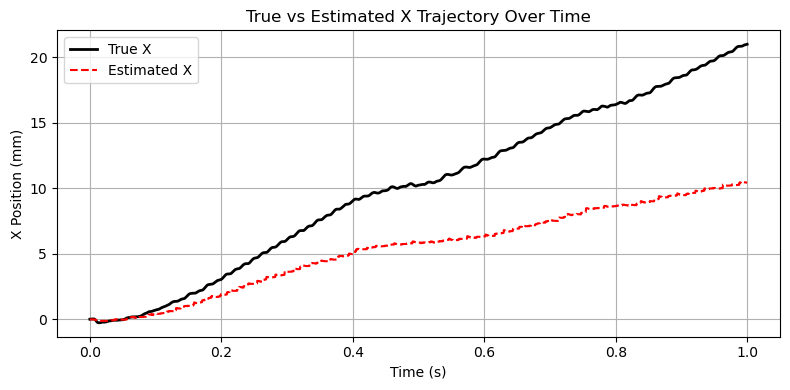

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Build time vector from controller trace length
times = np.arange(len(controller.position_trace)) * controller.timestep

# Extract estimated X positions
estimated = np.array(controller.position_trace)  # shape (N,2)
est_x = estimated[:, 0]

# Extract true X positions from obs_hist
true_x = []
for obs in obs_hist:
    # obs['fly'][0] is [x,y,z]
    pos = obs.get('fly', [[None, None, None]])[0]
    true_x.append(pos[0])
true_x = np.array(true_x)

# Ensure matching lengths
min_len = min(len(times), len(true_x))
times = times[:min_len]
est_x = est_x[:min_len]
true_x = true_x[:min_len]

# Plot
plt.figure(figsize=(8, 4))
plt.plot(times, true_x, label='True X', color='black', linewidth=2)
plt.plot(times, est_x, label='Estimated X', color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Time (s)')
plt.ylabel('X Position (mm)')
plt.title('True vs Estimated X Trajectory Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


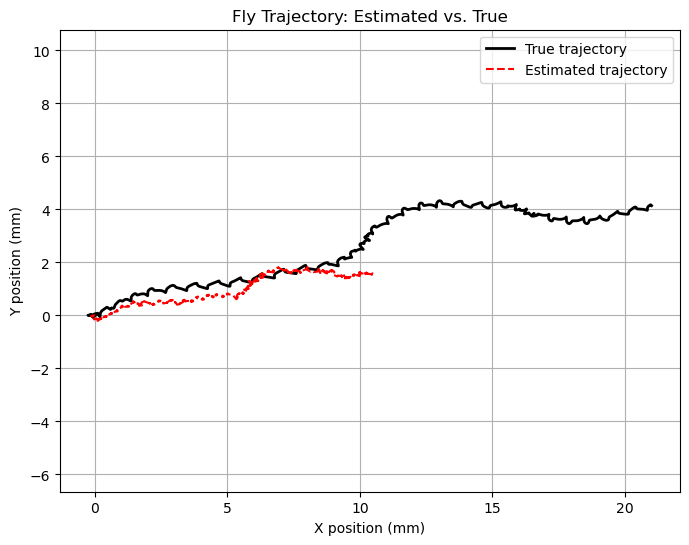

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Estimated trajectory
estimated = np.array(controller.position_trace)

# True trajectory: extract first row from obs["fly"] (x, y, z), keep only x and y
true_points = []
for obs in obs_hist:
    try:
        if "fly" in obs:
            pos = obs["fly"][0]  # First row: position
            if isinstance(pos, (list, tuple, np.ndarray)) and len(pos) >= 2:
                true_points.append([pos[0], pos[1]])
    except Exception:
        continue

true = np.array(true_points)

# Plot
plt.figure(figsize=(8, 6))
if len(true) > 0:
    plt.plot(true[:, 0], true[:, 1], label="True trajectory", color="black", linewidth=2)
if len(estimated) > 0:
    plt.plot(estimated[:, 0], estimated[:, 1], label="Estimated trajectory", color="red", linestyle="--", linewidth=1.5)






plt.xlabel("X position (mm)")
plt.ylabel("Y position (mm)")
plt.title("Fly Trajectory: Estimated vs. True")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


Plot x et y enb fct du temps 

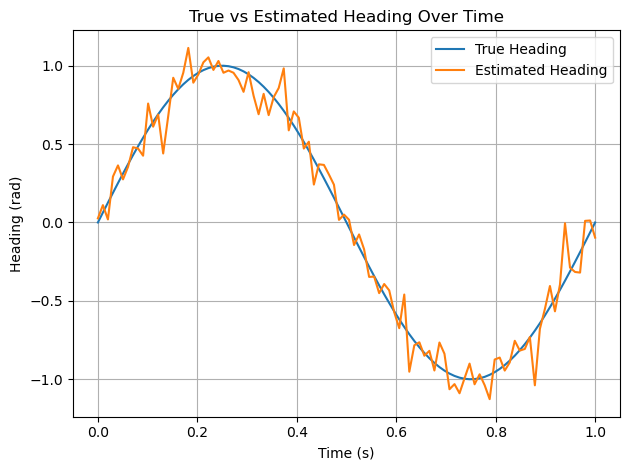

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Example usage:
# Assuming you have recording lists:
#   times = [...]               # list of time stamps (s)
#   true_headings = [...]       # list of true heading angles (rad)
#   estimated_headings = [...]  # list of estimated heading angles (rad)
# You can call plot_heading(times, true_headings, estimated_headings) to visualize.

def plot_heading(times, true_headings, estimated_headings):
    """
    Plot True vs Estimated Heading over time.

    Parameters:
        times (array-like): Time stamps in seconds.
        true_headings (array-like): True heading values (radians).
        estimated_headings (array-like): Estimated heading values (radians).
    """
    times = np.asarray(times)
    true_headings = np.asarray(true_headings)
    estimated_headings = np.asarray(estimated_headings)

    plt.figure()
    plt.plot(times, true_headings, label='True Heading')
    plt.plot(times, estimated_headings, label='Estimated Heading')
    plt.xlabel('Time (s)')
    plt.ylabel('Heading (rad)')
    plt.title('True vs Estimated Heading Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Load or generate your data here
    # For example, load from a .npz file:
    # data = np.load('heading_data.npz')
    # times = data['times']
    # true_headings = data['true_headings']
    # estimated_headings = data['estimated_headings']
    
    # Dummy example data
    times = np.linspace(0, 1, 100)
    true_headings = np.sin(2 * np.pi * times)
    estimated_headings = true_headings + 0.1 * np.random.randn(len(times))
    plot_heading(times, true_headings, estimated_headings)


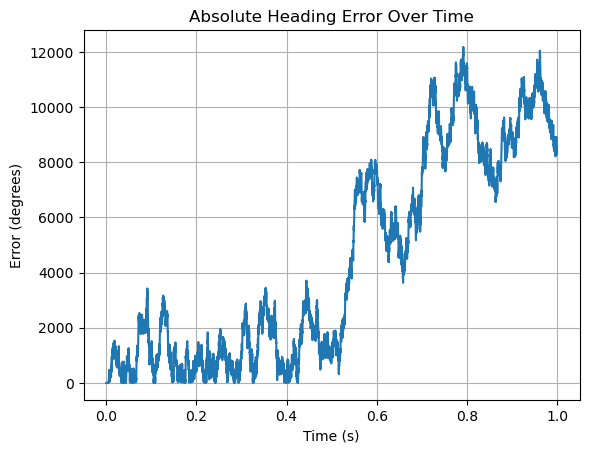

In [ ]:
heading_error = np.abs(true_heading_deg - est_heading_deg)
plt.plot(timesteps[:len(heading_error)], heading_error)
plt.title("Absolute Heading Error Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Error (degrees)")
plt.grid(True)
plt.show()


[[0.00115301 0.00114451 0.00118006 0.00117751]
 [0.         0.         0.         0.        ]]


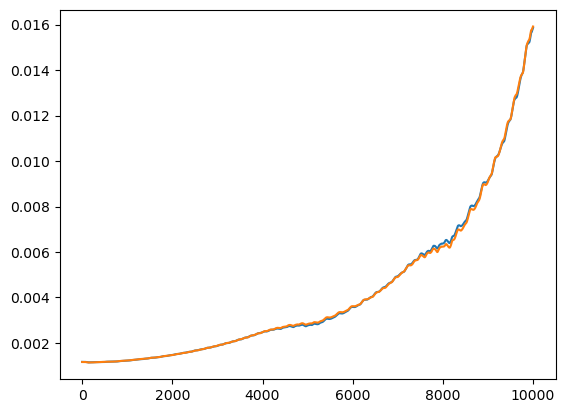

In [ ]:
#plot of the odor intensity 
import matplotlib.pyplot as plt
import numpy as np

print(obs_hist[0]["odor_intensity"])    


     
odor_left = [((obs["odor_intensity"][0][0] + obs["odor_intensity"][0][2]))/2 for obs in obs_hist]
odor_right = [((obs["odor_intensity"][0][1] + obs["odor_intensity"][0][3]))/2 for obs in obs_hist]

plt.plot(odor_left, label="Left Odor Intensity")
plt.plot(odor_right, label="Right Odor Intensity")
